In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [11]:
order_items = pd.read_csv('/content/drive/MyDrive/(새싹) 프로젝트 1/Data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/content/drive/MyDrive/(새싹) 프로젝트 1/Data/olist_order_payments_dataset.csv')
order_reviews= pd.read_csv('/content/drive/MyDrive/(새싹) 프로젝트 1/Data/olist_order_reviews_dataset.csv')
orders_dataset = pd.read_csv('/content/drive/MyDrive/(새싹) 프로젝트 1/Data/olist_orders_dataset.csv')
products_dataset = pd.read_csv('/content/drive/MyDrive/(새싹) 프로젝트 1/Data/olist_products_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/(새싹) 프로젝트 1/Data/olist_sellers_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/(새싹) 프로젝트 1/Data/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/(새싹) 프로젝트 1/Data/olist_geolocation_dataset.csv')

# 타겟설정 :
- 1차기준 : 1회구매자 (97%) 중 높은 상품만족도(리뷰 4,5점) 구매자 대상
- 2차 기준 : 1회 구매자의 구매 상품카테고리가 소모성 /반복성 있는경우

In [12]:
# 타겟설정 1 차 기준 전체 99441명
# 잠재구매자 1차 도출 (재구매자 제외) 97% 93099명
# 잠재구매자 2차 도출 (기준1-리뷰 4,5점이상) 76470명
# 잠재구매자 최종도출 (기준2-반복/소모성 카테고리 구매자) 20093명(전체중 20%, 1회구매자중 22% )


customers.shape

(99441, 5)

In [13]:
customer_counts = customers['customer_unique_id'].value_counts()
single_occurrence_customers = customer_counts[customer_counts == 1].index
single_occurrence_df = customers[customers['customer_unique_id'].isin(single_occurrence_customers)][['customer_unique_id', 'customer_id']]
display(single_occurrence_df)


high_score_orders = order_reviews[order_reviews['review_score'].isin([4, 5])]['order_id']
display(high_score_orders)



high_score_orders_df = pd.DataFrame(high_score_orders, columns=['order_id'])
high_score_customers = pd.merge(high_score_orders_df, orders_dataset[['order_id', 'customer_id']], on='order_id', how='left')
display(high_score_customers)

# Find customer_ids present in both high_score_customers and single_occurrence_df
high_score_and_single_occurrence_customers = pd.merge(high_score_customers, single_occurrence_df, on='customer_id', how='inner')

# Display the resulting DataFrame
display(high_score_and_single_occurrence_customers)

# Step 1: Merge with orders_dataset
merged_customers_orders = pd.merge(high_score_and_single_occurrence_customers, orders_dataset[['order_id', 'customer_id']], on='customer_id', how='inner')

# Display the result of the first merge
display(merged_customers_orders)

# Step 2: Merge with order_items
merged_orders_items = pd.merge(merged_customers_orders, order_items[['order_id', 'product_id']], left_on='order_id_x', right_on='order_id', how='inner')

# Display the result of the second merge
display(merged_orders_items)

# Step 3: Merge with products_dataset
merged_items_products = pd.merge(merged_orders_items, products_dataset[['product_id', 'product_category_name']], on='product_id', how='inner')

# Display the result of the third merge
display(merged_items_products)

# Step 4: Filter by category
specified_categories = [
    'beleza_saude',
    'automotivo',
    'fashion_roupa_feminina',
    'fraldas_higiene',
    'bebidas',
    'fashion_roupa_masculina',
    'utilidades_domesticas',
    'alimentos_bebidas',
    'bebes',
    'alimentos',
    'papelaria'
]

filtered_customers_by_category = merged_items_products[
    merged_items_products['product_category_name'].isin(specified_categories)
]

# Step 5: Select relevant columns and display
final_result = filtered_customers_by_category[['customer_id', 'customer_unique_id', 'order_id_x', 'product_category_name']]
display(final_result)

,customer_unique_id,customer_id
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad
...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,17ddf5dd5d51696bb3d7c6291687be6f
99437,d52a67c98be1cf6a5c84435bd38d095d,e7b71a9017aa05c9a7fd292d714858e8
99438,e9f50caf99f032f0bf3c55141f019d99,5e28dfe12db7fb50a4b2f691faecea5e
99439,73c2643a0a458b49f58cea58833b192e,56b18e2166679b8a959d72dd06da27f9


,order_id
0,73fc7af87114b39712e6da79b0a377eb
1,a548910a1c6147796b98fdf73dbeba33
2,f9e4b658b201a9f2ecdecbb34bed034b
3,658677c97b385a9be170737859d3511b
4,8e6bfb81e283fa7e4f11123a3fb894f1
...,...
99218,d699c734a0b1c8111f2272a3f36d398c
99219,2a8c23fee101d4d5662fa670396eb8da
99220,22ec9f0669f784db00fa86d035cf8602
99221,55d4004744368f5571d1f590031933e4


,order_id,customer_id
0,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104
1,a548910a1c6147796b98fdf73dbeba33,8a2e7ef9053dea531e4dc76bd6d853e6
2,f9e4b658b201a9f2ecdecbb34bed034b,e226dfed6544df5b7b87a48208690feb
3,658677c97b385a9be170737859d3511b,de6dff97e5f1ba84a3cd9a3bc97df5f6
4,8e6bfb81e283fa7e4f11123a3fb894f1,5986b333ca0d44534a156a52a8e33a83
...,...,...
76465,d699c734a0b1c8111f2272a3f36d398c,0c7e5a2123d793a5b2059cca7f650dc8
76466,2a8c23fee101d4d5662fa670396eb8da,d8c466a3e7c4cda36cd4ae7d577f44f4
76467,22ec9f0669f784db00fa86d035cf8602,d0d7086dea6fcf42b9b690b9f3745c58
76468,55d4004744368f5571d1f590031933e4,fcc7b1caafe3b77fd587bab964c4d1fb


,order_id,customer_id,customer_unique_id
0,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,68a5590b9926689be4e10f4ae2db21a8
1,a548910a1c6147796b98fdf73dbeba33,8a2e7ef9053dea531e4dc76bd6d853e6,64190b91b656ab8f37eb89b93dc84584
2,f9e4b658b201a9f2ecdecbb34bed034b,e226dfed6544df5b7b87a48208690feb,1d47144362c14e94ccdd213e8ec277d5
3,658677c97b385a9be170737859d3511b,de6dff97e5f1ba84a3cd9a3bc97df5f6,c8cf6cb6b838dc7a33ed199b825e8616
4,8e6bfb81e283fa7e4f11123a3fb894f1,5986b333ca0d44534a156a52a8e33a83,d16000272660a1fef81482ad75ba572a
...,...,...,...
71236,d699c734a0b1c8111f2272a3f36d398c,0c7e5a2123d793a5b2059cca7f650dc8,00db0070b3c3bd0215072323c8499407
71237,2a8c23fee101d4d5662fa670396eb8da,d8c466a3e7c4cda36cd4ae7d577f44f4,50605c81f77a2171191dffee444613b2
71238,22ec9f0669f784db00fa86d035cf8602,d0d7086dea6fcf42b9b690b9f3745c58,597cbb334f18a671472f7e16648228b4
71239,55d4004744368f5571d1f590031933e4,fcc7b1caafe3b77fd587bab964c4d1fb,c860357db400d72a2497064f8376fba9


,order_id_x,customer_id,customer_unique_id,order_id_y
0,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,68a5590b9926689be4e10f4ae2db21a8,73fc7af87114b39712e6da79b0a377eb
1,a548910a1c6147796b98fdf73dbeba33,8a2e7ef9053dea531e4dc76bd6d853e6,64190b91b656ab8f37eb89b93dc84584,a548910a1c6147796b98fdf73dbeba33
2,f9e4b658b201a9f2ecdecbb34bed034b,e226dfed6544df5b7b87a48208690feb,1d47144362c14e94ccdd213e8ec277d5,f9e4b658b201a9f2ecdecbb34bed034b
3,658677c97b385a9be170737859d3511b,de6dff97e5f1ba84a3cd9a3bc97df5f6,c8cf6cb6b838dc7a33ed199b825e8616,658677c97b385a9be170737859d3511b
4,8e6bfb81e283fa7e4f11123a3fb894f1,5986b333ca0d44534a156a52a8e33a83,d16000272660a1fef81482ad75ba572a,8e6bfb81e283fa7e4f11123a3fb894f1
...,...,...,...,...
71236,d699c734a0b1c8111f2272a3f36d398c,0c7e5a2123d793a5b2059cca7f650dc8,00db0070b3c3bd0215072323c8499407,d699c734a0b1c8111f2272a3f36d398c
71237,2a8c23fee101d4d5662fa670396eb8da,d8c466a3e7c4cda36cd4ae7d577f44f4,50605c81f77a2171191dffee444613b2,2a8c23fee101d4d5662fa670396eb8da
71238,22ec9f0669f784db00fa86d035cf8602,d0d7086dea6fcf42b9b690b9f3745c58,597cbb334f18a671472f7e16648228b4,22ec9f0669f784db00fa86d035cf8602
71239,55d4004744368f5571d1f590031933e4,fcc7b1caafe3b77fd587bab964c4d1fb,c860357db400d72a2497064f8376fba9,55d4004744368f5571d1f590031933e4


,order_id_x,customer_id,customer_unique_id,order_id_y,order_id,product_id
0,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,68a5590b9926689be4e10f4ae2db21a8,73fc7af87114b39712e6da79b0a377eb,73fc7af87114b39712e6da79b0a377eb,fd25ab760bfbba13c198fa3b4f1a0cd3
1,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,68a5590b9926689be4e10f4ae2db21a8,73fc7af87114b39712e6da79b0a377eb,73fc7af87114b39712e6da79b0a377eb,fd25ab760bfbba13c198fa3b4f1a0cd3
2,a548910a1c6147796b98fdf73dbeba33,8a2e7ef9053dea531e4dc76bd6d853e6,64190b91b656ab8f37eb89b93dc84584,a548910a1c6147796b98fdf73dbeba33,a548910a1c6147796b98fdf73dbeba33,be0dbdc3d67d55727a65d4cd696ca73c
3,f9e4b658b201a9f2ecdecbb34bed034b,e226dfed6544df5b7b87a48208690feb,1d47144362c14e94ccdd213e8ec277d5,f9e4b658b201a9f2ecdecbb34bed034b,f9e4b658b201a9f2ecdecbb34bed034b,d1c427060a0f73f6b889a5c7c61f2ac4
4,658677c97b385a9be170737859d3511b,de6dff97e5f1ba84a3cd9a3bc97df5f6,c8cf6cb6b838dc7a33ed199b825e8616,658677c97b385a9be170737859d3511b,658677c97b385a9be170737859d3511b,52c80cedd4e90108bf4fa6a206ef6b03
...,...,...,...,...,...,...
78712,d699c734a0b1c8111f2272a3f36d398c,0c7e5a2123d793a5b2059cca7f650dc8,00db0070b3c3bd0215072323c8499407,d699c734a0b1c8111f2272a3f36d398c,d699c734a0b1c8111f2272a3f36d398c,b9ca577f48894c59a9677f895f9a44bc
78713,2a8c23fee101d4d5662fa670396eb8da,d8c466a3e7c4cda36cd4ae7d577f44f4,50605c81f77a2171191dffee444613b2,2a8c23fee101d4d5662fa670396eb8da,2a8c23fee101d4d5662fa670396eb8da,4fb209073dc2ab6a6d3c259a7c285501
78714,22ec9f0669f784db00fa86d035cf8602,d0d7086dea6fcf42b9b690b9f3745c58,597cbb334f18a671472f7e16648228b4,22ec9f0669f784db00fa86d035cf8602,22ec9f0669f784db00fa86d035cf8602,3a33c980b62eb1ef3b8ae61b6fc6fe55
78715,55d4004744368f5571d1f590031933e4,fcc7b1caafe3b77fd587bab964c4d1fb,c860357db400d72a2497064f8376fba9,55d4004744368f5571d1f590031933e4,55d4004744368f5571d1f590031933e4,8ba0118a487ec8671aed57e5ef846574


,order_id_x,customer_id,customer_unique_id,order_id_y,order_id,product_id,product_category_name
0,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,68a5590b9926689be4e10f4ae2db21a8,73fc7af87114b39712e6da79b0a377eb,73fc7af87114b39712e6da79b0a377eb,fd25ab760bfbba13c198fa3b4f1a0cd3,esporte_lazer
1,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,68a5590b9926689be4e10f4ae2db21a8,73fc7af87114b39712e6da79b0a377eb,73fc7af87114b39712e6da79b0a377eb,fd25ab760bfbba13c198fa3b4f1a0cd3,esporte_lazer
2,a548910a1c6147796b98fdf73dbeba33,8a2e7ef9053dea531e4dc76bd6d853e6,64190b91b656ab8f37eb89b93dc84584,a548910a1c6147796b98fdf73dbeba33,a548910a1c6147796b98fdf73dbeba33,be0dbdc3d67d55727a65d4cd696ca73c,informatica_acessorios
3,f9e4b658b201a9f2ecdecbb34bed034b,e226dfed6544df5b7b87a48208690feb,1d47144362c14e94ccdd213e8ec277d5,f9e4b658b201a9f2ecdecbb34bed034b,f9e4b658b201a9f2ecdecbb34bed034b,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios
4,658677c97b385a9be170737859d3511b,de6dff97e5f1ba84a3cd9a3bc97df5f6,c8cf6cb6b838dc7a33ed199b825e8616,658677c97b385a9be170737859d3511b,658677c97b385a9be170737859d3511b,52c80cedd4e90108bf4fa6a206ef6b03,ferramentas_jardim
...,...,...,...,...,...,...,...
78712,d699c734a0b1c8111f2272a3f36d398c,0c7e5a2123d793a5b2059cca7f650dc8,00db0070b3c3bd0215072323c8499407,d699c734a0b1c8111f2272a3f36d398c,d699c734a0b1c8111f2272a3f36d398c,b9ca577f48894c59a9677f895f9a44bc,livros_interesse_geral
78713,2a8c23fee101d4d5662fa670396eb8da,d8c466a3e7c4cda36cd4ae7d577f44f4,50605c81f77a2171191dffee444613b2,2a8c23fee101d4d5662fa670396eb8da,2a8c23fee101d4d5662fa670396eb8da,4fb209073dc2ab6a6d3c259a7c285501,moveis_decoracao
78714,22ec9f0669f784db00fa86d035cf8602,d0d7086dea6fcf42b9b690b9f3745c58,597cbb334f18a671472f7e16648228b4,22ec9f0669f784db00fa86d035cf8602,22ec9f0669f784db00fa86d035cf8602,3a33c980b62eb1ef3b8ae61b6fc6fe55,brinquedos
78715,55d4004744368f5571d1f590031933e4,fcc7b1caafe3b77fd587bab964c4d1fb,c860357db400d72a2497064f8376fba9,55d4004744368f5571d1f590031933e4,55d4004744368f5571d1f590031933e4,8ba0118a487ec8671aed57e5ef846574,papelaria


,customer_id,customer_unique_id,order_id_x,product_category_name
16,8ebbeb09e94d1e789142983f73faa9cd,a5ee02c2d02b8929c0949fc114c5a19e,9d6f15f95d01e79bd1349cc208361f09,beleza_saude
17,9d53af6298240d4573ca6e52bcfa6c63,b110d5017bf181177474511359c81f46,2eaf8e099d871cd5c22b83b5ea8f6e0e,beleza_saude
20,1f5856eeda57cbd78ba0dcdddd0439e4,b35fe73d885d2fb911e95249814c5785,a9953b2f0b1665ac7586cc5a6ac8f58c,utilidades_domesticas
24,e494ff798e6549f9ba9747f00f5681c2,a2b04fc2ec07fc6fbbdfbf8fd1fe5a30,4fc44d78867142c627497b60a7e0228a,beleza_saude
26,ce3e77ff426cf554944d321064dd87f2,cca20bbdb16d521c1f94eaf7209717b6,79832b7cb59ac6f887088ffd686e1d5e,automotivo
...,...,...,...,...
78699,9126539aa02befb9271bed176c06c637,c30e0e45d4256ff2f7ff26e600ad0f7c,0ebf8e35b9807ee2d717922d5663ccdb,papelaria
78700,ab33748513d842c1bcab5fa685c41449,f04005121441c4852120717cedad6014,795b0bc608229d7cb45e79030bfa7d4b,utilidades_domesticas
78702,d86567cdc776774d6de508880d117fdd,ca8869414ebfad7610a659da7e1a10b2,287445be3e2a5f0d3f5036b2a778d1c5,automotivo
78708,e69d6b0170d42884fd9c5623edd97b0a,4faf8b3420cfd802116fbb2dfd92f390,652050879a7da861024a1114f926958d,utilidades_domesticas


# 이탈전환포인트 분석(고객경험프로세스중 '결제단계')

In [14]:
# 이탈전환포인트 분석(고객경험프로세스중)
# 전체구매자대상 (1회/재구매 추후 나누기) - 결제 취소내역 확인 : canceled / unavailable
# 취소자의 배송상태, 상품카테고리 설명 , 결제수단(쿠폰 및 신용카드) 연계 요인 분석
# 취소자 전체 중 99441중 취소, 불가능 1234 건 (취소요인, 불가능요인? 카드vs현금차이?)
orders_dataset.head()
orders_dataset.shape
orders_dataset['order_status'].value_counts()
orders_dataset['order_status']
cancel_unable_orders=orders_dataset[orders_dataset['order_status'].isin(['canceled','unavailable'])] #전체주문 99441중 취소, 불가능 1234 건
orders_dataset[orders_dataset['order_status'].isin(['processing'])]

# 취소/불가 인원 1234명 (중복 결측x)
cancel_unable_customer_ids = cancel_unable_orders['customer_id'].unique()  # 중복 제거된 고객 ID
print(f"취소/반품 고객 수: {len(cancel_unable_customer_ids)}명")
print("취소/반품 고객 ID 목록:")
print(cancel_unable_customer_ids)

#취소/불가 주문 필터링
cancel_unable_orders = orders_dataset[orders_dataset['order_status'].isin(['canceled','unavailable'])]
print(f"전체 주문 {len(orders_dataset)}건 중 취소/불가능 {len(cancel_unable_orders)}건")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


(99441, 8)

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


,order_status
0,delivered
1,delivered
2,delivered
3,delivered
4,delivered
...,...
99436,delivered
99437,delivered
99438,delivered
99439,delivered


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaN,NaN,2017-12-20 00:00:00
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaN,NaN,2017-12-12 00:00:00
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaN,NaN,2017-04-04 00:00:00
...,...,...,...,...,...,...,...,...
97400,dcdfc540e42725663242bb884c28f0a6,38972104038aa68fcc61277dbf6e7ca9,processing,2017-10-30 10:46:44,2017-10-30 11:09:55,NaN,NaN,2017-11-23 00:00:00
97666,e471815e7114cdb474064f7dbb1a8b67,092c9316ae71b2fe43e526043f351967,processing,2017-12-20 11:00:02,2017-12-20 11:10:43,NaN,NaN,2018-02-02 00:00:00
98089,10951d02d64917a34959abeb8130601e,3e6754e591ff3568ccc5bf69a649918c,processing,2018-02-13 21:02:02,2018-02-15 04:11:21,NaN,NaN,2018-03-13 00:00:00
99140,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaN,NaN,2018-01-26 00:00:00


취소/반품 고객 수: 1234명
취소/반품 고객 ID 목록:
['64a254d30eed42cd0e6c36dddb88adf0' '6d6b50b66d79f80827b6d96751528d30'
 '9582c5bbecc65eb568e2c1d839b5cba1' ... '2f0524a7b1b3845a1a57fcf3910c4333'
 '726f0894b5becdf952ea537d5266e543' '32c9df889d41b0ee8309a5efb6855dcb']
전체 주문 99441건 중 취소/불가능 1234건


In [15]:
# 타겟구매자중(2만명중 고유한고객 18390명) 중 cancel/unavailable 비율 15명0.081% -> 대부분
# 필터링된 총 고객 수: 18390명
# 취소한 총 고객 수: 1234명
# 필터링된 고객 중 취소한 고객 수: 15명
# 이미 필터링된 고객 데이터 (final_result에서 고유 고객 ID 추출)
filtered_customer_ids = final_result['customer_id'].unique()
print(f"필터링된 총 고객 수: {len(filtered_customer_ids)}명")

# 앞서 정의한 취소 주문 데이터 (cancel_unable_oders)에서 고객 ID 추출
cancel_customer_ids = cancel_unable_orders['customer_id'].unique()
print(f"취소한 총 고객 수: {len(cancel_customer_ids)}명")

# 필터링된 고객 중 취소한 고객 찾기
filtered_customers_who_canceled = np.intersect1d(filtered_customer_ids, cancel_customer_ids)
print(f"필터링된 고객 중 취소한 고객 수: {len(filtered_customers_who_canceled)}명")


필터링된 총 고객 수: 18390명
취소한 총 고객 수: 1234명
필터링된 고객 중 취소한 고객 수: 15명


In [16]:
# 전체 고객중 취소자대상
# Cancel 요인분석 : 배송상태, 상품카테고리 설명 , 결제수단(쿠폰 및 신용카드) 연계 요인 분석
# unavailable 요인분석: 취소요인, 불가능요인? 카드vs현금차이?

# 1회 주문 고객 중 취소/반품자를 찾는 코드를 제공해드리겠습니다:
# 1회 주문 고객 데이터 (이미 정의됨)
# 1회 주문 고객 수: 93099명
# 1회 주문 고객 중 취소/반품한 고객 수: 1098명

customer_counts = customers['customer_unique_id'].value_counts()
single_occurrence_customers = customer_counts[customer_counts == 1].index
single_occurrence_df = customers[customers['customer_unique_id'].isin(single_occurrence_customers)][['customer_unique_id', 'customer_id']]
display(single_occurrence_df)

print(f"1회 주문 고객 수: {len(single_occurrence_df)}명")

# 1회 주문 고객 중 취소/반품한 고객 찾기
single_occurrence_customer_ids = single_occurrence_df['customer_id'].unique()
cancel_customer_ids = cancel_unable_orders['customer_id'].unique()

# 교집합 찾기
single_occurrence_canceled_customers = np.intersect1d(single_occurrence_customer_ids, cancel_customer_ids)
print(f"1회 주문 고객 중 취소/반품한 고객 수: {len(single_occurrence_canceled_customers)}명")

if len(single_occurrence_canceled_customers) > 0:
    print("\n1회 주문 후 취소/반품한 고객 ID:")
    print(single_occurrence_canceled_customers)

    # 해당 고객들의 상세 정보
    single_canceled_customers_info = single_occurrence_df[
        single_occurrence_df['customer_id'].isin(single_occurrence_canceled_customers)
    ]
    print(f"\n1회 주문 후 취소/반품한 고객 정보:")
    display(single_canceled_customers_info)

    # 해당 고객들의 취소 주문 정보
    single_canceled_orders = cancel_unable_orders[
        cancel_unable_orders['customer_id'].isin(single_occurrence_canceled_customers)
    ]
    print(f"\n1회 주문 후 취소/반품한 주문 정보:")
    display(single_canceled_orders[['customer_id', 'order_id', 'order_status']])


,customer_unique_id,customer_id
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad
...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,17ddf5dd5d51696bb3d7c6291687be6f
99437,d52a67c98be1cf6a5c84435bd38d095d,e7b71a9017aa05c9a7fd292d714858e8
99438,e9f50caf99f032f0bf3c55141f019d99,5e28dfe12db7fb50a4b2f691faecea5e
99439,73c2643a0a458b49f58cea58833b192e,56b18e2166679b8a959d72dd06da27f9


1회 주문 고객 수: 93099명
1회 주문 고객 중 취소/반품한 고객 수: 1098명

1회 주문 후 취소/반품한 고객 ID:
['001574cd5824c0b1ea90dd4f4ba6d5b8' '0037d14e53af1d555a582504a4058f4c'
 '008e1bbc8f278134d10d8788a3ca0b7c' ... 'ffaded93e5a1fce06363cfb6905676a1'
 'fffc22669ca576ae3f654ea64c8f36be' 'ffffe8b65bbe3087b653a978c870db99']

1회 주문 후 취소/반품한 고객 정보:


,customer_unique_id,customer_id
46,233896de79986082f1f479f1f85281cb,f34a6e874087ec1f0e3dab9fdf659c5d
288,0071f46a072a9ae25bbe4438b15efe9c,5bfe800011656c0afb81db64519982db
373,035f60af6e7d7f78470e9443be08d339,b08064e24083fee8fbe8797902b07ecd
378,b8c37ee810b38c416022e1c9f51e740c,3ba47b09546c2da91ef141efce2d5888
380,0dc0731aafd5659410244092b0dc7d65,cfffbb322333151f8df6398a8c3340db
...,...,...
98746,46c0a00dac020d24bfdfbc8b214d54de,ef775ae2f3b831b79dd2e9bcf77bfb06
98786,22af178809fa6887af2cc4f7d7bdc0bc,d9335c099e6943d88ac5f8a7cb418b66
99007,cb47d51801e7379766c5cd8ff623f37f,2034cc6d6d517007a9ba3e22ba643344
99105,639b4096a4e5c96549a9bb495ca4871e,882b44646ab3f186597b1622a9443ff9



1회 주문 후 취소/반품한 주문 정보:


,customer_id,order_id,order_status
266,64a254d30eed42cd0e6c36dddb88adf0,8e24261a7e58791d10cb1bf9da94df5c,unavailable
397,6d6b50b66d79f80827b6d96751528d30,1b9ecfe83cdc259250e1a8aca174f0ad,canceled
586,9582c5bbecc65eb568e2c1d839b5cba1,c272bcd21c287498b4883c7512019702,unavailable
687,7607cd563696c27ede287e515812d528,37553832a3a89c9b2db59701c357ca67,unavailable
737,470b93b3f1cde85550fc74cd3a476c78,d57e15fb07fd180f06ab3926b39edcd2,unavailable
...,...,...,...
99233,95b1767df51d6fa09402267d8de314df,1c7c8ab324927f5b6e52338bd110bef4,unavailable
99252,df20748206e4b865b2f14a5eabbfcf34,aaab15da689073f8f9aa978a390a69d1,unavailable
99283,0b0d6095c5555fe083844281f6b093bb,3a3cddda5a7c27851bd96c3313412840,canceled
99348,726f0894b5becdf952ea537d5266e543,a69ba794cc7deb415c3e15a0a3877e69,unavailable


# 결제수단의 차이 (결제취소 중 Voucher 비중)

In [17]:
# 주문 취소/승인불가 원인 분석 - 결제수단

order_payments.shape # 103886건 (주문목록이 여러개일듯)
order_payments.head()
order_payments['payment_type'].value_counts() #credit 70% >boleto 20% >voucher>debit

# 취소/불가능 주문의 결제 방법 분석
cancel_orders_with_payment = pd.merge(cancel_unable_orders, order_payments[['order_id', 'payment_type']], on='order_id', how='left')

print("취소/불가능 주문의 결제 방법 분포:")
cancel_payment_counts = cancel_orders_with_payment['payment_type'].value_counts()
print(cancel_payment_counts)

print(f"\n취소/불가능 주문의 결제 방법 비율:")
cancel_payment_ratio = (cancel_payment_counts / cancel_payment_counts.sum()) * 100
print(cancel_payment_ratio.round(2))

# 전체 주문 대비 비교
print(f"\n전체 주문 결제 방법 비율:")
total_payment_ratio = (order_payments['payment_type'].value_counts() / len(order_payments)) * 100
print(total_payment_ratio.round(2))


(103886, 5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


취소/불가능 주문의 결제 방법 분포:
payment_type
credit_card    890
boleto         245
voucher        162
debit_card      13
not_defined      3
Name: count, dtype: int64

취소/불가능 주문의 결제 방법 비율:
payment_type
credit_card    67.78
boleto         18.66
voucher        12.34
debit_card      0.99
not_defined     0.23
Name: count, dtype: float64

전체 주문 결제 방법 비율:
payment_type
credit_card    73.92
boleto         19.04
voucher         5.56
debit_card      1.47
not_defined     0.00
Name: count, dtype: float64


전체 결제 데이터: 103886건

전체 결제 방법 분포:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

취소/불가능 주문의 결제 방법 분포:
payment_type
credit_card    890
boleto         245
voucher        162
debit_card      13
not_defined      3
Name: count, dtype: int64

취소/불가능 주문의 결제 방법 비율:
payment_type
credit_card    67.78
boleto         18.66
voucher        12.34
debit_card      0.99
not_defined     0.23
Name: count, dtype: float64

전체 주문 결제 방법 비율:
payment_type
credit_card    73.92
boleto         19.04
voucher         5.56
debit_card      1.47
not_defined     0.00
Name: count, dtype: float64

=== 전체 vs 취소/불가능 결제 방법 비교 ===
             전체_비율(%)  취소불가능_비율(%)  전체_건수  취소불가능_건수  차이(%p)
credit_card     73.92        67.78  76795       890   -6.14
boleto          19.04        18.66  19784       245   -0.38
voucher          5.56        12.34   5775       162    6.78
debit_card       1.47         0.99   1529        13   -0.48
not_d

Text(0.5, 1.0, '결제 방법별 전체 vs 취소/불가능 비율')

Text(0.5, 0, '결제 방법')

Text(0, 0.5, '비율 (%)')

[Text(0, 0, 'credit_card'),
 Text(1, 0, 'boleto'),
 Text(2, 0, 'voucher'),
 Text(3, 0, 'debit_card'),
 Text(4, 0, 'not_defined')]

Text(-0.175, 74.92237645110987, '73.9%')

Text(0.175, 68.78370144706778, '67.8%')

Text(0.825, 20.043952024334367, '19.0%')

Text(1.175, 19.65955826351866, '18.7%')

Text(1.825, 6.558978110621258, '5.6%')

Text(2.175, 13.338156892612338, '12.3%')

Text(2.825, 2.471805633097819, '1.5%')

Text(3.175, 1.99009900990099, '1.0%')

Text(3.825, 1.0028877808366863, '0.0%')

Text(4.175, 1.2284843869002284, '0.2%')

Text(0.5, 1.0, '취소/불가능 비율 차이 (전체 대비)')

Text(0.5, 0, '결제 방법')

Text(0, 0.5, '차이 (%p)')

Text(0, -6.338675004042085, '-6.1%p')

Text(1, -0.5843937608157048, '-0.4%p')

Text(2, 6.97917878199108, '+6.8%p')

Text(3, -0.6817066231968287, '-0.5%p')

Text(4, 0.4255966060635421, '+0.2%p')

Text(0.5, 1.0, '전체 주문 결제 방법 분포')

Text(0.5, 1.0, '취소/불가능 주문 결제 방법 분포')

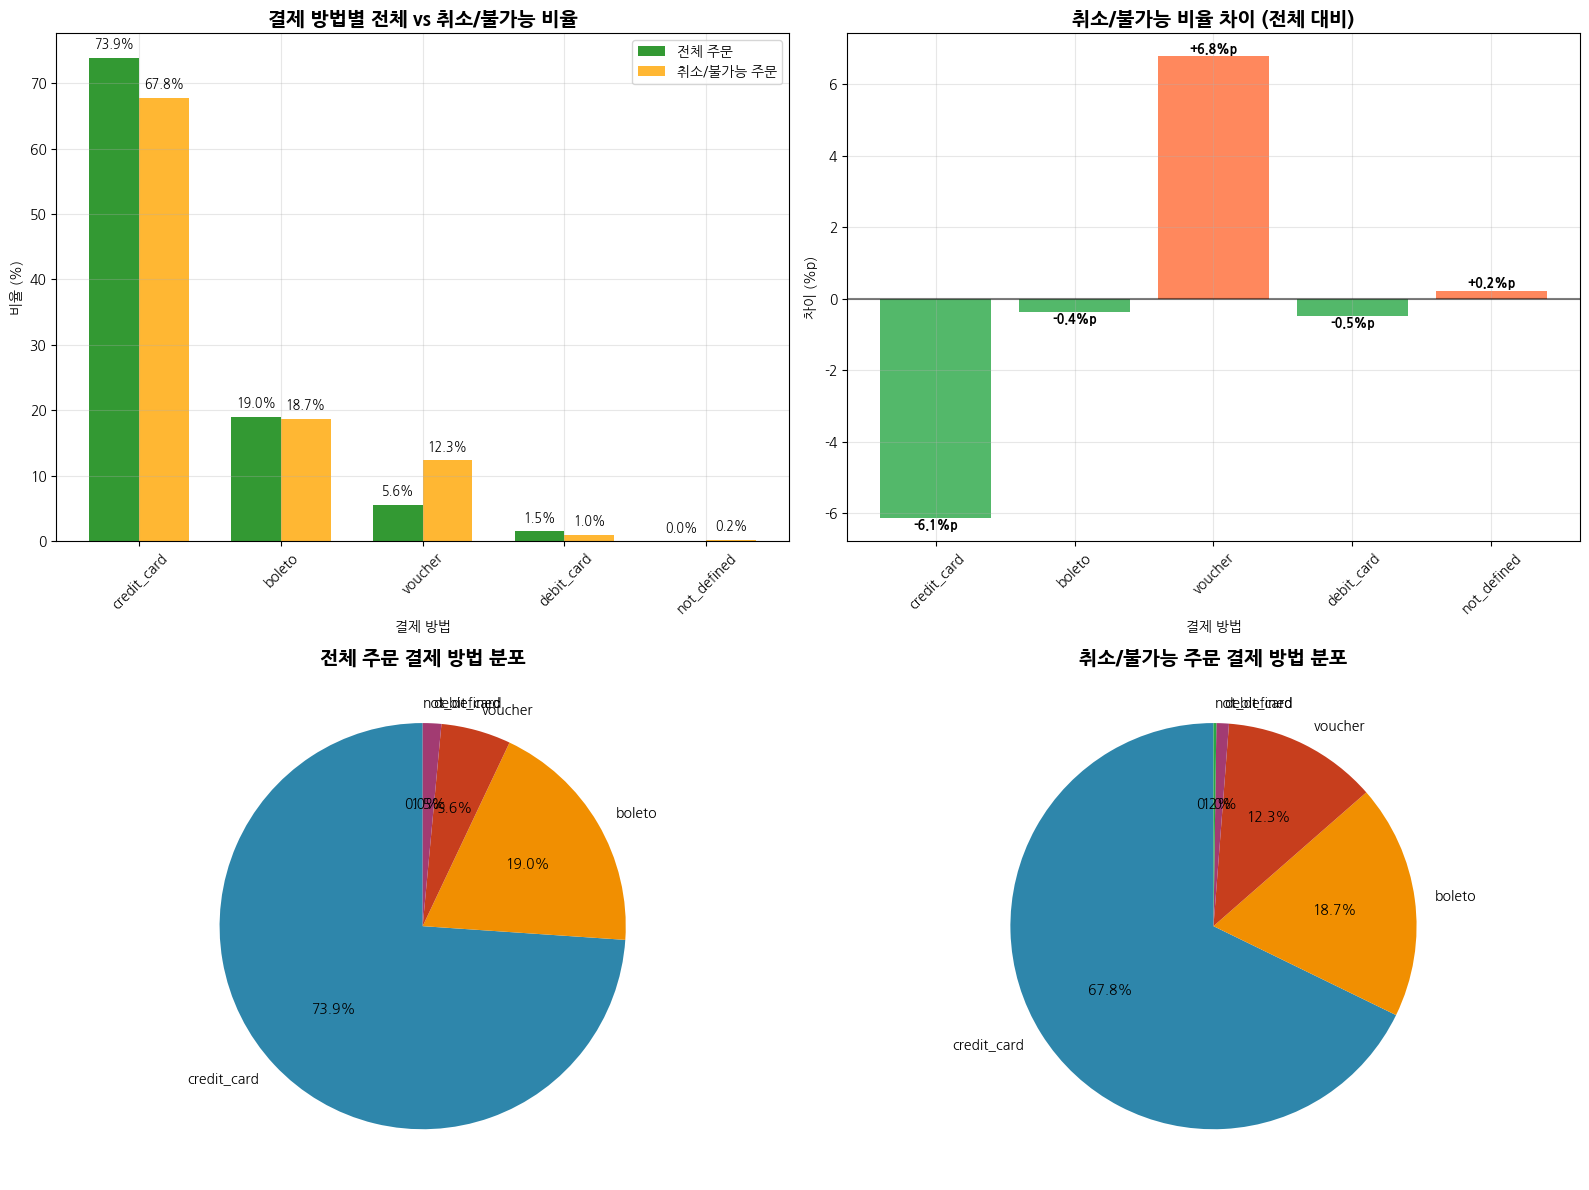

<Figure size 1400x800 with 0 Axes>

Text(0.5, 1.0, '결제 방법별 전체 주문 vs 취소/불가능 주문 비율 비교')

Text(0.5, 0, '결제 방법')

Text(0, 0.5, '비율 (%)')

([<matplotlib.axis.XTick at 0x7d3c63b45bd0>,
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'boleto'),
  Text(2, 0, 'voucher'),
  Text(3, 0, 'debit_card'),
  Text(4, 0, 'not_defined')])

Text(-0.175, 74.92237645110987, '73.9%')

Text(0.175, 68.78370144706778, '67.8%')

Text(0.825, 20.043952024334367, '19.0%')

Text(1.175, 19.65955826351866, '18.7%')

Text(1.825, 6.558978110621258, '5.6%')

Text(2.175, 13.338156892612338, '12.3%')

Text(2.825, 2.471805633097819, '1.5%')

Text(3.175, 1.99009900990099, '1.0%')

Text(3.825, 1.0028877808366863, '0.0%')

Text(4.175, 1.2284843869002284, '0.2%')

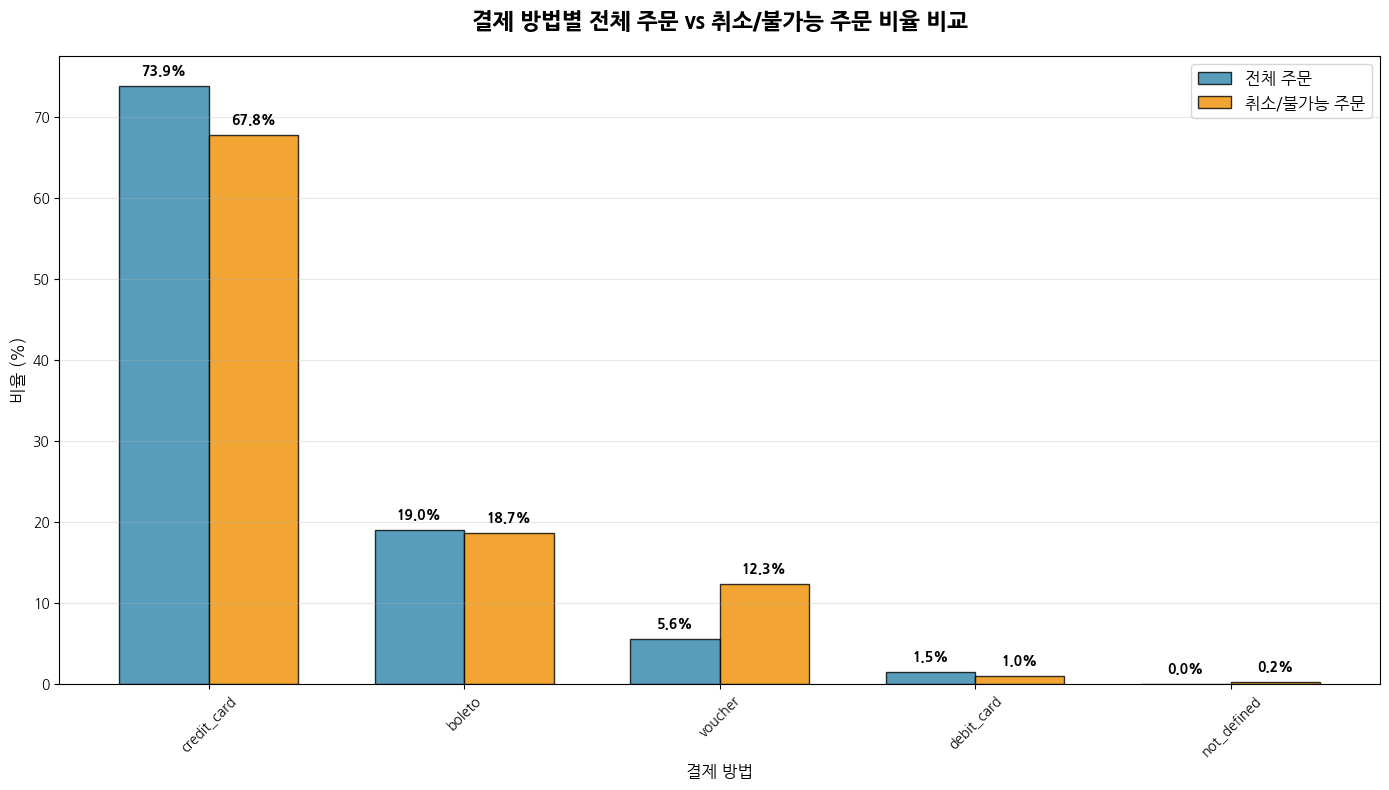


=== 결제 방법별 취소/불가능 주문 분석 결과 ===
🚨 취소/불가능 위험도가 높은 결제 방법:
  - voucher: 전체 5.6% → 취소/불가능 12.3% (+6.8%p)
  - not_defined: 전체 0.0% → 취소/불가능 0.2% (+0.2%p)

✅ 안정적인 결제 방법:
  - credit_card: 전체 73.9% → 취소/불가능 67.8% (-6.1%p)
  - debit_card: 전체 1.5% → 취소/불가능 1.0% (-0.5%p)
  - boleto: 전체 19.0% → 취소/불가능 18.7% (-0.4%p)

📊 전체 통계:
  전체 주문 수: 103,886건
  취소/불가능 주문 수: 1,313건
  전체 취소/불가능률: 1.26%


In [61]:
# 주문 취소/승인불가 원인 분석 - 결제수단
print(f"전체 결제 데이터: {order_payments.shape[0]}건")
print("\n전체 결제 방법 분포:")
total_payment_counts = order_payments['payment_type'].value_counts()
print(total_payment_counts)

# 취소/불가능 주문의 결제 방법 분석
cancel_orders_with_payment = pd.merge(cancel_unable_orders, order_payments[['order_id', 'payment_type']], on='order_id', how='left')

print("\n취소/불가능 주문의 결제 방법 분포:")
cancel_payment_counts = cancel_orders_with_payment['payment_type'].value_counts()
print(cancel_payment_counts)

print(f"\n취소/불가능 주문의 결제 방법 비율:")
cancel_payment_ratio = (cancel_payment_counts / cancel_payment_counts.sum()) * 100
print(cancel_payment_ratio.round(2))

# 전체 주문 대비 비교
print(f"\n전체 주문 결제 방법 비율:")
total_payment_ratio = (order_payments['payment_type'].value_counts() / len(order_payments)) * 100
print(total_payment_ratio.round(2))

# 비교 데이터프레임 생성
all_payment_methods = set(total_payment_ratio.index) | set(cancel_payment_ratio.index)
comparison_data = pd.DataFrame({
    '전체_비율(%)': [total_payment_ratio.get(method, 0) for method in all_payment_methods],
    '취소불가능_비율(%)': [cancel_payment_ratio.get(method, 0) for method in all_payment_methods],
    '전체_건수': [total_payment_counts.get(method, 0) for method in all_payment_methods],
    '취소불가능_건수': [cancel_payment_counts.get(method, 0) for method in all_payment_methods]
}, index=list(all_payment_methods))

# 전체 비율 기준으로 정렬
comparison_data = comparison_data.sort_values('전체_비율(%)', ascending=False)
comparison_data['차이(%p)'] = comparison_data['취소불가능_비율(%)'] - comparison_data['전체_비율(%)']

print("\n=== 전체 vs 취소/불가능 결제 방법 비교 ===")
print(comparison_data.round(2))

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1) 전체 vs 취소/불가능 비율 비교 (그룹 바 차트)
ax1 = axes[0, 0]
x = np.arange(len(comparison_data))
width = 0.35

bars1 = ax1.bar(x - width/2, comparison_data['전체_비율(%)'], width,
                label='전체 주문', color='green', alpha=0.8)
bars2 = ax1.bar(x + width/2, comparison_data['취소불가능_비율(%)'], width,
                label='취소/불가능 주문', color='orange', alpha=0.8)

ax1.set_title('결제 방법별 전체 vs 취소/불가능 비율', fontsize=14, fontweight='bold')
ax1.set_xlabel('결제 방법')
ax1.set_ylabel('비율 (%)')
ax1.set_xticks(x)
ax1.set_xticklabels(comparison_data.index, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 수치 표시
for i, (total, cancel) in enumerate(zip(comparison_data['전체_비율(%)'], comparison_data['취소불가능_비율(%)'])):
    ax1.text(i - width/2, total + 1, f'{total:.1f}%', ha='center', va='bottom', fontsize=9)
    ax1.text(i + width/2, cancel + 1, f'{cancel:.1f}%', ha='center', va='bottom', fontsize=9)

# 2) 취소/불가능 비율 차이 (전체 대비)
ax2 = axes[0, 1]
colors = ['#FF6B35' if x > 0 else '#28A745' for x in comparison_data['차이(%p)']]
bars = ax2.bar(comparison_data.index, comparison_data['차이(%p)'], color=colors, alpha=0.8)

ax2.set_title('취소/불가능 비율 차이 (전체 대비)', fontsize=14, fontweight='bold')
ax2.set_xlabel('결제 방법')
ax2.set_ylabel('차이 (%p)')
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.grid(True, alpha=0.3)

# 차이 수치 표시
for i, (method, diff) in enumerate(zip(comparison_data.index, comparison_data['차이(%p)'])):
    y_pos = diff + 0.2 if diff > 0 else diff - 0.2
    ax2.text(i, y_pos, f'{diff:+.1f}%p', ha='center', va='center', fontsize=9, fontweight='bold')

# 3) 전체 주문 결제 방법 비율 (파이 차트)
ax3 = axes[1, 0]
colors_pie = ['#2E86AB', '#F18F01', '#C73E1D', '#A23B72', '#28A745']
wedges, texts, autotexts = ax3.pie(comparison_data['전체_비율(%)'],
                                  labels=comparison_data.index,
                                  autopct='%1.1f%%',
                                  colors=colors_pie[:len(comparison_data)],
                                  startangle=90)
ax3.set_title('전체 주문 결제 방법 분포', fontsize=14, fontweight='bold')

# 4) 취소/불가능 주문 결제 방법 비율 (파이 차트)
ax4 = axes[1, 1]
wedges2, texts2, autotexts2 = ax4.pie(comparison_data['취소불가능_비율(%)'],
                                      labels=comparison_data.index,
                                      autopct='%1.1f%%',
                                      colors=colors_pie[:len(comparison_data)],
                                      startangle=90)
ax4.set_title('취소/불가능 주문 결제 방법 분포', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 단독 바 차트 (더 큰 사이즈)
plt.figure(figsize=(14, 8))

# 전체 vs 취소/불가능 비교 바 차트
x = np.arange(len(comparison_data))
width = 0.35

bars1 = plt.bar(x - width/2, comparison_data['전체_비율(%)'], width,
                label='전체 주문', color='#2E86AB', alpha=0.8, edgecolor='black')
bars2 = plt.bar(x + width/2, comparison_data['취소불가능_비율(%)'], width,
                label='취소/불가능 주문', color='#F18F01', alpha=0.8, edgecolor='black')

plt.title('결제 방법별 전체 주문 vs 취소/불가능 주문 비율 비교', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('결제 방법', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.xticks(x, comparison_data.index, rotation=45)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# 각 바 위에 수치 표시
for i, (total, cancel) in enumerate(zip(comparison_data['전체_비율(%)'], comparison_data['취소불가능_비율(%)'])):
    plt.text(i - width/2, total + 1, f'{total:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(i + width/2, cancel + 1, f'{cancel:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 주요 인사이트 출력
print("\n" + "="*50)
print("=== 결제 방법별 취소/불가능 주문 분석 결과 ===")
print("="*50)

# 위험도가 높은 결제 방법
high_risk_methods = comparison_data[comparison_data['차이(%p)'] > 0].sort_values('차이(%p)', ascending=False)
if not high_risk_methods.empty:
    print("🚨 취소/불가능 위험도가 높은 결제 방법:")
    for method, row in high_risk_methods.iterrows():
        print(f"  - {method}: 전체 {row['전체_비율(%)']:.1f}% → 취소/불가능 {row['취소불가능_비율(%)']:.1f}% (+{row['차이(%p)']:.1f}%p)")

# 안정적인 결제 방법
stable_methods = comparison_data[comparison_data['차이(%p)'] < 0].sort_values('차이(%p)', ascending=True)
if not stable_methods.empty:
    print("\n✅ 안정적인 결제 방법:")
    for method, row in stable_methods.iterrows():
        print(f"  - {method}: 전체 {row['전체_비율(%)']:.1f}% → 취소/불가능 {row['취소불가능_비율(%)']:.1f}% ({row['차이(%p)']:.1f}%p)")

# 전체 통계
total_orders = len(order_payments)
total_cancel_orders = len(cancel_orders_with_payment)
overall_cancel_rate = (total_cancel_orders / total_orders) * 100

print(f"\n📊 전체 통계:")
print(f"  전체 주문 수: {total_orders:,}건")
print(f"  취소/불가능 주문 수: {total_cancel_orders:,}건")
print(f"  전체 취소/불가능률: {overall_cancel_rate:.2f}%")

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, '결제 방법별 전체 주문 vs 취소/불가능 주문 비율 비교')

Text(0.5, 0, '결제 방법')

Text(0, 0.5, '비율 (%)')

([<matplotlib.axis.XTick at 0x7d3c63971f90>,
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'boleto'),
  Text(2, 0, 'voucher'),
  Text(3, 0, 'debit_card'),
  Text(4, 0, 'not_defined')])

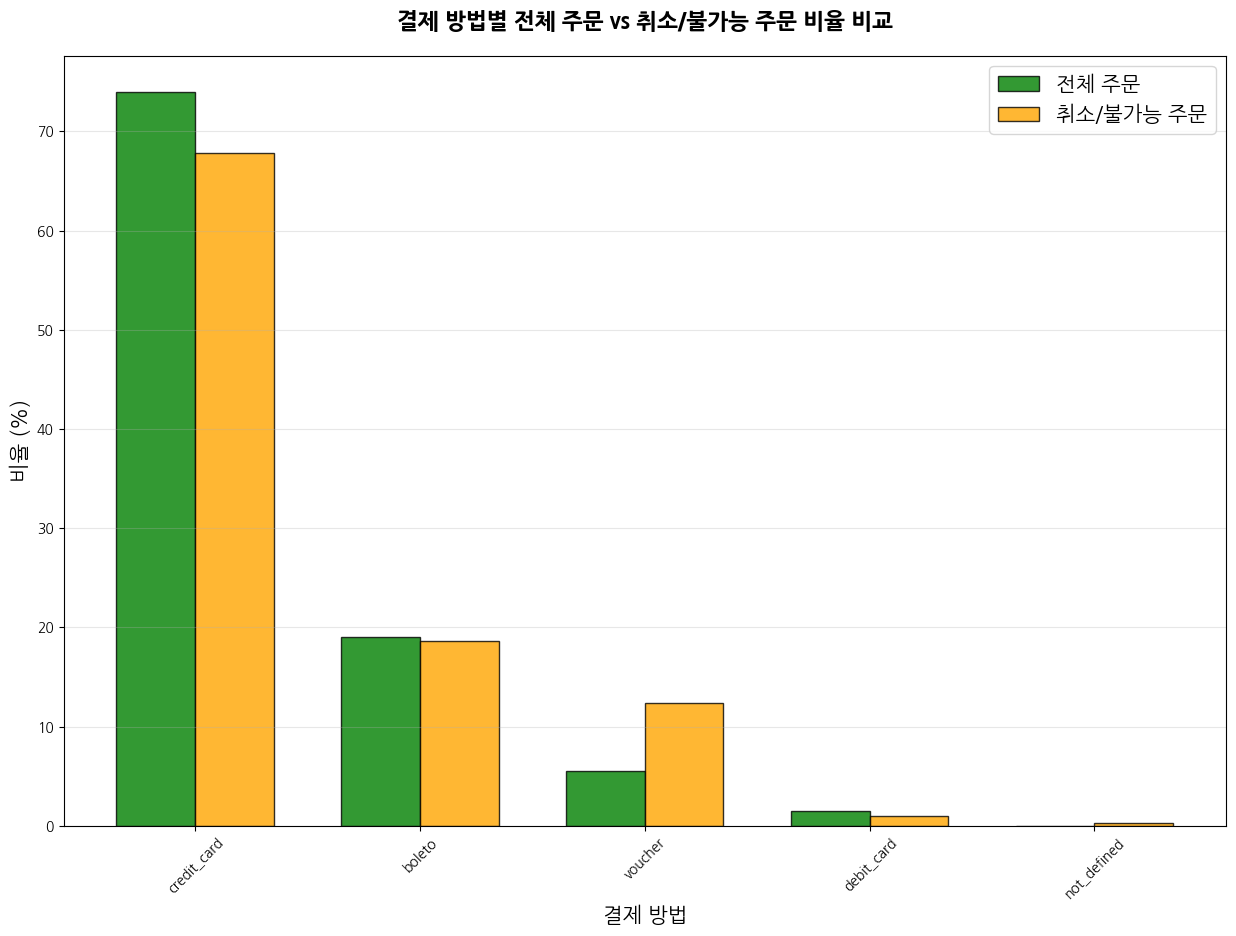

In [69]:

# 전체 vs 취소/불가능 비교 바 차트
plt.figure(figsize=(15, 10))
x = np.arange(len(comparison_data))
width = 0.35

bars1 = plt.bar(x - width/2, comparison_data['전체_비율(%)'], width,
                label='전체 주문', color='green', alpha=0.8, edgecolor='black')
bars2 = plt.bar(x + width/2, comparison_data['취소불가능_비율(%)'], width,
                label='취소/불가능 주문', color='orange', alpha=0.8, edgecolor='black')

plt.title('결제 방법별 전체 주문 vs 취소/불가능 주문 비율 비교', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('결제 방법', fontsize=15)
plt.ylabel('비율 (%)', fontsize=15)
plt.xticks(x, comparison_data.index, rotation=45)
plt.legend(fontsize=15)
plt.grid(True, alpha=0.3, axis='y')

취소 주문 수: 625건
불가능 주문 수: 609건

=== 취소(canceled) 주문의 결제 방법 ===
payment_type
credit_card    444
voucher        115
boleto          95
debit_card       7
not_defined      3
Name: count, dtype: int64

취소 주문 결제 방법 비율:
payment_type
credit_card    66.87
voucher        17.32
boleto         14.31
debit_card      1.05
not_defined     0.45
Name: count, dtype: float64

=== 불가능(unavailable) 주문의 결제 방법 ===
payment_type
credit_card    446
boleto         150
voucher         47
debit_card       6
Name: count, dtype: int64

불가능 주문 결제 방법 비율:
payment_type
credit_card    68.72
boleto         23.11
voucher         7.24
debit_card      0.92
Name: count, dtype: float64

=== 취소 vs 불가능 결제 방법 비교 ===


,canceled_ratio(%),unavailable_ratio(%)
payment_type,,
boleto,14.31,23.11
credit_card,66.87,68.72
debit_card,1.05,0.92
not_defined,0.45,0.00
voucher,17.32,7.24


<Axes: title={'center': '결제 방법별 취소/불가능 비율 비교 (취소 비율 기준 정렬)'}, xlabel='payment_type'>

Text(0.5, 0, '결제 방법')

Text(0, 0.5, '비율 (%)')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'voucher'),
  Text(2, 0, 'boleto'),
  Text(3, 0, 'debit_card'),
  Text(4, 0, 'not_defined')])

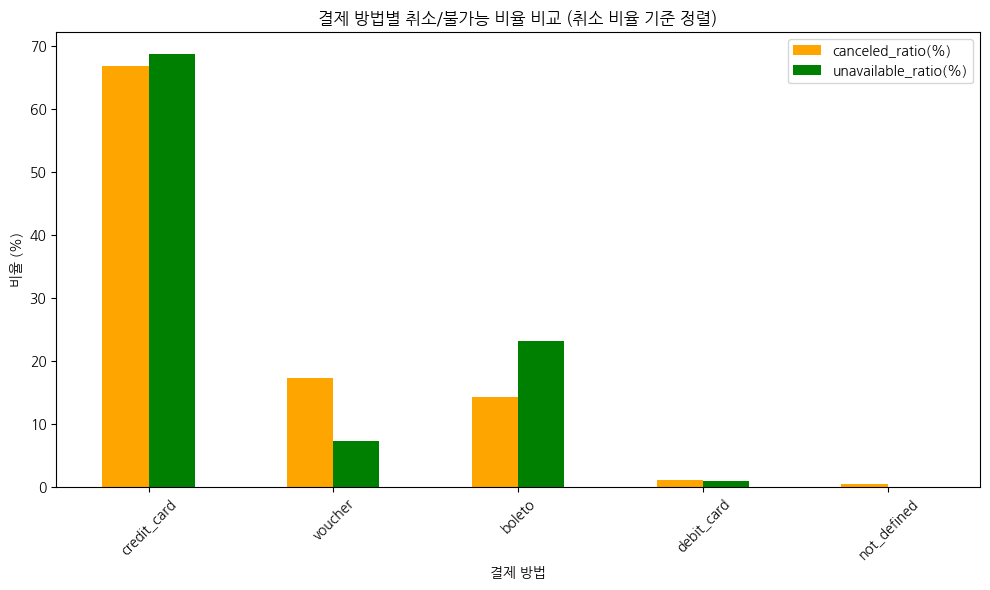

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

In [73]:
# 취소(canceled)와 불가능(unavailable)을 나눠서 결제 방법을 분석해드리겠습니다:
# 취소와 불가능 주문을 각각 분리
canceled_orders = orders_dataset[orders_dataset['order_status'] == 'canceled']
unavailable_orders = orders_dataset[orders_dataset['order_status'] == 'unavailable']

print(f"취소 주문 수: {len(canceled_orders)}건")
print(f"불가능 주문 수: {len(unavailable_orders)}건")

# 각각의 결제 방법 분석
print("\n=== 취소(canceled) 주문의 결제 방법 ===")
canceled_with_payment = pd.merge(canceled_orders, order_payments[['order_id', 'payment_type']], on='order_id', how='left')
canceled_payment_counts = canceled_with_payment['payment_type'].value_counts()
print(canceled_payment_counts)
print(f"\n취소 주문 결제 방법 비율:")
canceled_payment_ratio = (canceled_payment_counts / canceled_payment_counts.sum()) * 100
print(canceled_payment_ratio.round(2))

print("\n=== 불가능(unavailable) 주문의 결제 방법 ===")
unavailable_with_payment = pd.merge(unavailable_orders, order_payments[['order_id', 'payment_type']], on='order_id', how='left')
unavailable_payment_counts = unavailable_with_payment['payment_type'].value_counts()
print(unavailable_payment_counts)
print(f"\n불가능 주문 결제 방법 비율:")
unavailable_payment_ratio = (unavailable_payment_counts / unavailable_payment_counts.sum()) * 100
print(unavailable_payment_ratio.round(2))

# 비교 표
print("\n=== 취소 vs 불가능 결제 방법 비교 ===")
comparison_df = pd.DataFrame({
    'canceled_ratio(%)': canceled_payment_ratio.round(2),
    'unavailable_ratio(%)': unavailable_payment_ratio.round(2)
}).fillna(0)

display(comparison_df)

# 방법 1: 취소 주문 비율 기준으로 내림차순 정렬
comparison_df_sorted = comparison_df.sort_values('canceled_ratio(%)', ascending=False)
comparison_df_sorted.plot(kind='bar', figsize=(10, 6), title='결제 방법별 취소/불가능 비율 비교 (취소 비율 기준 정렬)', color=['orange', 'green'])
plt.xlabel('결제 방법')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 취소 주문 비율 그래프 (내림차순)
canceled_payment_ratio.sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='red', alpha=0.7)
axes[0].set_title('취소 주문 결제 방법 비율 (내림차순)')
axes[0].set_xlabel('결제 방법')
axes[0].set_ylabel('비율 (%)')
axes[0].tick_params(axis='x', rotation=45)

# 재구매자의 주문단계(상품설명) 관련성

In [50]:
# 재구매자의 상품 관련성

customer_counts = customers['customer_unique_id'].value_counts()
repeat_customers = customer_counts[customer_counts >= 2]
display(repeat_customers)
repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customers.index)]['customer_id']
display(repeat_customer_ids)
# 총 6342개 나오는 데이터

# Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Check if any of these orders have a 'canceled' or 'unavailable' status
canceled_and_unavailable_repeat_orders = repeat_customer_orders[repeat_customer_orders['order_status'].isin(['canceled', 'unavailable'])]

# Display the canceled and unavailable orders from repeat customers
if not canceled_and_unavailable_repeat_orders.empty:
    print("Repeat customers have canceled or unavailable orders. Here are the details:")
    display(canceled_and_unavailable_repeat_orders)
else:
    print("No canceled or unavailable orders found for repeat customers.")
#6342개 중 92 개 unavailable 44개 늘어나서 총 136 개


# Calculate the mean, sum, and standard deviation of product_photos_qty
mean_photos = products_dataset['product_photos_qty'].mean()
sum_photos = products_dataset['product_photos_qty'].sum()
std_photos = products_dataset['product_photos_qty'].std()

# Calculate the mean, sum, and standard deviation of product_description_lenght
mean_description_length = products_dataset['product_description_lenght'].mean()
sum_description_length = products_dataset['product_description_lenght'].sum()
std_description_length = products_dataset['product_description_lenght'].std()


# Display the results
print(f"Average Product Photos Quantity: {mean_photos}")
print(f"Total Product Photos Quantity: {sum_photos}")
print(f"Standard Deviation of Product Photos Quantity: {std_photos}")
print(f"Average Product Description Length: {mean_description_length}")
print(f"Total Product Description Length: {sum_description_length}")
print(f"Standard Deviation of Product Description Length: {std_description_length}")


# Step 1: Identify repeat customers
customer_counts = customers['customer_unique_id'].value_counts()
repeat_customer_unique_ids = customer_counts[customer_counts > 1].index
repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customer_unique_ids)]['customer_id']

# Step 2: Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Step 3: Display the first few rows and the shape of repeat_customer_orders
display(repeat_customer_orders.head())
print(repeat_customer_orders.shape)

repeat_customer_products = pd.merge(repeat_customer_orders, order_items[['order_id', 'product_id']], on='order_id', how='inner')
repeat_customer_products = repeat_customer_products[['order_id', 'product_id']]
display(repeat_customer_products.head())
print(repeat_customer_products.shape)

repeat_customer_product_details = pd.merge(repeat_customer_products, products_dataset[['product_id', 'product_description_lenght', 'product_photos_qty']], on='product_id', how='inner')
display(repeat_customer_product_details.head())
print(repeat_customer_product_details.shape)

# Calculate statistics for product_description_lenght
mean_description_length_repeat = repeat_customer_product_details['product_description_lenght'].mean()
sum_description_length_repeat = repeat_customer_product_details['product_description_lenght'].sum()
std_description_length_repeat = repeat_customer_product_details['product_description_lenght'].std()

# Calculate statistics for product_photos_qty
mean_photos_repeat = repeat_customer_product_details['product_photos_qty'].mean()
sum_photos_repeat = repeat_customer_product_details['product_photos_qty'].sum()
std_photos_repeat = repeat_customer_product_details['product_photos_qty'].std()

# Display the results
print(f"Statistics for products purchased by repeat customers:")
print(f"  Product Description Length:")
print(f"    Mean: {mean_description_length_repeat}")
print(f"    Sum: {sum_description_length_repeat}")
print(f"    Standard Deviation: {std_description_length_repeat}")
print(f"  Product Photos Quantity:")
print(f"    Mean: {mean_photos_repeat}")
print(f"    Sum: {sum_photos_repeat}")
print(f"    Standard Deviation: {std_photos_repeat}")

,count
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
6469f99c1f9dfae7733b25662e7f1782,7
...,...
0802a1a217680f13264a70ddb7220823,2
634420a0ea42302205032ed44ac7fccc,2
bb99e6ae642f462d7bf05db05fc9aa11,2


,customer_id
5,879864dab9bc3047522c92c82e1212b8
8,5adf08e34b2e993982a47070956c5c65
13,eabebad39a88bb6f5b52376faec28612
32,2d5831cb2dff7cdefba62e950ae3dc7b
33,b2bed119388167a954382cca36c4777f
...,...
99324,5b46a0d983eec8c97363bea78d4a69dd
99327,c1affa46f9f3b514555259049a0307b9
99336,ebf46ff530343a129926adc1f831dea4
99353,282fbce48e4d2077aad602dd125c9225


Repeat customers have canceled or unavailable orders. Here are the details:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00,2018
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00,2018
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00,2017
2296,f0df036e9be21fc238f131bbfcdde769,1fa16395beca89233661543954ca6cf1,unavailable,2017-02-24 23:39:21,2017-02-24 23:45:14,NaN,NaN,2017-04-07 00:00:00,2017
3094,5290c34bd38a8a095b885f13958db1e1,92af427e290117f39d9ff908566072e0,canceled,2018-08-21 10:25:18,NaN,NaN,NaN,2018-09-06 00:00:00,2018
...,...,...,...,...,...,...,...,...,...
95932,a144aa25d9d14f25ee9f3ec4118e5517,9353974c6d727e3739a8370ff655a774,unavailable,2017-11-06 17:36:36,2017-11-07 03:31:02,NaN,NaN,2017-11-24 00:00:00,2017
96315,ae443cb420061bab1f2c5e3ad279fde8,3d59638a168c209ccb33a27424fc06da,unavailable,2018-03-03 09:32:36,2018-03-03 09:48:36,NaN,NaN,2018-03-28 00:00:00,2018
96996,5a14c8b3d919a4ef3f3428b0459c47b2,666094835d60d986eb87350b31efdcae,canceled,2017-05-29 23:53:39,NaN,NaN,NaN,2017-06-23 00:00:00,2017
97100,b34369ee8397436dd7ceb8bb7783671d,c96771504b0c9d89ad8da161e0e3d092,canceled,2017-06-07 20:11:29,NaN,NaN,NaN,2017-07-04 00:00:00,2017


Average Product Photos Quantity: 2.1889861166939797
Total Product Photos Quantity: 70794.0
Standard Deviation of Product Photos Quantity: 1.7367656379315015
Average Product Description Length: 771.4952846232337
Total Product Description Length: 24950929.0
Standard Deviation of Product Description Length: 635.1152246349546


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,2018
16,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06 00:00:00,2018
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,2018
46,d17dc4a904426827ca80f2ccb3a6be56,569cf68214806a39acc0f39344aea67f,delivered,2017-05-14 20:28:25,2017-05-14 20:42:45,2017-05-16 08:17:46,2017-05-25 09:14:31,2017-06-12 00:00:00,2017


(6342, 9)


,order_id,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a
1,dcb36b511fcac050b97cd5c05de84dc3,009c09f439988bc06a93d6b8186dce73
2,403b97836b0c04a622354cf531062e5f,638bbb2a5e4f360b71f332ddfebfd672
3,ee64d42b8cf066f35eac1cf57de1aa85,c50ca07e9e4db9ea5011f06802c0aea0
4,d17dc4a904426827ca80f2ccb3a6be56,ba4bfbf74dbe7ab37e263b9326da0523


(7568, 2)


,order_id,product_id,product_description_lenght,product_photos_qty
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,268.0,4.0
1,dcb36b511fcac050b97cd5c05de84dc3,009c09f439988bc06a93d6b8186dce73,991.0,3.0
2,403b97836b0c04a622354cf531062e5f,638bbb2a5e4f360b71f332ddfebfd672,143.0,2.0
3,ee64d42b8cf066f35eac1cf57de1aa85,c50ca07e9e4db9ea5011f06802c0aea0,1782.0,1.0
4,d17dc4a904426827ca80f2ccb3a6be56,ba4bfbf74dbe7ab37e263b9326da0523,521.0,1.0


(7568, 4)
Statistics for products purchased by repeat customers:
  Product Description Length:
    Mean: 736.2352389878163
    Sum: 5498941.0
    Standard Deviation: 642.4637022341578
  Product Photos Quantity:
    Mean: 2.053688579461775
    Sum: 15339.0
    Standard Deviation: 1.5984673497413144


# 결제취소금액의 전체수익 대비 금액비중

In [51]:
order_payments['order_id']
order_payments.head()

,order_id
0,b81ef226f3fe1789b1e8b2acac839d17
1,a9810da82917af2d9aefd1278f1dcfa0
2,25e8ea4e93396b6fa0d3dd708e76c1bd
3,ba78997921bbcdc1373bb41e913ab953
4,42fdf880ba16b47b59251dd489d4441a
...,...
103881,0406037ad97740d563a178ecc7a2075c
103882,7b905861d7c825891d6347454ea7863f
103883,32609bbb3dd69b3c066a6860554a77bf
103884,b8b61059626efa996a60be9bb9320e10


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,order_id
266,8e24261a7e58791d10cb1bf9da94df5c
397,1b9ecfe83cdc259250e1a8aca174f0ad
586,c272bcd21c287498b4883c7512019702
613,714fb133a6730ab81fa1d3c1b2007291
687,37553832a3a89c9b2db59701c357ca67
...,...
99252,aaab15da689073f8f9aa978a390a69d1
99283,3a3cddda5a7c27851bd96c3313412840
99347,a89abace0dcc01eeb267a9660b5ac126
99348,a69ba794cc7deb415c3e15a0a3877e69


,order_id,order_status,payment_sequential,payment_type,payment_installments,payment_value
0,8e24261a7e58791d10cb1bf9da94df5c,unavailable,1,credit_card,5,84.00
1,1b9ecfe83cdc259250e1a8aca174f0ad,canceled,1,boleto,1,33.34
2,c272bcd21c287498b4883c7512019702,unavailable,1,credit_card,1,97.68
3,714fb133a6730ab81fa1d3c1b2007291,canceled,1,credit_card,4,96.01
4,37553832a3a89c9b2db59701c357ca67,unavailable,1,boleto,1,132.46


(1313, 6)

,payment_value
count,1313.000000
mean,205.434204
std,370.070555
min,0.000000
25%,56.400000
50%,102.090000
75%,192.770000
max,4809.440000


<Axes: >

,payment_value
0,84.00
1,33.34
2,97.68
3,96.01
4,132.46
...,...
1308,210.09
1309,63.89
1310,107.13
1311,195.91


=== 결제 취소 금액 비중 분석 ===
전체 결제 금액: 16,008,872.12
취소 결제 금액: 269,735.11
취소 비중: 1.68%


([<matplotlib.patches.Wedge at 0x7d3c6a201fd0>,
 [Text(-0.05819913656682741, 1.0984593121745, '취소 금액\n1.7%'),
  Text(0.058198839757529465, -1.0984593279001629, '정상 금액\n98.3%')],
 [Text(-0.031744983581905854, 0.5991596248224546, '1.7%'),
  Text(0.03174482168592516, -0.5991596334000888, '98.3%')])

Text(0.5, 1.0, '전체 결제 금액 대비 취소 금액 비중')

<Figure size 800x600 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, '평균 결제 금액 비교')

Text(0, 0.5, '결제 금액')

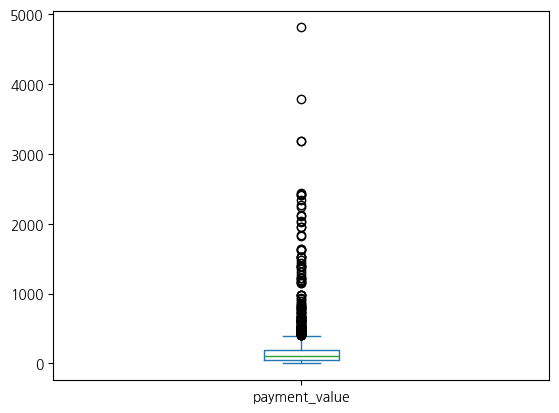

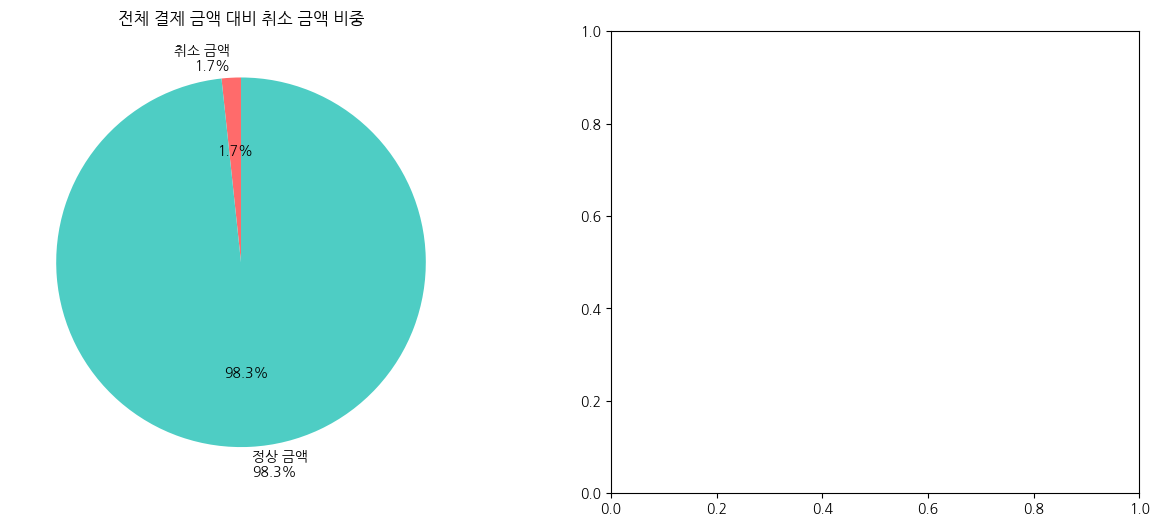

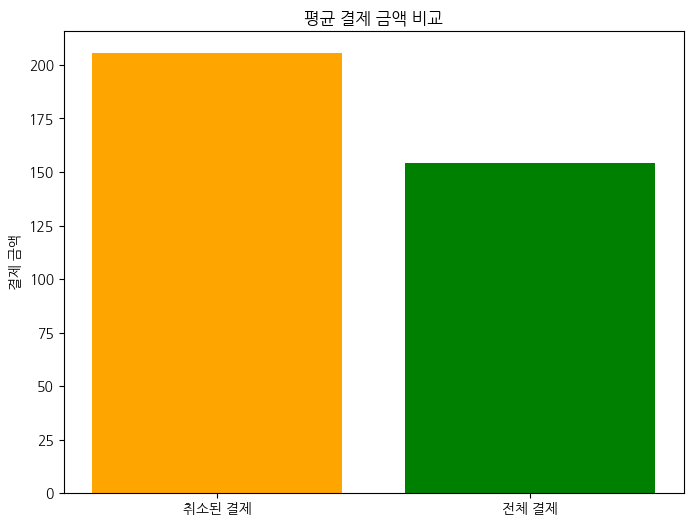

취소된 결제 평균: 205.43
전체 결제 평균: 154.10

=== 평균 결제 금액 비교 ===
전체 평균 결제 금액: 154.10
취소 평균 결제 금액: 205.43
평균 금액 차이: 51.33 (33.3%)


In [52]:
# 결제취소/불가능자 1234명의 금액
# 결제취소/불가능건 1313건, 중간값 $ 102 평균 $205, 최대 $4809, 25% 소수의 고액결제가 평균 높임

cancel_unable_orders = orders_dataset[orders_dataset['order_status'].isin(['canceled','unavailable'])]
cancel_unable_orders['order_id']

# merge
cancel_payments_merged = pd.merge(
    cancel_unable_orders[['order_id', 'order_status']],
    order_payments,
    on='order_id',
    how='inner'
)

cancel_payments_merged.head()
cancel_payments_merged.shape #1313건, 왜 결제취소보다 더 많이 나오지? order 건수라서?
cancel_payments_merged['payment_value'].describe() # 평균 205$, 최대 4809$

cancel_payments_merged['payment_value'].plot(kind='box')

cancel_payments_merged['payment_value']

# 전체결제금액 대비 결제취소비중 1.68%
#전체 결제 금액: 16,008,872.12
#취소 결제 금액: 269,735.11
#취소 비중: 1.68%


# 1. 취소 결제 금액 총합
cancel_total_amount = cancel_payments_merged['payment_value'].sum()

# 2. 전체 결제 금액 총합
total_all_amount = order_payments['payment_value'].sum()

# 3. 비중 계산
cancel_ratio = (cancel_total_amount / total_all_amount) * 100

print("=== 결제 취소 금액 비중 분석 ===")
print(f"전체 결제 금액: {total_all_amount:,.2f}")
print(f"취소 결제 금액: {cancel_total_amount:,.2f}")
print(f"취소 비중: {cancel_ratio:.2f}%")

# 금액 비중 파이차트
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

amounts = [cancel_total_amount, total_all_amount - cancel_total_amount]
labels = [f'취소 금액\n{cancel_ratio:.1f}%', f'정상 금액\n{100-cancel_ratio:.1f}%']
colors = ['#ff6b6b', '#4ecdc4']

axes[0].pie(amounts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0].set_title('전체 결제 금액 대비 취소 금액 비중')


# 전체 결제금액 대비 취소금액 평균 : 취소건 주문금액 더 높다
#전체 평균 결제 금액: 154.10
#취소 평균 결제 금액: 205.43
#평균 금액 차이: 51.33 (33.3%)

# 4. 평균 결제 금액 비교
avg_cancel = cancel_payments_merged['payment_value'].mean()
avg_total = order_payments['payment_value'].mean()

# 바차트 생성
categories = ['취소된 결제', '전체 결제']
values = [avg_cancel, avg_total]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['orange', 'green'])
plt.title('평균 결제 금액 비교')
plt.ylabel('결제 금액')
plt.show()

print(f"취소된 결제 평균: {avg_cancel:.2f}")
print(f"전체 결제 평균: {avg_total:.2f}")

print(f"\n=== 평균 결제 금액 비교 ===")
print(f"전체 평균 결제 금액: {avg_total:.2f}")
print(f"취소 평균 결제 금액: {avg_cancel:.2f}")
print(f"평균 금액 차이: {avg_cancel - avg_total:.2f} ({((avg_cancel/avg_total-1)*100):.1f}%)")

# 결제취소자의 연도별 증가율

=== 연도별 취소 현황 ===
   year  취소_건수     총_취소금액  평균_취소금액
0  2016     33    7548.96   228.76
1  2017    783  157255.08   200.84
2  2018    497  104931.07   211.13

=== 연도별 취소율 비교 ===
   year  취소_건수     총_취소금액  평균_취소금액  전체_주문건수  취소율_percent
0  2016     33    7548.96   228.76      329        10.03
1  2017    783  157255.08   200.84    45101         1.74
2  2018    497  104931.07   211.13    54011         0.92

=== 연도별 증가율 ===
   year  취소건수_증가율  취소금액_증가율  취소율_변화
0  2016      0.00      0.00    0.00
1  2017   2272.73   1983.14   -8.29
2  2018    -36.53    -33.27   -0.82


/tmp/ipython-input-78-1530749369.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancel_unable_orders['order_purchase_timestamp'] = pd.to_datetime(cancel_unable_orders['order_purchase_timestamp'])
/tmp/ipython-input-78-1530749369.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancel_unable_orders['year'] = cancel_unable_orders['order_purchase_timestamp'].dt.year
/tmp/ipython-input-78-1530749369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

Text(0.5, 1.0, '연도별 취소 건수 트렌드')

Text(0.5, 0, '연도')

Text(0, 0.5, '취소 건수')

Text(0, 10, '33')

Text(0, 10, '783')

Text(0, 10, '497')

Text(0.5, 1.0, '연도별 총 취소 금액 트렌드')

Text(0.5, 0, '연도')

Text(0, 0.5, '총 취소 금액 ($)')

Text(0, 10, '$7,548')

Text(0, 10, '$157,255')

Text(0, 10, '$104,931')

Text(0.5, 1.0, '연도별 취소율 트렌드')

Text(0.5, 0, '연도')

Text(0, 0.5, '취소율 (%)')

Text(0, 10, '10.03%')

Text(0, 10, '1.74%')

Text(0, 10, '0.92%')

Text(0.5, 1.0, '월별 취소 건수 트렌드')

Text(0.5, 0, '시간 (월)')

Text(0, 0.5, '월별 취소 건수')

[Text(0, 0, '2016-09'),
 Text(2, 0, '2017-01'),
 Text(4, 0, '2017-03'),
 Text(6, 0, '2017-05'),
 Text(8, 0, '2017-07'),
 Text(10, 0, '2017-09'),
 Text(12, 0, '2017-11'),
 Text(14, 0, '2018-01'),
 Text(16, 0, '2018-03'),
 Text(18, 0, '2018-05'),
 Text(20, 0, '2018-07'),
 Text(22, 0, '2018-09')]

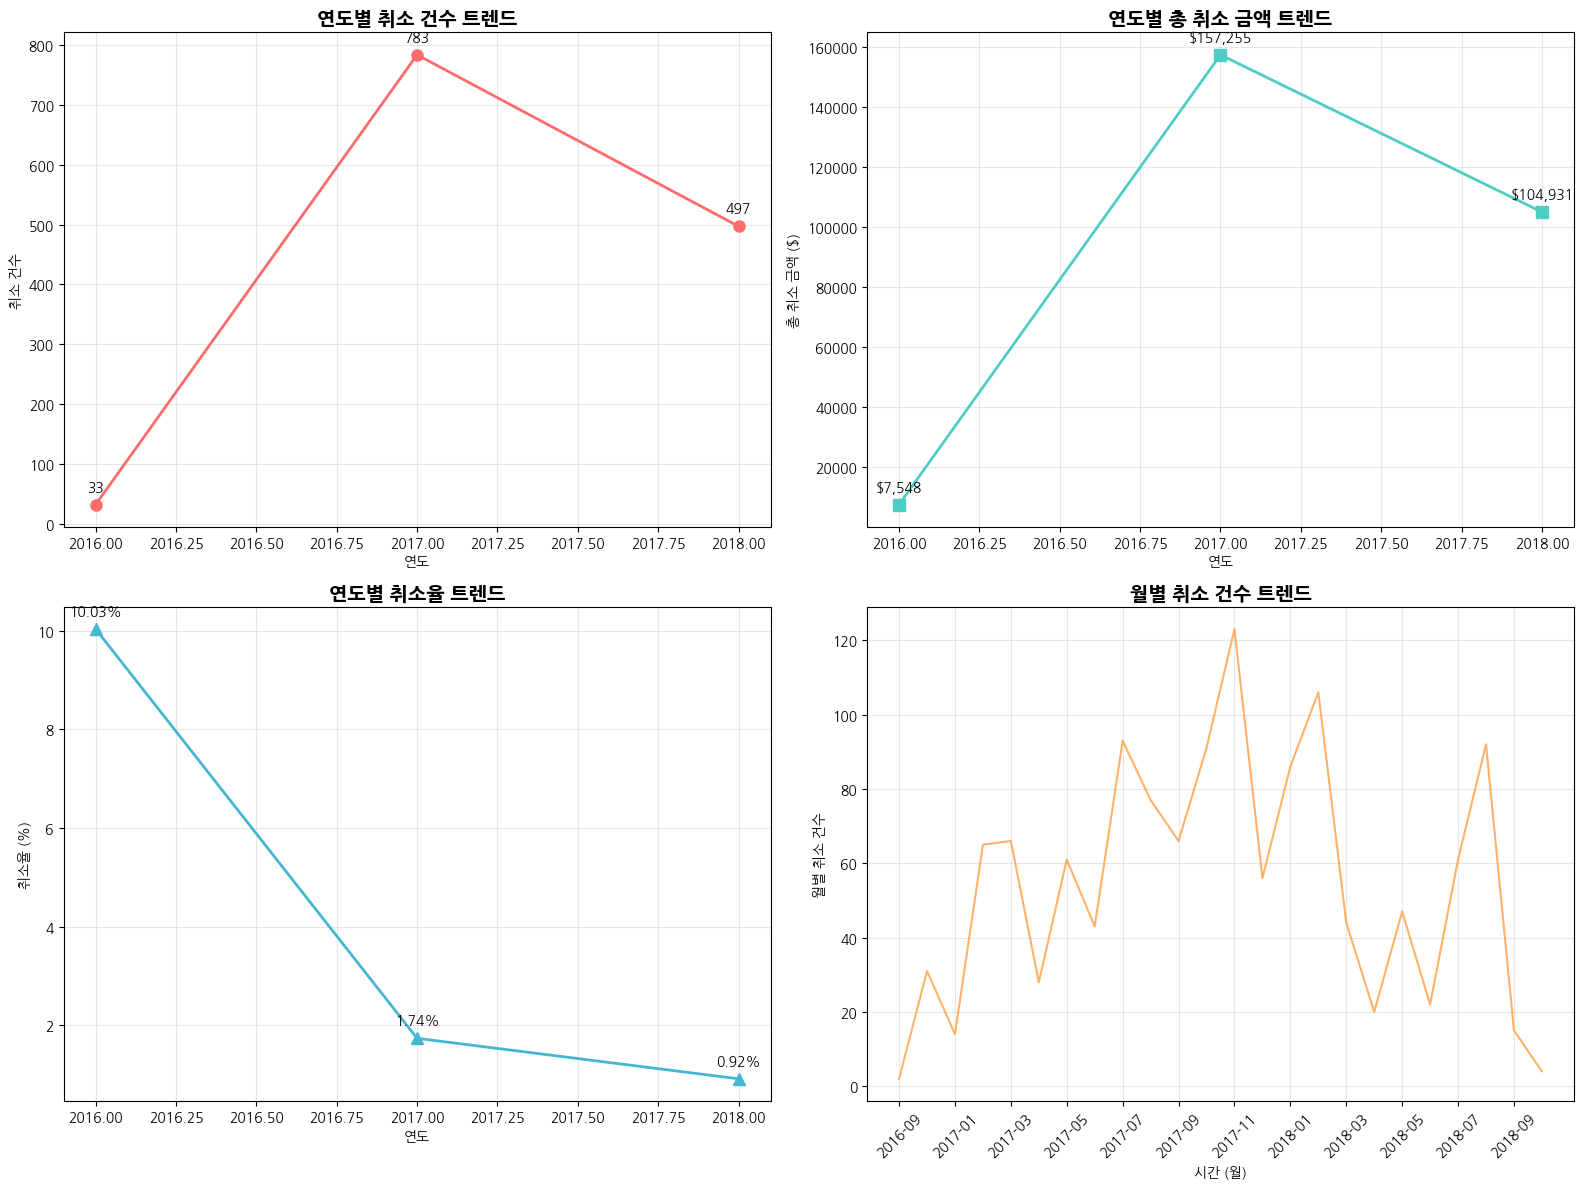

In [78]:
# 취소자의 연도별 증가세

# 결제취소자 연도별 증가세 분석

# 1. 주문 날짜를 datetime으로 변환 (필요시)
cancel_unable_orders['order_purchase_timestamp'] = pd.to_datetime(cancel_unable_orders['order_purchase_timestamp'])

# 2. 연도별 취소 건수 및 금액 분석
cancel_unable_orders['year'] = cancel_unable_orders['order_purchase_timestamp'].dt.year
cancel_unable_orders['month'] = cancel_unable_orders['order_purchase_timestamp'].dt.month
cancel_unable_orders['year_month'] = cancel_unable_orders['order_purchase_timestamp'].dt.to_period('M')

# 3. 취소 주문과 결제 정보 병합 (이미 있는 데이터 활용)
cancel_with_payments = pd.merge(
    cancel_unable_orders,
    order_payments,
    on='order_id',
    how='inner'
)

# 4. 연도별 취소 현황 분석
yearly_cancel_stats = cancel_with_payments.groupby('year').agg({
    'order_id': 'count',  # 취소 건수
    'payment_value': ['sum', 'mean']  # 총 취소 금액, 평균 취소 금액
}).round(2)

yearly_cancel_stats.columns = ['취소_건수', '총_취소금액', '평균_취소금액']
yearly_cancel_stats = yearly_cancel_stats.reset_index()

print("=== 연도별 취소 현황 ===")
print(yearly_cancel_stats)

# 5. 전체 주문 대비 취소율 계산
# 전체 주문 연도별 통계
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['year'] = orders_dataset['order_purchase_timestamp'].dt.year

yearly_total_orders = orders_dataset.groupby('year')['order_id'].count().reset_index()
yearly_total_orders.columns = ['year', '전체_주문건수']

# 취소율 계산
yearly_comparison = pd.merge(yearly_cancel_stats, yearly_total_orders, on='year', how='left')
yearly_comparison['취소율_percent'] = (yearly_comparison['취소_건수'] / yearly_comparison['전체_주문건수'] * 100).round(2)

print("\n=== 연도별 취소율 비교 ===")
print(yearly_comparison)

# 6. 증가율 계산
yearly_comparison['취소건수_증가율'] = yearly_comparison['취소_건수'].pct_change().fillna(0) * 100
yearly_comparison['취소금액_증가율'] = yearly_comparison['총_취소금액'].pct_change().fillna(0) * 100
yearly_comparison['취소율_변화'] = yearly_comparison['취소율_percent'].diff().fillna(0)

print("\n=== 연도별 증가율 ===")
print(yearly_comparison[['year', '취소건수_증가율', '취소금액_증가율', '취소율_변화']].round(2))

# 7. 월별 트렌드 분석 (더 세밀한 분석)
monthly_cancel_stats = cancel_with_payments.groupby('year_month').agg({
    'order_id': 'count',
    'payment_value': ['sum', 'mean']
}).round(2)

monthly_cancel_stats.columns = ['월별_취소건수', '월별_총취소금액', '월별_평균취소금액']
monthly_cancel_stats = monthly_cancel_stats.reset_index()

# 8. 시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 8-1. 연도별 취소 건수 트렌드
axes[0,0].plot(yearly_comparison['year'], yearly_comparison['취소_건수'],
               marker='o', linewidth=2, markersize=8, color='#ff6b6b')
axes[0,0].set_title('연도별 취소 건수 트렌드', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('연도')
axes[0,0].set_ylabel('취소 건수')
axes[0,0].grid(True, alpha=0.3)

# 값 표시
for i, row in yearly_comparison.iterrows():
    axes[0,0].annotate(f"{int(row['취소_건수'])}",
                      (row['year'], row['취소_건수']),
                      textcoords="offset points", xytext=(0,10), ha='center')

# 8-2. 연도별 취소 금액 트렌드
axes[0,1].plot(yearly_comparison['year'], yearly_comparison['총_취소금액'],
               marker='s', linewidth=2, markersize=8, color='#4ecdc4')
axes[0,1].set_title('연도별 총 취소 금액 트렌드', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('연도')
axes[0,1].set_ylabel('총 취소 금액 ($)')
axes[0,1].grid(True, alpha=0.3)

# 값 표시
for i, row in yearly_comparison.iterrows():
    axes[0,1].annotate(f"${int(row['총_취소금액']):,}",
                      (row['year'], row['총_취소금액']),
                      textcoords="offset points", xytext=(0,10), ha='center')

# 8-3. 연도별 취소율 트렌드
axes[1,0].plot(yearly_comparison['year'], yearly_comparison['취소율_percent'],
               marker='^', linewidth=2, markersize=8, color='#45b7d1')
axes[1,0].set_title('연도별 취소율 트렌드', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('연도')
axes[1,0].set_ylabel('취소율 (%)')
axes[1,0].grid(True, alpha=0.3)

# 값 표시
for i, row in yearly_comparison.iterrows():
    axes[1,0].annotate(f"{row['취소율_percent']:.2f}%",
                      (row['year'], row['취소율_percent']),
                      textcoords="offset points", xytext=(0,10), ha='center')

# 8-4. 월별 취소 건수 트렌드 (시간 흐름)
monthly_cancel_stats['year_month_str'] = monthly_cancel_stats['year_month'].astype(str)
x_ticks = range(0, len(monthly_cancel_stats), max(1, len(monthly_cancel_stats)//10))

axes[1,1].plot(monthly_cancel_stats['월별_취소건수'],
               linewidth=1.5, color='#ff9f43', alpha=0.8)
axes[1,1].set_title('월별 취소 건수 트렌드', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('시간 (월)')
axes[1,1].set_ylabel('월별 취소 건수')
axes[1,1].set_xticks(x_ticks)
axes[1,1].set_xticklabels([monthly_cancel_stats.iloc[i]['year_month_str'] for i in x_ticks],
                         rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [23]:
# 재구매자의 결제비중찾기
# 전체 고객 99441
customers['customer_unique_id']


,customer_unique_id
0,861eff4711a542e4b93843c6dd7febb0
1,290c77bc529b7ac935b93aa66c333dc3
2,060e732b5b29e8181a18229c7b0b2b5e
3,259dac757896d24d7702b9acbbff3f3c
4,345ecd01c38d18a9036ed96c73b8d066
...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8
99437,d52a67c98be1cf6a5c84435bd38d095d
99438,e9f50caf99f032f0bf3c55141f019d99
99439,73c2643a0a458b49f58cea58833b192e


In [24]:
# 재구매자 2997 (용혁님코드)
orders_with_unique_customer_id=pd.merge(
    orders_dataset,
    customers[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

customer_order_counts = orders_with_unique_customer_id['customer_unique_id'].value_counts().reset_index()
customer_order_counts.columns = ['customer_unique_id', 'order_count']

repeat_customers_df = customer_order_counts[customer_order_counts['order_count'] > 1]

repeat_customers_df

,customer_unique_id,order_count
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,6469f99c1f9dfae7733b25662e7f1782,7
3,1b6c7548a2a1f9037c1fd3ddfed95f33,7
4,ca77025e7201e3b30c44b472ff346268,7
...,...,...
2992,b8c5ccc844de0242c85efacf5b6a51da,2
2993,f62d6572c9c25b3796d058d7b833f8b7,2
2994,bfc84496b1100cbbd83a6f8087526168,2
2995,3b80d2592c113d689c05232eb90db0ff,2


In [54]:

# 2. 재구매자의 주문 ID 추출
repeat_customer_orders = pd.merge(
    orders_with_unique_customer_id,
    repeat_customers_df[['customer_unique_id']],
    on='customer_unique_id',
    how='inner'
)

# 3. 재구매자의 결제 정보 병합
repeat_customer_payments = pd.merge(
    repeat_customer_orders[['order_id', 'customer_unique_id']],
    order_payments,
    on='order_id',
    how='inner'
)

# 4. 재구매자 결제 통계
repeat_payment_total = repeat_customer_payments['payment_value'].sum()
repeat_payment_count = len(repeat_customer_payments)
repeat_customer_count = len(repeat_customers_df)

print(f"재구매자 수: {repeat_customer_count:,}명")
print(f"재구매자 결제 건수: {repeat_payment_count:,}건")
print(f"재구매자 총 결제 금액: ${repeat_payment_total:,.2f}")

# 5. 전체 결제 대비 재구매자 결제 비중
total_payment_amount = order_payments['payment_value'].sum()
repeat_payment_ratio = (repeat_payment_total / total_payment_amount) * 100

print(f"\n전체 결제 금액: ${total_payment_amount:,.2f}")
print(f"재구매자 결제 금액: ${repeat_payment_total:,.2f}")
print(f"재구매자 결제 비중: {repeat_payment_ratio:.2f}%")


재구매자 수: 2,997명
재구매자 결제 건수: 6,723건
재구매자 총 결제 금액: $944,022.71

전체 결제 금액: $16,008,872.12
재구매자 결제 금액: $944,022.71
재구매자 결제 비중: 5.90%


# 재구매자의 연도별 증가비율 및 결제금액비율

In [55]:
# 재구매자의 연도별 증가비율과 연도별 결제금액비율

# 2. 재구매자의 주문 ID 추출
repeat_customer_orders = pd.merge(
    orders_with_unique_customer_id,
    repeat_customers_df[['customer_unique_id']],
    on='customer_unique_id',
    how='inner'
)

# 3. 재구매자의 결제 정보 병합
repeat_customer_payments = pd.merge(
    repeat_customer_orders[['order_id', 'customer_unique_id']],
    order_payments,
    on='order_id',
    how='inner'
)

# 4. 재구매자 결제 통계
repeat_payment_total = repeat_customer_payments['payment_value'].sum()
repeat_payment_count = len(repeat_customer_payments)
repeat_customer_count = len(repeat_customers_df)

print(f"재구매자 수: {repeat_customer_count:,}명")
print(f"재구매자 결제 건수: {repeat_payment_count:,}건")
print(f"재구매자 총 결제 금액: ${repeat_payment_total:,.2f}")

# 5. 전체 결제 대비 재구매자 결제 비중
total_payment_amount = order_payments['payment_value'].sum()
repeat_payment_ratio = (repeat_payment_total / total_payment_amount) * 100

print(f"\n전체 결제 금액: ${total_payment_amount:,.2f}")
print(f"재구매자 결제 금액: ${repeat_payment_total:,.2f}")
print(f"재구매자 결제 비중: {repeat_payment_ratio:.2f}%")


재구매자 수: 2,997명
재구매자 결제 건수: 6,723건
재구매자 총 결제 금액: $944,022.71

전체 결제 금액: $16,008,872.12
재구매자 결제 금액: $944,022.71
재구매자 결제 비중: 5.90%


In [56]:
# 1. 주문 데이터에 연도 추가
orders_with_year = orders_dataset.copy()
orders_with_year['order_purchase_timestamp'] = pd.to_datetime(orders_with_year['order_purchase_timestamp'])
orders_with_year['year'] = orders_with_year['order_purchase_timestamp'].dt.year

# 2. 고객 고유 ID와 연도별 데이터 병합
orders_with_customer_year = pd.merge(
    orders_with_year,
    customers[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

# 3. 연도별 재구매자 식별 함수
def identify_repeat_customers_by_year(df, target_year):
    """특정 연도까지의 데이터를 기준으로 재구매자를 식별"""
    # 해당 연도까지의 주문만 필터링
    df_filtered = df[df['year'] <= target_year]

    # 고객별 주문 횟수 계산
    customer_counts = df_filtered['customer_unique_id'].value_counts().reset_index()
    customer_counts.columns = ['customer_unique_id', 'order_count']

    # 재구매자 (2회 이상 구매)
    repeat_customers = customer_counts[customer_counts['order_count'] > 1]['customer_unique_id'].tolist()

    return repeat_customers

# 4. 연도별 분석
years = sorted(orders_with_customer_year['year'].unique())
yearly_analysis = []

for year in years:
    # 해당 연도의 주문 데이터
    year_orders = orders_with_customer_year[orders_with_customer_year['year'] == year]

    # 해당 연도까지의 재구매자 식별
    repeat_customers = identify_repeat_customers_by_year(orders_with_customer_year, year)

    # 해당 연도의 재구매자 주문만 추출
    repeat_orders_in_year = year_orders[year_orders['customer_unique_id'].isin(repeat_customers)]

    # 결제 정보 병합
    year_payments = pd.merge(year_orders[['order_id']], order_payments, on='order_id', how='inner')
    repeat_payments = pd.merge(repeat_orders_in_year[['order_id']], order_payments, on='order_id', how='inner')

    # 통계 계산
    total_payment = year_payments['payment_value'].sum()
    repeat_payment = repeat_payments['payment_value'].sum()
    repeat_ratio = (repeat_payment / total_payment * 100) if total_payment > 0 else 0

    total_customers = year_orders['customer_unique_id'].nunique()
    repeat_customer_count = len(repeat_customers)
    repeat_customer_ratio = (repeat_customer_count / total_customers * 100) if total_customers > 0 else 0

    yearly_analysis.append({
        'year': year,
        'total_payment': total_payment,
        'repeat_payment': repeat_payment,
        'repeat_payment_ratio': repeat_ratio,
        'total_customers': total_customers,
        'repeat_customers': repeat_customer_count,
        'repeat_customer_ratio': repeat_customer_ratio,
        'avg_payment_per_repeat_customer': repeat_payment / repeat_customer_count if repeat_customer_count > 0 else 0
    })

# 5. 결과를 DataFrame으로 변환
yearly_df = pd.DataFrame(yearly_analysis)

# 6. 증가율 계산
yearly_df['payment_growth_rate'] = yearly_df['repeat_payment'].pct_change() * 100
yearly_df['customer_growth_rate'] = yearly_df['repeat_customers'].pct_change() * 100
yearly_df['ratio_growth_rate'] = yearly_df['repeat_payment_ratio'].pct_change() * 100

# 7. 결과 출력
print("=== 재구매자 연도별 분석 ===")
print(yearly_df.round(2))

print("\n=== 연도별 재구매자 결제 비중 변화 ===")
for _, row in yearly_df.iterrows():
    print(f"{int(row['year'])}년: {row['repeat_payment_ratio']:.1f}% "
          f"(재구매자 {int(row['repeat_customers'])}명, 결제금액 ${row['repeat_payment']:,.0f})")

# 8. 성장률 분석
print("\n=== 전년 대비 성장률 ===")
for _, row in yearly_df.iterrows():
    if not pd.isna(row['payment_growth_rate']):
        print(f"{int(row['year'])}년:")
        print(f"  - 재구매자 결제금액 증가율: {row['payment_growth_rate']:.1f}%")
        print(f"  - 재구매자 수 증가율: {row['customer_growth_rate']:.1f}%")
        print(f"  - 재구매자 결제비중 증가율: {row['ratio_growth_rate']:.1f}%")


=== 재구매자 연도별 분석 ===
   year  total_payment  repeat_payment  repeat_payment_ratio  total_customers  \
0  2016       59362.34          976.17                  1.64              326   
1  2017     7249746.73       388939.17                  5.36            43713   
2  2018     8699763.05       467548.80                  5.37            52749   

   repeat_customers  repeat_customer_ratio  avg_payment_per_repeat_customer  \
0                 3                   0.92                           325.39   
1              1264                   2.89                           307.71   
2              2997                   5.68                           156.01   

   payment_growth_rate  customer_growth_rate  ratio_growth_rate  
0                  NaN                   NaN                NaN  
1             39743.38              42033.33             226.25  
2                20.21                137.10               0.18  

=== 연도별 재구매자 결제 비중 변화 ===
2016년: 1.6% (재구매자 3명, 결제금액 $976)
2017년: 5.4% (재

<Figure size 1500x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '재구매자 결제 비중 변화')

Text(0.5, 0, '연도')

Text(0, 0.5, '결제 비중 (%)')

Text(0, 10, '1.6%')

Text(0, 10, '5.4%')

Text(0, 10, '5.4%')

<Axes: >

<BarContainer object of 3 artists>

Text(0.5, 1.0, '재구매자 연도별 결제금액')

Text(0.5, 0, '연도')

Text(0, 0.5, '결제금액 ($)')

<Axes: >

<BarContainer object of 3 artists>

Text(0.5, 1.0, '재구매자 수 변화')

Text(0.5, 0, '연도')

Text(0, 0.5, '재구매자 수 (명)')

<Axes: >

Text(0.5, 1.0, '전년 대비 성장률')

Text(0.5, 0, '연도')

Text(0, 0.5, '성장률 (%)')

<Axes: >

Text(0.5, 1.0, '재구매자 평균 결제액 변화')

Text(0.5, 0, '연도')

Text(0, 0.5, '평균 결제액 ($)')

<Axes: >

<BarContainer object of 3 artists>

Text(0.5, 1.0, '재구매자 결제비중 트렌드')

Text(0.5, 0, '연도')

Text(0, 0.5, '비중 (%)')

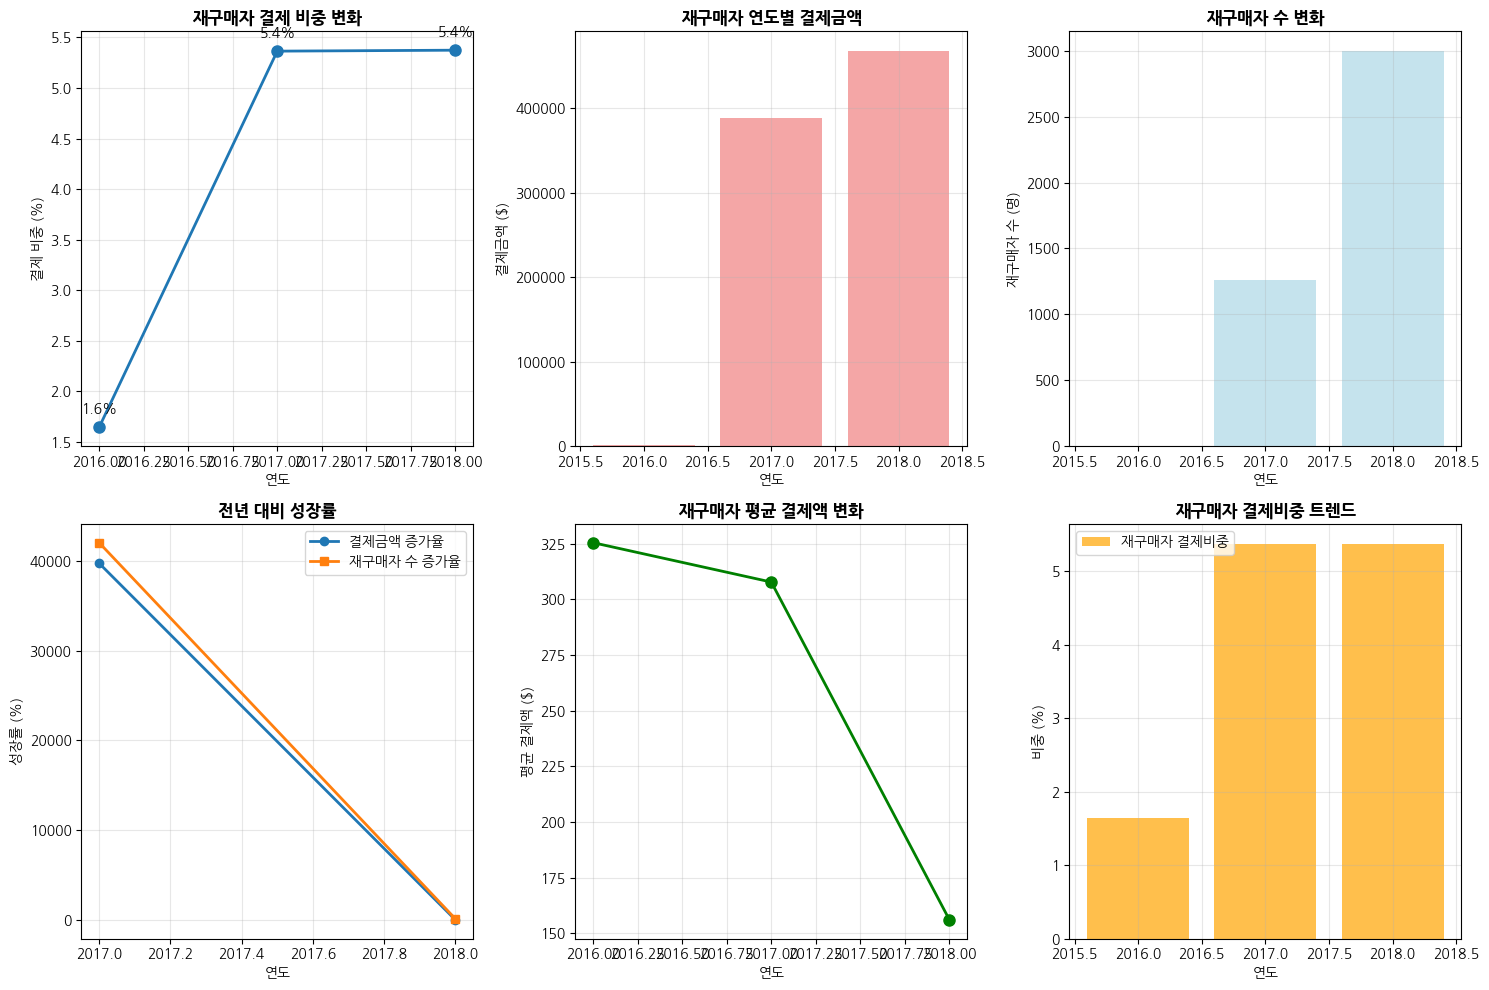


=== 종합 분석 결과 ===
분석 기간: 2016년 ~ 2018년
재구매자 결제비중 변화: 1.6% → 5.4%
재구매자 결제금액 변화: $976 → $467,549
재구매자 수 변화: 3명 → 2997명

전체 기간 누적 성장률:
재구매자 결제금액: 47796.2%
재구매자 수: 99800.0%


In [57]:
# 9. 시각화
plt.figure(figsize=(15, 10))

# 재구매자 결제 비중 변화
plt.subplot(2, 3, 1)
plt.plot(yearly_df['year'], yearly_df['repeat_payment_ratio'], marker='o', linewidth=2, markersize=8)
plt.title('재구매자 결제 비중 변화', fontsize=12, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('결제 비중 (%)')
plt.grid(True, alpha=0.3)
for i, (year, ratio) in enumerate(zip(yearly_df['year'], yearly_df['repeat_payment_ratio'])):
    plt.annotate(f'{ratio:.1f}%', (year, ratio), textcoords="offset points", xytext=(0,10), ha='center')

# 재구매자 결제금액 변화
plt.subplot(2, 3, 2)
plt.bar(yearly_df['year'], yearly_df['repeat_payment'], color='lightcoral', alpha=0.7)
plt.title('재구매자 연도별 결제금액', fontsize=12, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('결제금액 ($)')
plt.grid(True, alpha=0.3)

# 재구매자 수 변화
plt.subplot(2, 3, 3)
plt.bar(yearly_df['year'], yearly_df['repeat_customers'], color='lightblue', alpha=0.7)
plt.title('재구매자 수 변화', fontsize=12, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('재구매자 수 (명)')
plt.grid(True, alpha=0.3)

# 전년 대비 성장률
plt.subplot(2, 3, 4)
x = yearly_df['year'][1:]  # 첫 번째 연도 제외 (성장률 계산 불가)
plt.plot(x, yearly_df['payment_growth_rate'][1:], marker='o', label='결제금액 증가율', linewidth=2)
plt.plot(x, yearly_df['customer_growth_rate'][1:], marker='s', label='재구매자 수 증가율', linewidth=2)
plt.title('전년 대비 성장률', fontsize=12, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('성장률 (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# 재구매자 평균 결제액 변화
plt.subplot(2, 3, 5)
plt.plot(yearly_df['year'], yearly_df['avg_payment_per_repeat_customer'], marker='o', color='green', linewidth=2, markersize=8)
plt.title('재구매자 평균 결제액 변화', fontsize=12, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('평균 결제액 ($)')
plt.grid(True, alpha=0.3)

# 전체 vs 재구매자 비중 비교
plt.subplot(2, 3, 6)
plt.bar(yearly_df['year'], yearly_df['repeat_payment_ratio'], color='orange', alpha=0.7, label='재구매자 결제비중')
plt.title('재구매자 결제비중 트렌드', fontsize=12, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('비중 (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 10. 종합 요약
print("\n=== 종합 분석 결과 ===")
first_year = yearly_df.iloc[0]
last_year = yearly_df.iloc[-1]

print(f"분석 기간: {int(first_year['year'])}년 ~ {int(last_year['year'])}년")
print(f"재구매자 결제비중 변화: {first_year['repeat_payment_ratio']:.1f}% → {last_year['repeat_payment_ratio']:.1f}%")
print(f"재구매자 결제금액 변화: ${first_year['repeat_payment']:,.0f} → ${last_year['repeat_payment']:,.0f}")
print(f"재구매자 수 변화: {int(first_year['repeat_customers'])}명 → {int(last_year['repeat_customers'])}명")


# 전체 기간 누적 성장률
total_payment_growth = ((last_year['repeat_payment'] / first_year['repeat_payment']) - 1) * 100
total_customer_growth = ((last_year['repeat_customers'] / first_year['repeat_customers']) - 1) * 100

print(f"\n전체 기간 누적 성장률:")
print(f"재구매자 결제금액: {total_payment_growth:.1f}%")
print(f"재구매자 수: {total_customer_growth:.1f}%")


=== 재구매자 결제금액 비중의 연도별 성장세 ===
   year  total_payment  repeat_payment  new_payment  repeat_payment_share  \
0  2016       59362.34          976.17     58386.17                  1.64   
1  2017     7249746.73       388939.17   6860807.56                  5.36   
2  2018     8699763.05       467548.80   8232214.25                  5.37   

   new_payment_share  total_customers  repeat_customers  new_customers  \
0              98.36              326                 3            323   
1              94.64            43713              1261          42452   
2              94.63            52749              1799          50950   

   avg_repeat_payment  avg_new_payment  payment_share_growth  \
0              325.39           180.76                   NaN   
1              308.44           161.61                226.25   
2              259.89           161.57                  0.18   

   payment_amount_growth  customer_count_growth  
0                    NaN                    NaN  
1      

<Figure size 1600x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '재구매자 결제 비중 성장 추세')

Text(0.5, 0, '연도')

Text(0, 0.5, '결제 비중 (%)')

([<matplotlib.axis.XTick at 0x7d3c6a3ea5d0>,
 [Text(2016, 0, '2016'), Text(2017, 0, '2017'), Text(2018, 0, '2018')])

Text(0, 15, '1.6%')

Text(0, 15, '5.4%')

Text(0, 15, '5.4%')

<Axes: >

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

Text(0.5, 1.0, '재구매자 vs 1회 구매자 결제 비중')

Text(0.5, 0, '연도')

Text(0, 0.5, '결제 비중 (%)')

([<matplotlib.axis.XTick at 0x7d3c69519ad0>,
 [Text(0, 0, '2016'), Text(1, 0, '2017'), Text(2, 0, '2018')])

<Axes: >

<BarContainer object of 3 artists>

Text(0.5, 1.0, '재구매자 결제금액 성장')

Text(0.5, 0, '연도')

Text(0, 0.5, '결제금액 ($)')

([<matplotlib.axis.XTick at 0x7d3c69282d90>,
 [Text(2016, 0, '2016'), Text(2017, 0, '2017'), Text(2018, 0, '2018')])

Text(0, 5, '$976')

Text(0, 5, '$388,939')

Text(0, 5, '$467,549')

<Axes: >

Text(0.5, 1.0, '전년 대비 성장률')

Text(0.5, 0, '연도')

Text(0, 0.5, '성장률 (%)')

([<matplotlib.axis.XTick at 0x7d3c692a7410>,
 [Text(2017, 0, '2017'), Text(2018, 0, '2018')])

<Axes: >

Text(0.5, 1.0, '평균 결제액 비교')

Text(0.5, 0, '연도')

Text(0, 0.5, '평균 결제액 ($)')

([<matplotlib.axis.XTick at 0x7d3c692e60d0>,
 [Text(2016, 0, '2016'), Text(2017, 0, '2017'), Text(2018, 0, '2018')])

<Axes: >

Text(0.5, 1.0, '재구매자 결제비중 성장 추세')

Text(0.5, 0, '연도')

Text(0, 0.5, '결제 비중 (%)')

([<matplotlib.axis.XTick at 0x7d3c6931dfd0>,
 [Text(2016, 0, '2016'), Text(2017, 0, '2017'), Text(2018, 0, '2018')])

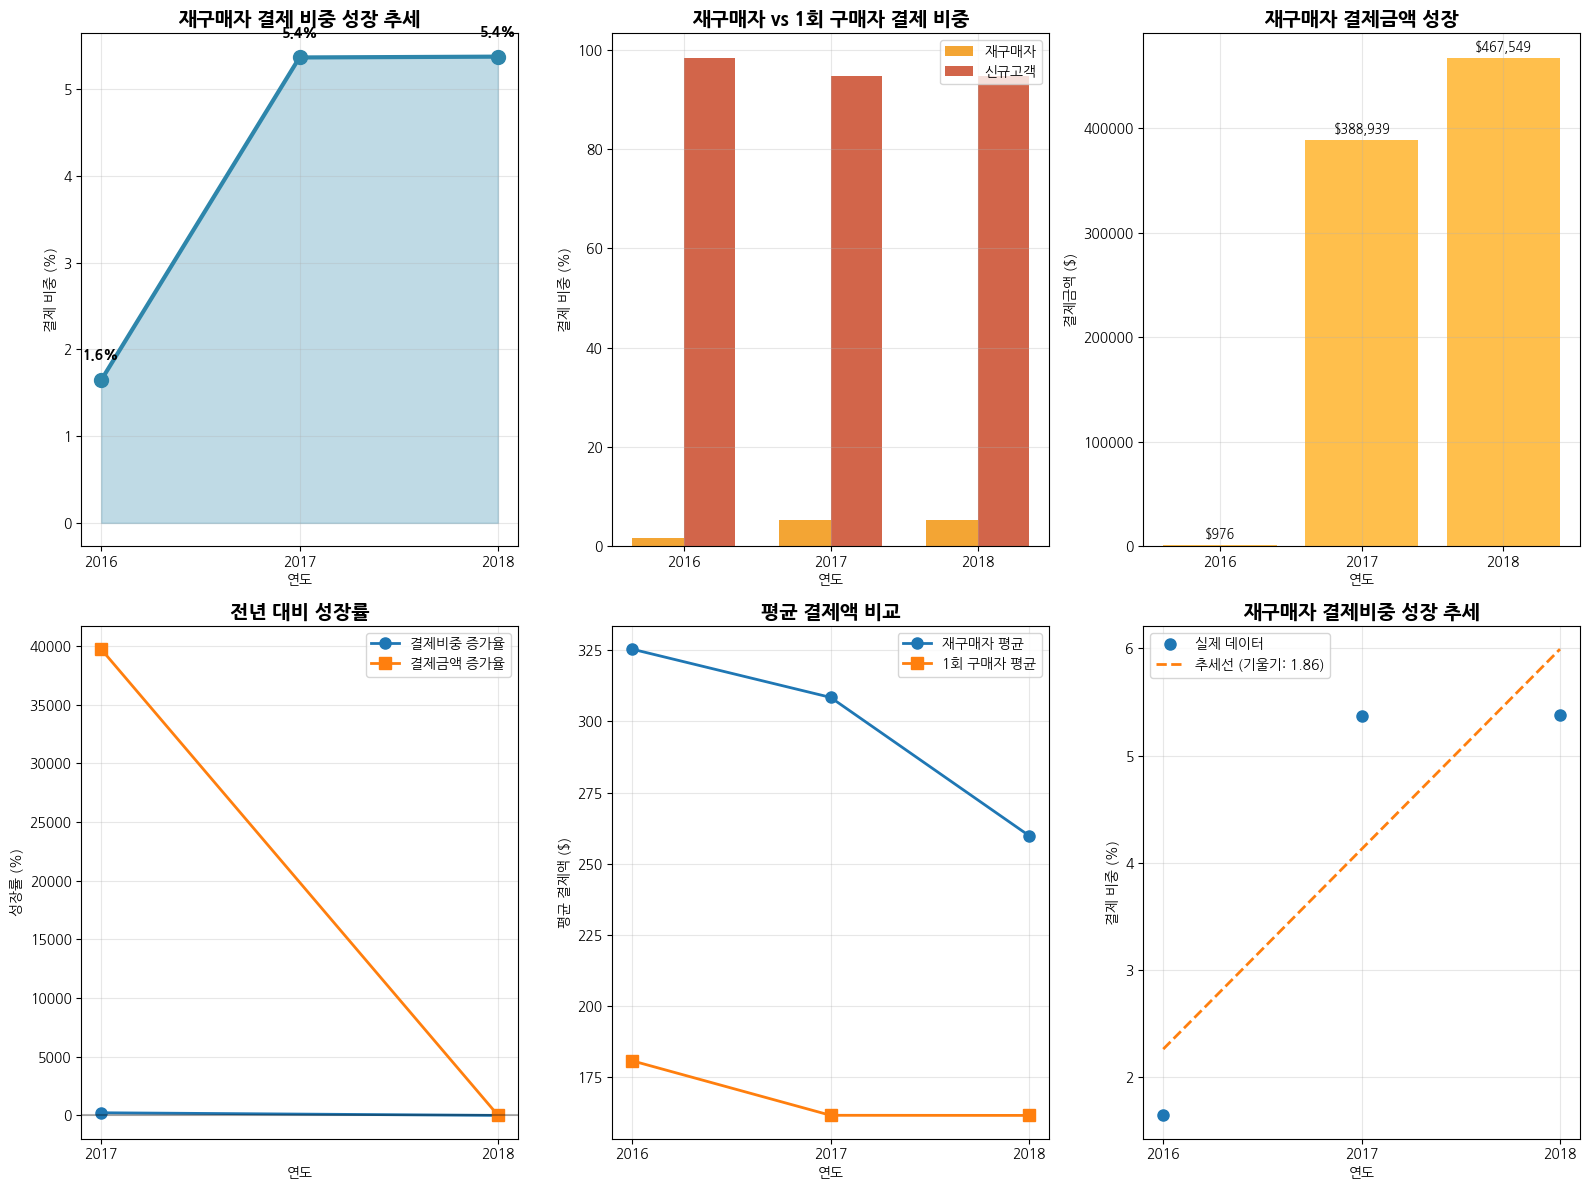


=== 종합 분석 결과 ===
📊 분석 기간: 2016년 ~ 2018년 (2년간)
📈 재구매자 결제비중 변화: 1.6% → 5.4%
📊 연평균 성장률 (CAGR): 80.8%
📊 절대 성장: 3.7%p 증가
📊 최대 성장률: 2017년 226.2%p

💰 결제금액 성장:
  전체 기간 재구매자 결제금액: $976 → $467,549
  재구매자 결제금액 총 성장률: 47796.2%

👥 고객 수 변화:
  재구매자 수: 3명 → 1799명
  재구매자 수 총 성장률: 59866.7%

🔍 성장 동력 분석:
  재구매자 수 증가 기여도: 59866.7%
  1인당 평균 결제액 증가 기여도: -12070.4%

⚖️ 고객 구성 변화:
  2016년 - 재구매자: 1.6%, 1회 구매자: 98.4%
  2018년 - 재구매자: 5.4%, 1회 구매자: 94.6%


In [58]:
# 연도별 데이터 정리 (월별 분리 문제 해결)
# 주문 데이터에서 연도만 추출하여 정리
orders_with_customer_year['year'] = orders_with_customer_year['order_purchase_timestamp'].dt.year

# 2. 연도별 재구매자 결제 비중 분석
def analyze_repeat_customer_payment_share():
    years = sorted(orders_with_customer_year['year'].unique())
    analysis_results = []

    for year in years:
        # 해당 연도의 모든 주문
        year_orders = orders_with_customer_year[orders_with_customer_year['year'] == year]

        # 해당 연도까지 누적으로 재구매자 식별 (과거 구매 이력 포함)
        historical_orders = orders_with_customer_year[orders_with_customer_year['year'] <= year]
        customer_order_counts = historical_orders['customer_unique_id'].value_counts()
        repeat_customers = customer_order_counts[customer_order_counts > 1].index.tolist()

        # 해당 연도의 재구매자 주문만 추출
        repeat_orders_in_year = year_orders[year_orders['customer_unique_id'].isin(repeat_customers)]

        # 결제 정보 병합
        # 전체 결제
        total_year_payments = pd.merge(
            year_orders[['order_id']],
            order_payments,
            on='order_id',
            how='inner'
        )

        # 재구매자 결제
        repeat_year_payments = pd.merge(
            repeat_orders_in_year[['order_id']],
            order_payments,
            on='order_id',
            how='inner'
        )

        # 신규고객 결제 (해당 연도에 처음 구매한 고객)
        new_customers_in_year = year_orders[~year_orders['customer_unique_id'].isin(repeat_customers)]
        new_year_payments = pd.merge(
            new_customers_in_year[['order_id']],
            order_payments,
            on='order_id',
            how='inner'
        )

        # 통계 계산
        total_payment = total_year_payments['payment_value'].sum()
        repeat_payment = repeat_year_payments['payment_value'].sum()
        new_payment = new_year_payments['payment_value'].sum()

        repeat_payment_share = (repeat_payment / total_payment * 100) if total_payment > 0 else 0
        new_payment_share = (new_payment / total_payment * 100) if total_payment > 0 else 0

        # 고객 수 통계
        total_customers = year_orders['customer_unique_id'].nunique()
        repeat_customer_count = repeat_orders_in_year['customer_unique_id'].nunique()
        new_customer_count = new_customers_in_year['customer_unique_id'].nunique()

        # 평균 결제액
        avg_repeat_payment = repeat_payment / repeat_customer_count if repeat_customer_count > 0 else 0
        avg_new_payment = new_payment / new_customer_count if new_customer_count > 0 else 0

        analysis_results.append({
            'year': year,
            'total_payment': total_payment,
            'repeat_payment': repeat_payment,
            'new_payment': new_payment,
            'repeat_payment_share': repeat_payment_share,
            'new_payment_share': new_payment_share,
            'total_customers': total_customers,
            'repeat_customers': repeat_customer_count,
            'new_customers': new_customer_count,
            'avg_repeat_payment': avg_repeat_payment,
            'avg_new_payment': avg_new_payment
        })

    return pd.DataFrame(analysis_results)

# 3. 분석 실행
yearly_share_df = analyze_repeat_customer_payment_share()

# 4. 성장률 계산
yearly_share_df['payment_share_growth'] = yearly_share_df['repeat_payment_share'].pct_change() * 100
yearly_share_df['payment_amount_growth'] = yearly_share_df['repeat_payment'].pct_change() * 100
yearly_share_df['customer_count_growth'] = yearly_share_df['repeat_customers'].pct_change() * 100

# 5. 결과 출력
print("=== 재구매자 결제금액 비중의 연도별 성장세 ===")
print(yearly_share_df.round(2))

print("\n=== 연도별 재구매자 결제 비중 상세 분석 ===")
for _, row in yearly_share_df.iterrows():
    print(f"\n{int(row['year'])}년:")
    print(f"  전체 결제금액: ${row['total_payment']:,.0f}")
    print(f"  재구매자 결제금액: ${row['repeat_payment']:,.0f} ({row['repeat_payment_share']:.1f}%)")
    print(f"  1회 구매자 결제금액: ${row['new_payment']:,.0f} ({row['new_payment_share']:.1f}%)")
    print(f"  재구매자 {int(row['repeat_customers'])}명 vs 1회 구매자 {int(row['new_customers'])}명")

# 6. 성장률 분석
print("\n=== 전년 대비 성장률 ===")
for _, row in yearly_share_df.iterrows():
    if not pd.isna(row['payment_share_growth']):
        print(f"\n{int(row['year'])}년 (전년 대비):")
        print(f"  재구매자 결제비중 증가율: {row['payment_share_growth']:+.1f}%p")
        print(f"  재구매자 결제금액 증가율: {row['payment_amount_growth']:+.1f}%")
        print(f"  재구매자 수 증가율: {row['customer_count_growth']:+.1f}%")

# 7. 시각화
plt.figure(figsize=(16, 12))

# 1) 재구매자 결제 비중 트렌드 (메인 차트)
plt.subplot(2, 3, 1)
plt.plot(yearly_share_df['year'], yearly_share_df['repeat_payment_share'],
         marker='o', linewidth=3, markersize=10, color='#2E86AB')
plt.fill_between(yearly_share_df['year'], yearly_share_df['repeat_payment_share'],
                 alpha=0.3, color='#2E86AB')
plt.title('재구매자 결제 비중 성장 추세', fontsize=14, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('결제 비중 (%)')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_share_df['year'])  # 연도만 표시
# 데이터 포인트에 수치 표시
for i, (year, share) in enumerate(zip(yearly_share_df['year'], yearly_share_df['repeat_payment_share'])):
    plt.annotate(f'{share:.1f}%', (year, share),
                textcoords="offset points", xytext=(0,15), ha='center', fontweight='bold')

# 2) 재구매자 vs 신규고객 결제 비중 비교
plt.subplot(2, 3, 2)
width = 0.35
x = np.arange(len(yearly_share_df))
plt.bar(x - width/2, yearly_share_df['repeat_payment_share'], width,
        label='재구매자', color='#F18F01', alpha=0.8)
plt.bar(x + width/2, yearly_share_df['new_payment_share'], width,
        label='신규고객', color='#C73E1D', alpha=0.8)
plt.title('재구매자 vs 1회 구매자 결제 비중', fontsize=14, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('결제 비중 (%)')
plt.xticks(x, yearly_share_df['year'].astype(int))
plt.legend()
plt.grid(True, alpha=0.3)

# 3) 재구매자 결제금액 절대값 성장
plt.subplot(2, 3, 3)
plt.bar(yearly_share_df['year'], yearly_share_df['repeat_payment'],
        color='orange', alpha=0.7)
plt.title('재구매자 결제금액 성장', fontsize=14, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('결제금액 ($)')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_share_df['year'])  # 연도만 표시
# 금액 표시
for i, (year, amount) in enumerate(zip(yearly_share_df['year'], yearly_share_df['repeat_payment'])):
    plt.annotate(f'${amount:,.0f}', (year, amount),
                textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

# 4) 전년 대비 성장률
plt.subplot(2, 3, 4)
x_growth = yearly_share_df['year'][1:]
plt.plot(x_growth, yearly_share_df['payment_share_growth'][1:],
         marker='o', label='결제비중 증가율', linewidth=2, markersize=8)
plt.plot(x_growth, yearly_share_df['payment_amount_growth'][1:],
         marker='s', label='결제금액 증가율', linewidth=2, markersize=8)
plt.title('전년 대비 성장률', fontsize=14, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('성장률 (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xticks(x_growth)  # 연도만 표시

# 5) 재구매자 평균 결제액 vs 신규고객 평균 결제액
plt.subplot(2, 3, 5)
plt.plot(yearly_share_df['year'], yearly_share_df['avg_repeat_payment'],
         marker='o', label='재구매자 평균', linewidth=2, markersize=8)
plt.plot(yearly_share_df['year'], yearly_share_df['avg_new_payment'],
         marker='s', label='1회 구매자 평균', linewidth=2, markersize=8)
plt.title('평균 결제액 비교', fontsize=14, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('평균 결제액 ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(yearly_share_df['year'])  # 연도만 표시

# 6) 재구매자 비중 성장 트렌드 (선형 회귀)
plt.subplot(2, 3, 6)
x_vals = yearly_share_df['year'].values
y_vals = yearly_share_df['repeat_payment_share'].values
z = np.polyfit(x_vals, y_vals, 1)
p = np.poly1d(z)
plt.plot(x_vals, y_vals, 'o', markersize=8, label='실제 데이터')
plt.plot(x_vals, p(x_vals), "--", linewidth=2, label=f'추세선 (기울기: {z[0]:.2f})')
plt.title('재구매자 결제비중 성장 추세', fontsize=14, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('결제 비중 (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(yearly_share_df['year'])  # 연도만 표시

plt.tight_layout()
plt.show()

# 8. 종합 분석 및 인사이트
print("\n" + "="*50)
print("=== 종합 분석 결과 ===")
print("="*50)

first_year = yearly_share_df.iloc[0]
last_year = yearly_share_df.iloc[-1]
years_span = int(last_year['year'] - first_year['year'])

print(f"📊 분석 기간: {int(first_year['year'])}년 ~ {int(last_year['year'])}년 ({years_span}년간)")
print(f"📈 재구매자 결제비중 변화: {first_year['repeat_payment_share']:.1f}% → {last_year['repeat_payment_share']:.1f}%")

# 연평균 성장률 계산
if years_span > 0:
    cagr = ((last_year['repeat_payment_share'] / first_year['repeat_payment_share']) ** (1/years_span) - 1) * 100
    print(f"📊 연평균 성장률 (CAGR): {cagr:.1f}%")

# 절대 성장 포인트
growth_points = last_year['repeat_payment_share'] - first_year['repeat_payment_share']
print(f"📊 절대 성장: {growth_points:.1f}%p 증가")

# 최고 성장률 연도
max_growth_idx = yearly_share_df['payment_share_growth'].idxmax()
if not pd.isna(yearly_share_df.loc[max_growth_idx, 'payment_share_growth']):
    max_growth_year = int(yearly_share_df.loc[max_growth_idx, 'year'])
    max_growth_rate = yearly_share_df.loc[max_growth_idx, 'payment_share_growth']
    print(f"📊 최대 성장률: {max_growth_year}년 {max_growth_rate:.1f}%p")

print(f"\n💰 결제금액 성장:")
print(f"  전체 기간 재구매자 결제금액: ${first_year['repeat_payment']:,.0f} → ${last_year['repeat_payment']:,.0f}")
payment_growth = ((last_year['repeat_payment'] / first_year['repeat_payment']) - 1) * 100
print(f"  재구매자 결제금액 총 성장률: {payment_growth:.1f}%")

print(f"\n👥 고객 수 변화:")
print(f"  재구매자 수: {int(first_year['repeat_customers'])}명 → {int(last_year['repeat_customers'])}명")
customer_growth = ((last_year['repeat_customers'] / first_year['repeat_customers']) - 1) * 100
print(f"  재구매자 수 총 성장률: {customer_growth:.1f}%")

# 성장 동력 분석
print(f"\n🔍 성장 동력 분석:")
print(f"  재구매자 수 증가 기여도: {customer_growth:.1f}%")
print(f"  1인당 평균 결제액 증가 기여도: {payment_growth - customer_growth:.1f}%")

# 재구매자 vs 1회 구매자 비중 변화
print(f"\n⚖️ 고객 구성 변화:")
print(f"  {int(first_year['year'])}년 - 재구매자: {first_year['repeat_payment_share']:.1f}%, 1회 구매자: {first_year['new_payment_share']:.1f}%")
print(f"  {int(last_year['year'])}년 - 재구매자: {last_year['repeat_payment_share']:.1f}%, 1회 구매자: {last_year['new_payment_share']:.1f}%")

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<BarContainer object of 3 artists>

Text(0.5, 1.0, '재구매자 결제금액 성장')

Text(0.5, 0, '연도')

Text(0, 0.5, '결제금액 ($)')

([<matplotlib.axis.XTick at 0x7d3c6a345450>,
 [Text(2016, 0, '2016'), Text(2017, 0, '2017'), Text(2018, 0, '2018')])

Text(0, 5, '$976')

Text(0, 5, '$388,939')

Text(0, 5, '$467,549')

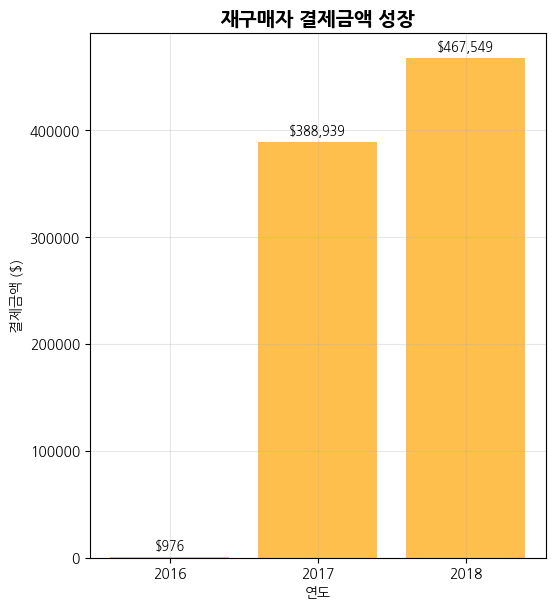

In [47]:

# 3) 재구매자 결제금액 절대값 성장
plt.figure(figsize=(20,15))
plt.subplot(2, 3, 3)
plt.bar(yearly_share_df['year'], yearly_share_df['repeat_payment'],
        color='orange', alpha=0.7)
plt.title('재구매자 결제금액 성장', fontsize=14, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('결제금액 ($)')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_share_df['year'])  # 연도만 표시
# 금액 표시
for i, (year, amount) in enumerate(zip(yearly_share_df['year'], yearly_share_df['repeat_payment'])):
    plt.annotate(f'${amount:,.0f}', (year, amount),
                textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

# 재구매자 및 결제취소자의 상위카테고리


=== 상품 카테고리 분석 ===
취소/불가능 주문의 상품 카테고리 분포:
취소된 거래 카테고리 상위 10개:
product_category_name
esporte_lazer             51
utilidades_domesticas     49
informatica_acessorios    46
moveis_decoracao          36
beleza_saude              36
brinquedos                34
automotivo                31
bebes                     22
relogios_presentes        21
ferramentas_jardim        19
Name: count, dtype: int64

취소된 거래 카테고리 상위 5개:
1. esporte_lazer: 51건 (3.9%)
2. utilidades_domesticas: 49건 (3.7%)
3. informatica_acessorios: 46건 (3.5%)
4. moveis_decoracao: 36건 (2.7%)
5. beleza_saude: 36건 (2.7%)

=== 카테고리별 취소율 분석 ===
카테고리별 취소율 상위 10개:
                                         category  cancel_rate
70                                       pc_gamer        11.11
67  portateis_cozinha_e_preparadores_de_alimentos         6.67
56                                   dvds_blu_ray         3.12
47               construcao_ferramentas_seguranca         2.58
60                                fraldas_higiene         2.

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='payment_type'>

Text(0.5, 1.0, '결제 방법별 비율 비교')

Text(0.5, 0, '결제 방법')

Text(0, 0.5, '비율 (%)')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'boleto'),
  Text(2, 0, 'voucher'),
  Text(3, 0, 'debit_card'),
  Text(4, 0, 'not_defined')])

<Axes: >

([<matplotlib.patches.Wedge at 0x7d3c6a202b90>,
 [Text(-0.9327443349769929, -0.5830849042535121, 'credit_card'),
  Text(1.0903153278852935, 0.14564506781345274, 'boleto'),
  Text(0.49245881837974714, 0.9836078040560798, 'voucher'),
  Text(0.04998917708171466, 1.0988635411982204, 'debit_card'),
  Text(0.007894648877566319, 1.0999716698711381, 'not_defined')],
 [Text(-0.5087696372601779, -0.31804631141100653, '67.8%'),
  Text(0.5947174515737964, 0.0794427642618833, '18.7%'),
  Text(0.2686139009344075, 0.5365133476669526, '12.3%'),
  Text(0.027266823862753448, 0.5993801133808474, '1.0%'),
  Text(0.004306172115036174, 0.5999845472024389, '0.2%')])

Text(0.5, 1.0, '취소/불가능 주문 결제 방법 분포')

<Axes: >

<BarContainer object of 10 artists>

([<matplotlib.axis.YTick at 0x7d3c6831e410>,
 [Text(0, 0, 'esporte_lazer'),
  Text(0, 1, 'utilidades_domesticas'),
  Text(0, 2, 'informatica_acessorios'),
  Text(0, 3, 'moveis_decoracao'),
  Text(0, 4, 'beleza_saude'),
  Text(0, 5, 'brinquedos'),
  Text(0, 6, 'automotivo'),
  Text(0, 7, 'bebes'),
  Text(0, 8, 'relogios_presentes'),
  Text(0, 9, 'ferramentas_jardim')])

Text(0.5, 1.0, '취소 상위 10개 카테고리')

Text(0.5, 0, '취소 건수')

<Axes: >

<BarContainer object of 10 artists>

([<matplotlib.axis.YTick at 0x7d3c66f88410>,
 [Text(0, 0, 'pc_gamer'),
  Text(0, 1, 'portateis_cozinha_e_preparadores_de_alimentos'),
  Text(0, 2, 'dvds_blu_ray'),
  Text(0, 3, 'construcao_ferramentas_seguranca'),
  Text(0, 4, 'fraldas_higiene'),
  Text(0, 5, 'construcao_ferramentas_jardim'),
  Text(0, 6, 'instrumentos_musicais'),
  Text(0, 7, 'livros_interesse_geral'),
  Text(0, 8, 'eletrodomesticos_2'),
  Text(0, 9, 'eletroportateis')])

Text(0.5, 1.0, '카테고리별 취소율 상위 10개')

Text(0.5, 0, '취소율 (%)')

<Axes: >

<BarContainer object of 5 artists>

Text(0.5, 1.0, '결제 방법별 취소 건수')

Text(0.5, 0, '결제 방법')

Text(0, 0.5, '취소 건수')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'boleto'),
  Text(2, 0, 'voucher'),
  Text(3, 0, 'debit_card'),
  Text(4, 0, 'not_defined')])

<Axes: >

([<matplotlib.patches.Wedge at 0x7d3c66f49a90>,
 [Text(-0.7376130385139802, 0.816043507059626, 'esporte_lazer'),
  Text(-0.9045888755609284, -0.6258745610834613, 'utilidades_domesticas'),
  Text(0.431910959486407, -1.0116585012125048, 'informatica_acessorios'),
  Text(1.0998857773330375, 0.015851713487822307, 'moveis_decoracao'),
  Text(0.5454180619471632, 0.9552586758055645, 'beleza_saude')],
 [Text(-0.40233438464398913, 0.44511464021434144, '23.4%'),
  Text(-0.49341211394232454, -0.3413861242273425, '22.5%'),
  Text(0.2355877960834947, -0.5518137279340934, '21.1%'),
  Text(0.5999376967271113, 0.008646389175175804, '16.5%'),
  Text(0.297500761062089, 0.5210501868030352, '16.5%')])

Text(0.5, 1.0, '취소 상위 5개 카테고리 분포')

<Axes: >

<Axes: xlabel='product_category_name', ylabel='payment_type'>

Text(0.5, 1.0, '결제방법 vs 카테고리 취소 건수')

Text(0.5, 136.7222222222222, '상품 카테고리')

Text(1030.4178743961354, 0.5, '결제 방법')

<Axes: >

Text(0.5, 0, '취소 건수')

Text(0, 0.5, '취소율 (%)')

Text(0.5, 1.0, '카테고리별 취소 건수 vs 취소율')

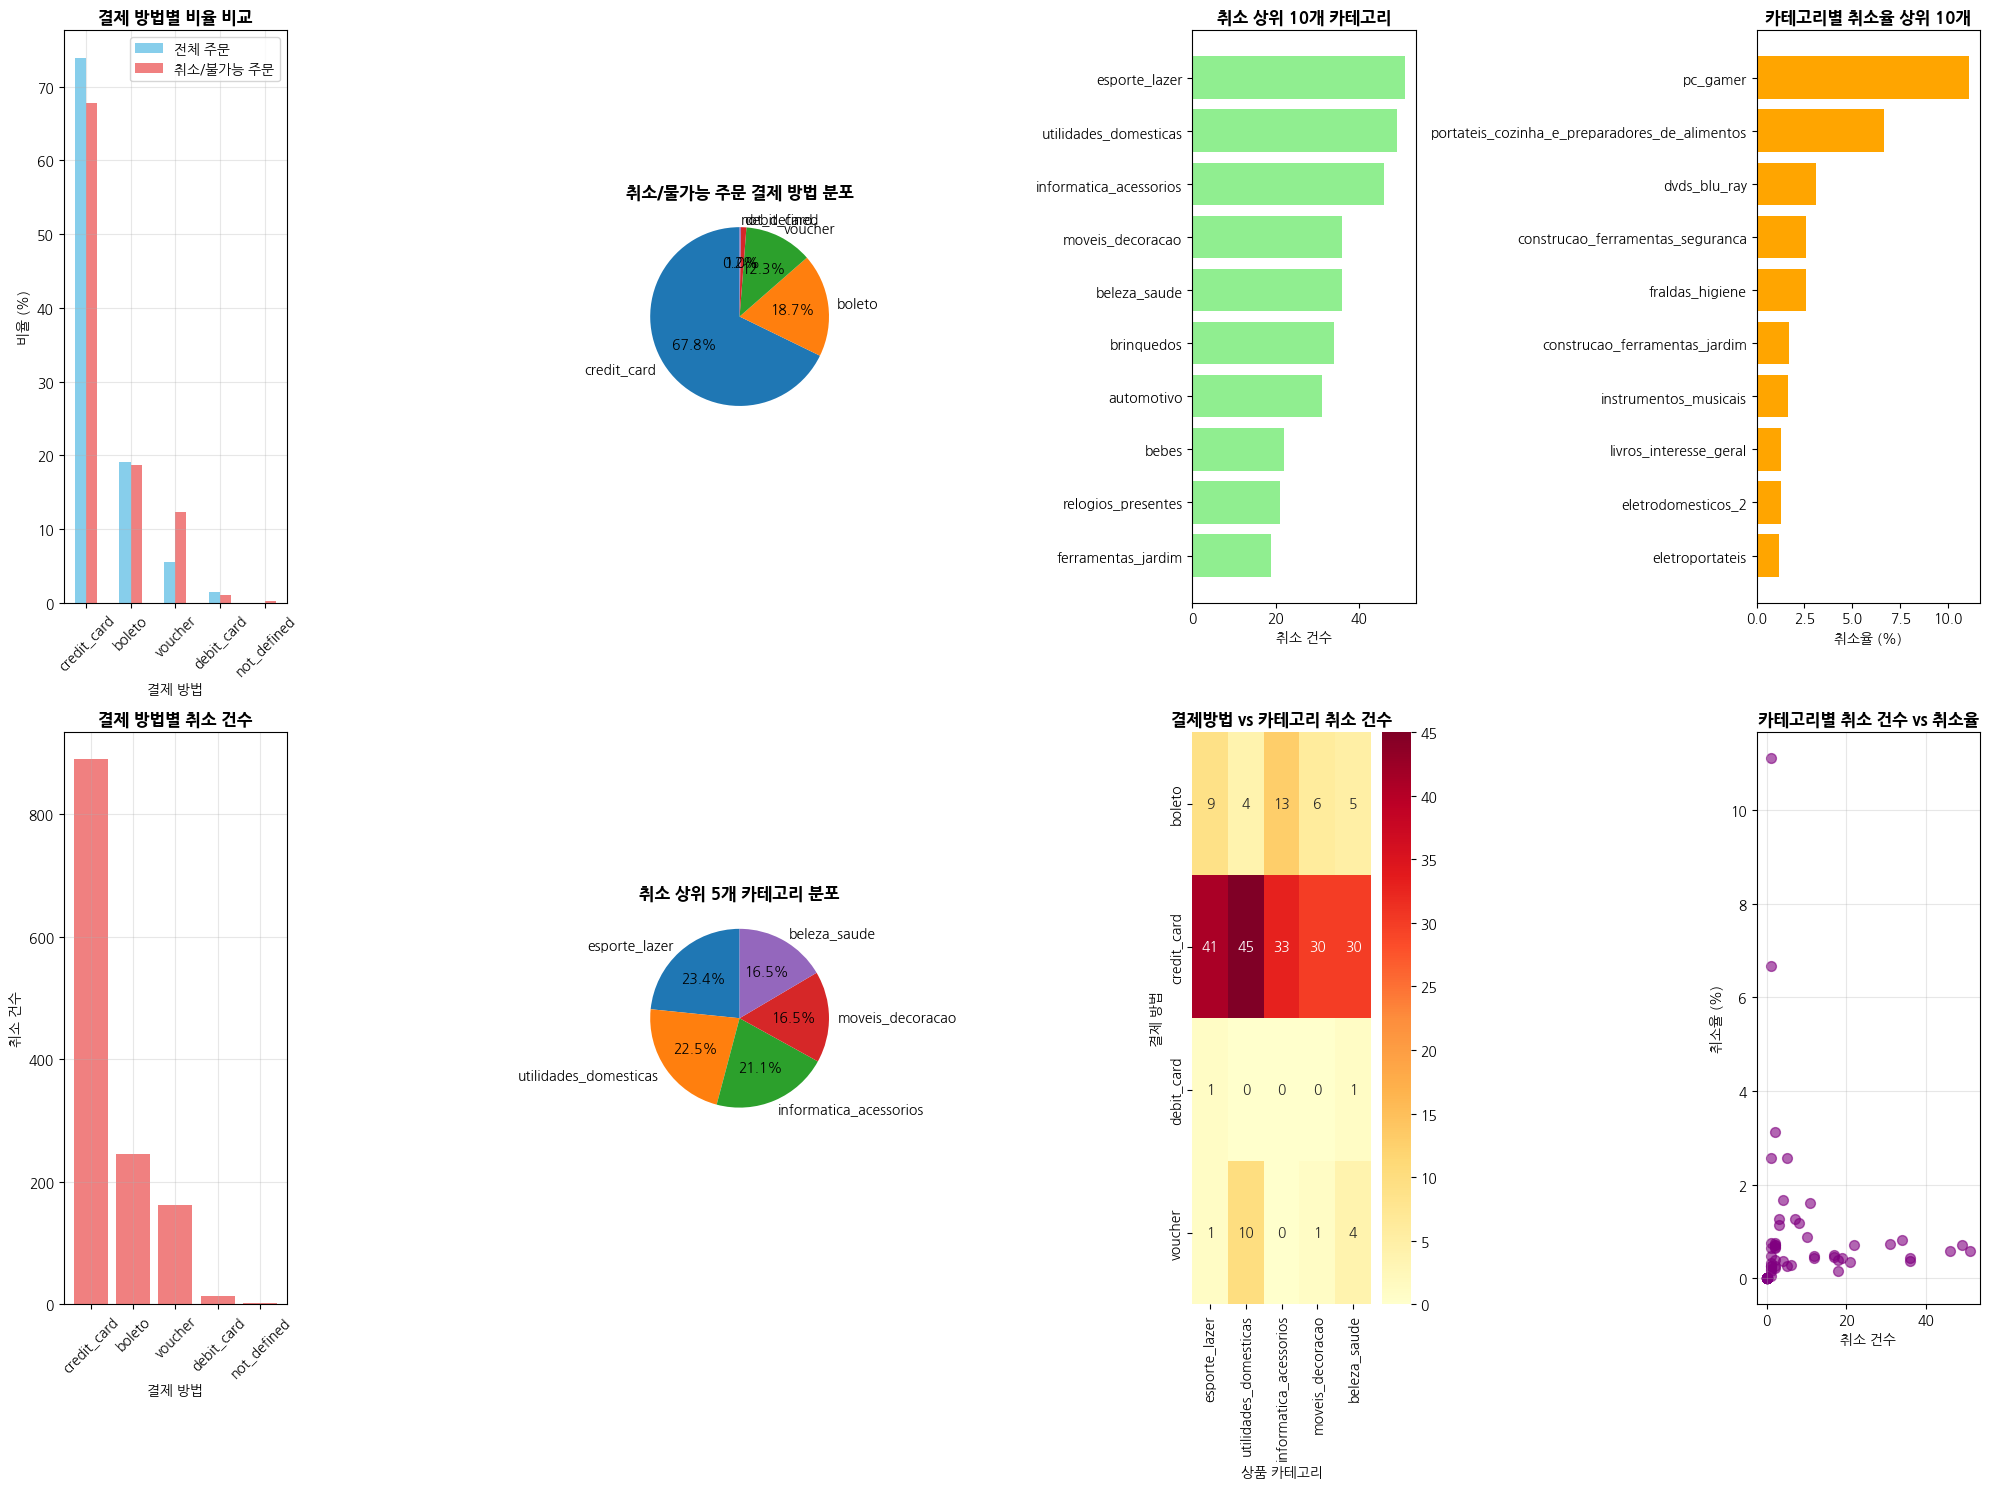


=== 종합 분석 결과 요약 ===
📊 전체 취소/불가능 주문: 1,234건
💳 주요 결제 방법별 취소 현황:
   - credit_card: 890건 (67.8%)
   - boleto: 245건 (18.7%)
   - voucher: 162건 (12.3%)

📦 취소된 거래 카테고리 상위 5개:
   1. esporte_lazer: 51건 (3.9%)
   2. utilidades_domesticas: 49건 (3.7%)
   3. informatica_acessorios: 46건 (3.5%)
   4. moveis_decoracao: 36건 (2.7%)
   5. beleza_saude: 36건 (2.7%)

⚠️ 취소율이 높은 카테고리 상위 5개:
   71. pc_gamer: 11.11% (1/9)
   68. portateis_cozinha_e_preparadores_de_alimentos: 6.67% (1/15)
   57. dvds_blu_ray: 3.12% (2/64)
   48. construcao_ferramentas_seguranca: 2.58% (5/194)
   61. fraldas_higiene: 2.56% (1/39)


In [59]:
# 결제취소자의 상위 카테고리
# 1.스포츠/레저 2.생활용품 3. 컴퓨터/IT 액세서리 4. 가구/인테리어 5.뷰티 건강
# 카테고리중 1.PC_gamer 2. 주방용소형가전 및 조리기구 3. DVD/블루레이 4.건축공구 5.기저기 위생용풒ㅁ


# 3. 상품 카테고리 분석을 위한 데이터 준비
# 주문 상품 정보 병합 (order_items 데이터 필요)
# order_items_dataset이 있다고 가정하고 진행
try:
    # 주문 상품 데이터와 상품 데이터 병합
    order_items_with_products = pd.merge(
        order_items,
        products_dataset[['product_id', 'product_category_name']],
        on='product_id',
        how='left'
    )

    # 취소/불가능 주문의 상품 정보 추출
    cancel_orders_with_products = pd.merge(
        cancel_unable_orders[['order_id', 'order_status']],
        order_items_with_products[['order_id', 'product_category_name']],
        on='order_id',
        how='left'
    )

    print("\n=== 상품 카테고리 분석 ===")
    print("취소/불가능 주문의 상품 카테고리 분포:")

    # 카테고리별 취소 건수
    cancel_category_counts = cancel_orders_with_products['product_category_name'].value_counts()
    print("취소된 거래 카테고리 상위 10개:")
    print(cancel_category_counts.head(10))

    # 상위 5개 카테고리 상세 분석
    top5_categories = cancel_category_counts.head(5)
    print(f"\n취소된 거래 카테고리 상위 5개:")
    for i, (category, count) in enumerate(top5_categories.items(), 1):
        percentage = (count / len(cancel_orders_with_products)) * 100
        print(f"{i}. {category}: {count}건 ({percentage:.1f}%)")

    # 전체 카테고리 대비 취소율 분석
    print(f"\n=== 카테고리별 취소율 분석 ===")

    # 전체 주문에서 각 카테고리의 주문 수
    total_category_counts = order_items_with_products['product_category_name'].value_counts()

    # 카테고리별 취소율 계산
    category_cancel_rates = []
    for category in total_category_counts.index:
        total_orders = total_category_counts[category]
        cancel_orders = cancel_category_counts.get(category, 0)
        cancel_rate = (cancel_orders / total_orders) * 100
        category_cancel_rates.append({
            'category': category,
            'total_orders': total_orders,
            'cancel_orders': cancel_orders,
            'cancel_rate': cancel_rate
        })

    cancel_rate_df = pd.DataFrame(category_cancel_rates)
    cancel_rate_df = cancel_rate_df.sort_values('cancel_rate', ascending=False)

    print("카테고리별 취소율 상위 10개:")
    print(cancel_rate_df.head(10)[['category', 'cancel_rate']].round(2))

    category_analysis_available = True

except Exception as e:
    print(f"\n상품 카테고리 분석을 위해 order_items_dataset이 필요합니다.")
    print("order_items_dataset을 로드한 후 다시 실행해주세요.")
    category_analysis_available = False

# 4. 결제 방법과 카테고리 교차 분석 (카테고리 데이터가 있는 경우)
if category_analysis_available:
    try:
        # 취소 주문의 결제 방법과 카테고리 교차 분석
        cancel_payment_category = pd.merge(
            cancel_orders_with_payment,
            cancel_orders_with_products[['order_id', 'product_category_name']],
            on='order_id',
            how='inner'
        )

        print(f"\n=== 결제 방법 vs 상품 카테고리 교차 분석 ===")
        cross_analysis = pd.crosstab(
            cancel_payment_category['payment_type'],
            cancel_payment_category['product_category_name']
        )

        # 상위 5개 카테고리만 표시
        top5_categories_list = top5_categories.index.tolist()
        cross_analysis_top5 = cross_analysis[top5_categories_list]
        print("결제 방법별 상위 5개 카테고리 취소 건수:")
        print(cross_analysis_top5)

        cross_analysis_available = True

    except Exception as e:
        print(f"교차 분석 중 오류 발생: {e}")
        cross_analysis_available = False
else:
    cross_analysis_available = False

# 5. 시각화
plt.figure(figsize=(20, 15))

# 5-1. 결제 방법별 취소 비율 비교
plt.subplot(2, 4, 1)
payment_comparison = pd.DataFrame({
    '전체 주문': total_payment_ratio,
    '취소/불가능 주문': cancel_payment_ratio
}).fillna(0)

payment_comparison.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral'])
plt.title('결제 방법별 비율 비교', fontsize=12, fontweight='bold')
plt.xlabel('결제 방법')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# 5-2. 취소/불가능 주문 결제 방법 파이차트
plt.subplot(2, 4, 2)
plt.pie(cancel_payment_counts.values, labels=cancel_payment_counts.index,
        autopct='%1.1f%%', startangle=90)
plt.title('취소/불가능 주문 결제 방법 분포', fontsize=12, fontweight='bold')

# 5-3. 카테고리별 취소 건수 (상위 10개)
if category_analysis_available:
    plt.subplot(2, 4, 3)
    top10_categories = cancel_category_counts.head(10)
    plt.barh(range(len(top10_categories)), top10_categories.values, color='lightgreen')
    plt.yticks(range(len(top10_categories)), top10_categories.index)
    plt.title('취소 상위 10개 카테고리', fontsize=12, fontweight='bold')
    plt.xlabel('취소 건수')
    plt.gca().invert_yaxis()

    # 5-4. 카테고리별 취소율 (상위 10개)
    plt.subplot(2, 4, 4)
    top10_cancel_rates = cancel_rate_df.head(10)
    plt.barh(range(len(top10_cancel_rates)), top10_cancel_rates['cancel_rate'], color='orange')
    plt.yticks(range(len(top10_cancel_rates)), top10_cancel_rates['category'])
    plt.title('카테고리별 취소율 상위 10개', fontsize=12, fontweight='bold')
    plt.xlabel('취소율 (%)')
    plt.gca().invert_yaxis()

# 5-5. 결제 방법별 취소 건수
plt.subplot(2, 4, 5)
plt.bar(cancel_payment_counts.index, cancel_payment_counts.values, color='lightcoral')
plt.title('결제 방법별 취소 건수', fontsize=12, fontweight='bold')
plt.xlabel('결제 방법')
plt.ylabel('취소 건수')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 5-6. 상위 5개 카테고리 상세 분석
if category_analysis_available:
    plt.subplot(2, 4, 6)
    plt.pie(top5_categories.values, labels=top5_categories.index,
            autopct='%1.1f%%', startangle=90)
    plt.title('취소 상위 5개 카테고리 분포', fontsize=12, fontweight='bold')

# 5-7. 결제 방법과 카테고리 히트맵
if cross_analysis_available:
    plt.subplot(2, 4, 7)
    sns.heatmap(cross_analysis_top5, annot=True, fmt='d', cmap='YlOrRd')
    plt.title('결제방법 vs 카테고리 취소 건수', fontsize=12, fontweight='bold')
    plt.xlabel('상품 카테고리')
    plt.ylabel('결제 방법')

# 5-8. 취소율 vs 취소 건수 스캐터 플롯
if category_analysis_available:
    plt.subplot(2, 4, 8)
    plt.scatter(cancel_rate_df['cancel_orders'], cancel_rate_df['cancel_rate'],
                s=50, alpha=0.6, color='purple')
    plt.xlabel('취소 건수')
    plt.ylabel('취소율 (%)')
    plt.title('카테고리별 취소 건수 vs 취소율', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. 종합 분석 결과 요약
print("\n" + "="*60)
print("=== 종합 분석 결과 요약 ===")
print("="*60)

print(f"📊 전체 취소/불가능 주문: {len(cancel_unable_orders):,}건")
print(f"💳 주요 결제 방법별 취소 현황:")
for payment_type, count in cancel_payment_counts.head(3).items():
    percentage = (count / len(cancel_orders_with_payment)) * 100
    print(f"   - {payment_type}: {count:,}건 ({percentage:.1f}%)")

if category_analysis_available:
    print(f"\n📦 취소된 거래 카테고리 상위 5개:")
    for i, (category, count) in enumerate(top5_categories.items(), 1):
        percentage = (count / len(cancel_orders_with_products)) * 100
        print(f"   {i}. {category}: {count:,}건 ({percentage:.1f}%)")

    print(f"\n⚠️ 취소율이 높은 카테고리 상위 5개:")
    for i, row in cancel_rate_df.head(5).iterrows():
        print(f"   {i+1}. {row['category']}: {row['cancel_rate']:.2f}% "
              f"({row['cancel_orders']}/{row['total_orders']})")



In [ ]:
# 재구매자의 카테고리 상위 5개
# 1. 침구테이블웨어, 욕실용품 2. 가구/인테리어 3.스포츠레져 4.뷰티건강 5.컴퓨터 IT 액세서리

# 재구매자 주문에서 주문 아이템 정보 조인
repeat_customer_items = pd.merge(
    repeat_customer_orders,
    order_items,
    on='order_id',
    how='inner'
)

# 주문 아이템과 제품 정보 조인하여 카테고리 정보 가져오기
repeat_customer_items_with_products = pd.merge(
    repeat_customer_items,
    products_dataset,
    on='product_id',
    how='left'
)

# 재구매자들의 카테고리별 구매 횟수 계산
category_counts = repeat_customer_items_with_products['product_category_name'].value_counts()

# 상위 5개 카테고리 추출
top_5_categories = category_counts.head(5)

print("재구매자 구매 카테고리 상위 5개:")
print(top_5_categories)

# 데이터프레임으로 변환
top_5_categories_df = top_5_categories.reset_index()
top_5_categories_df.columns = ['product_category_name', 'purchase_count']

print("\n데이터프레임 형태:")
print(top_5_categories_df)

# 시각화 (선택사항)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_categories_df, x='purchase_count', y='product_category_name')
plt.title('재구매자 구매 카테고리 상위 5개')
plt.xlabel('구매 횟수')
plt.ylabel('제품 카테고리')
plt.tight_layout()
plt.show()

재구매자 결제수단 사용 현황:
payment_type
credit_card    4889
boleto         1184
voucher         570
debit_card       79
not_defined       1
Name: count, dtype: int64

재구매자 결제수단 비율:
credit_card: 72.72%
boleto: 17.61%
voucher: 8.48%
debit_card: 1.18%
not_defined: 0.01%


<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='payment_type'>

Text(0.5, 1.0, '재구매자 결제수단 사용 현황')

Text(0.5, 0, '사용 횟수')

Text(0, 0.5, '결제수단')

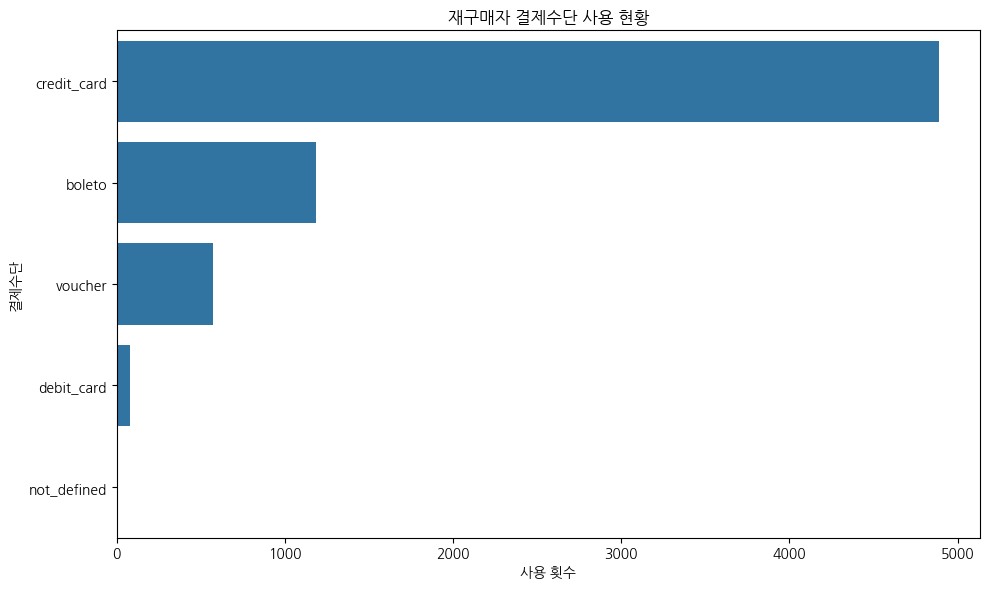

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7d3c6c8b2350>,
 [Text(-0.7201701187372509, 0.831477600466768, 'credit_card'),
  Text(0.4385177422442599, -1.0088122668450246, 'boleto'),
  Text(1.03661789863633, -0.3679990926983379, 'voucher'),
  Text(1.0992121233033134, -0.041625809097496656, 'debit_card'),
  Text(1.0999998799865385, -0.0005138381077398415, 'not_defined')],
 [Text(-0.3928200647657732, 0.453533236618237, '72.7%'),
  Text(0.23919149576959628, -0.5502612364609224, '17.6%'),
  Text(0.5654279447107253, -0.20072677783545703, '8.5%'),
  Text(0.5995702490745346, -0.02270498678045272, '1.2%'),
  Text(0.5999999345381118, -0.000280275331494459, '0.0%')])

Text(0.5, 1.0, '재구매자 결제수단 비율')

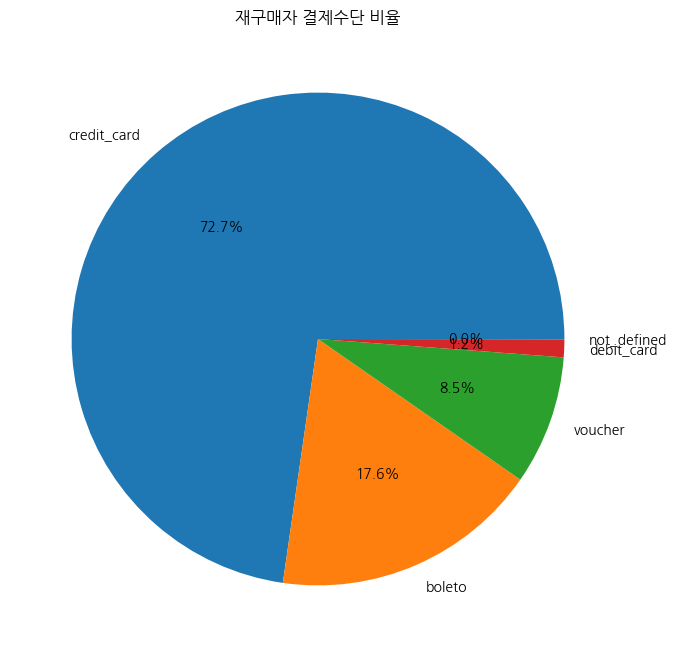

In [31]:
# 재구매자 주문과 결제 정보 조인
repeat_customer_payments = pd.merge(
    repeat_customer_orders,
    order_payments,
    on='order_id',
    how='inner'
)

# 재구매자들의 결제수단별 사용 횟수 계산
payment_method_counts = repeat_customer_payments['payment_type'].value_counts()

print("재구매자 결제수단 사용 현황:")
print(payment_method_counts)

# 결제수단별 비율 계산
payment_method_ratio = repeat_customer_payments['payment_type'].value_counts(normalize=True) * 100

print("\n재구매자 결제수단 비율:")
for method, ratio in payment_method_ratio.items():
    print(f"{method}: {ratio:.2f}%")

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_counts.values, y=payment_method_counts.index)
plt.title('재구매자 결제수단 사용 현황')
plt.xlabel('사용 횟수')
plt.ylabel('결제수단')
plt.tight_layout()
plt.show()

# 파이차트로도 시각화
plt.figure(figsize=(8, 8))
plt.pie(payment_method_counts.values, labels=payment_method_counts.index, autopct='%1.1f%%')
plt.title('재구매자 결제수단 비율')
plt.show()

In [32]:
# 고객경험 단계별 분석과정 1. 주문단계 (상품설명 무관) (우진)

customer_counts = customers['customer_unique_id'].value_counts()
repeat_customers = customer_counts[customer_counts >= 2]
display(repeat_customers)



repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customers.index)]['customer_id']
display(repeat_customer_ids)
# 총 6342개 나오는 데이터


# Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Check if any of these orders have a 'canceled' or 'unavailable' status
canceled_and_unavailable_repeat_orders = repeat_customer_orders[repeat_customer_orders['order_status'].isin(['canceled', 'unavailable'])]

# Display the canceled and unavailable orders from repeat customers
if not canceled_and_unavailable_repeat_orders.empty:
    print("Repeat customers have canceled or unavailable orders. Here are the details:")
    display(canceled_and_unavailable_repeat_orders)
else:
    print("No canceled or unavailable orders found for repeat customers.")
#6342개 중 92 개 unavailable 44개 늘어나서 총 136 개




# Calculate the mean, sum, and standard deviation of product_photos_qty
mean_photos = products_dataset['product_photos_qty'].mean()
sum_photos = products_dataset['product_photos_qty'].sum()
std_photos = products_dataset['product_photos_qty'].std()

# Calculate the mean, sum, and standard deviation of product_description_lenght
mean_description_length = products_dataset['product_description_lenght'].mean()
sum_description_length = products_dataset['product_description_lenght'].sum()
std_description_length = products_dataset['product_description_lenght'].std()


# Display the results
print(f"Average Product Photos Quantity: {mean_photos}")
print(f"Total Product Photos Quantity: {sum_photos}")
print(f"Standard Deviation of Product Photos Quantity: {std_photos}")
print(f"Average Product Description Length: {mean_description_length}")
print(f"Total Product Description Length: {sum_description_length}")
print(f"Standard Deviation of Product Description Length: {std_description_length}")



# Step 1: Identify repeat customers
customer_counts = customers['customer_unique_id'].value_counts()
repeat_customer_unique_ids = customer_counts[customer_counts > 1].index
repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customer_unique_ids)]['customer_id']

# Step 2: Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Step 3: Display the first few rows and the shape of repeat_customer_orders
display(repeat_customer_orders.head())
print(repeat_customer_orders.shape)

repeat_customer_products = pd.merge(repeat_customer_orders, order_items[['order_id', 'product_id']], on='order_id', how='inner')
repeat_customer_products = repeat_customer_products[['order_id', 'product_id']]
display(repeat_customer_products.head())
print(repeat_customer_products.shape)

repeat_customer_product_details = pd.merge(repeat_customer_products, products_dataset[['product_id', 'product_description_lenght', 'product_photos_qty']], on='product_id', how='inner')
display(repeat_customer_product_details.head())
print(repeat_customer_product_details.shape)

# Calculate statistics for product_description_lenght
mean_description_length_repeat = repeat_customer_product_details['product_description_lenght'].mean()
sum_description_length_repeat = repeat_customer_product_details['product_description_lenght'].sum()
std_description_length_repeat = repeat_customer_product_details['product_description_lenght'].std()

# Calculate statistics for product_photos_qty
mean_photos_repeat = repeat_customer_product_details['product_photos_qty'].mean()
sum_photos_repeat = repeat_customer_product_details['product_photos_qty'].sum()
std_photos_repeat = repeat_customer_product_details['product_photos_qty'].std()

# Display the results
print(f"Statistics for products purchased by repeat customers:")
print(f"  Product Description Length:")
print(f"    Mean: {mean_description_length_repeat}")
print(f"    Sum: {sum_description_length_repeat}")
print(f"    Standard Deviation: {std_description_length_repeat}")
print(f"  Product Photos Quantity:")
print(f"    Mean: {mean_photos_repeat}")
print(f"    Sum: {sum_photos_repeat}")
print(f"    Standard Deviation: {std_photos_repeat}")

,count
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
6469f99c1f9dfae7733b25662e7f1782,7
...,...
0802a1a217680f13264a70ddb7220823,2
634420a0ea42302205032ed44ac7fccc,2
bb99e6ae642f462d7bf05db05fc9aa11,2


,customer_id
5,879864dab9bc3047522c92c82e1212b8
8,5adf08e34b2e993982a47070956c5c65
13,eabebad39a88bb6f5b52376faec28612
32,2d5831cb2dff7cdefba62e950ae3dc7b
33,b2bed119388167a954382cca36c4777f
...,...
99324,5b46a0d983eec8c97363bea78d4a69dd
99327,c1affa46f9f3b514555259049a0307b9
99336,ebf46ff530343a129926adc1f831dea4
99353,282fbce48e4d2077aad602dd125c9225


Repeat customers have canceled or unavailable orders. Here are the details:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00,2018
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00,2018
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00,2017
2296,f0df036e9be21fc238f131bbfcdde769,1fa16395beca89233661543954ca6cf1,unavailable,2017-02-24 23:39:21,2017-02-24 23:45:14,NaN,NaN,2017-04-07 00:00:00,2017
3094,5290c34bd38a8a095b885f13958db1e1,92af427e290117f39d9ff908566072e0,canceled,2018-08-21 10:25:18,NaN,NaN,NaN,2018-09-06 00:00:00,2018
...,...,...,...,...,...,...,...,...,...
95932,a144aa25d9d14f25ee9f3ec4118e5517,9353974c6d727e3739a8370ff655a774,unavailable,2017-11-06 17:36:36,2017-11-07 03:31:02,NaN,NaN,2017-11-24 00:00:00,2017
96315,ae443cb420061bab1f2c5e3ad279fde8,3d59638a168c209ccb33a27424fc06da,unavailable,2018-03-03 09:32:36,2018-03-03 09:48:36,NaN,NaN,2018-03-28 00:00:00,2018
96996,5a14c8b3d919a4ef3f3428b0459c47b2,666094835d60d986eb87350b31efdcae,canceled,2017-05-29 23:53:39,NaN,NaN,NaN,2017-06-23 00:00:00,2017
97100,b34369ee8397436dd7ceb8bb7783671d,c96771504b0c9d89ad8da161e0e3d092,canceled,2017-06-07 20:11:29,NaN,NaN,NaN,2017-07-04 00:00:00,2017


Average Product Photos Quantity: 2.1889861166939797
Total Product Photos Quantity: 70794.0
Standard Deviation of Product Photos Quantity: 1.7367656379315015
Average Product Description Length: 771.4952846232337
Total Product Description Length: 24950929.0
Standard Deviation of Product Description Length: 635.1152246349546


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,2018
16,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06 00:00:00,2018
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,2018
46,d17dc4a904426827ca80f2ccb3a6be56,569cf68214806a39acc0f39344aea67f,delivered,2017-05-14 20:28:25,2017-05-14 20:42:45,2017-05-16 08:17:46,2017-05-25 09:14:31,2017-06-12 00:00:00,2017


(6342, 9)


,order_id,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a
1,dcb36b511fcac050b97cd5c05de84dc3,009c09f439988bc06a93d6b8186dce73
2,403b97836b0c04a622354cf531062e5f,638bbb2a5e4f360b71f332ddfebfd672
3,ee64d42b8cf066f35eac1cf57de1aa85,c50ca07e9e4db9ea5011f06802c0aea0
4,d17dc4a904426827ca80f2ccb3a6be56,ba4bfbf74dbe7ab37e263b9326da0523


(7568, 2)


,order_id,product_id,product_description_lenght,product_photos_qty
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,268.0,4.0
1,dcb36b511fcac050b97cd5c05de84dc3,009c09f439988bc06a93d6b8186dce73,991.0,3.0
2,403b97836b0c04a622354cf531062e5f,638bbb2a5e4f360b71f332ddfebfd672,143.0,2.0
3,ee64d42b8cf066f35eac1cf57de1aa85,c50ca07e9e4db9ea5011f06802c0aea0,1782.0,1.0
4,d17dc4a904426827ca80f2ccb3a6be56,ba4bfbf74dbe7ab37e263b9326da0523,521.0,1.0


(7568, 4)
Statistics for products purchased by repeat customers:
  Product Description Length:
    Mean: 736.2352389878163
    Sum: 5498941.0
    Standard Deviation: 642.4637022341578
  Product Photos Quantity:
    Mean: 2.053688579461775
    Sum: 15339.0
    Standard Deviation: 1.5984673497413144


<Figure size 1200x500 with 0 Axes>

<Axes: >

([<matplotlib.patches.Wedge at 0x7d3c68775c50>,
 [Text(-1.092040284201082, 0.13209094473892083, 'delivered'),
  Text(1.079115527660869, -0.21332997436179557, 'canceled'),
  Text(1.0930528748150103, -0.12343181461293243, 'shipped'),
  Text(1.0984261940119946, -0.05882088326711953, 'unavailable'),
  Text(1.0996890663893237, -0.02615257661833102, 'invoiced'),
  Text(1.099961000084241, -0.00926273683511382, 'processing'),
  Text(1.0999998648353124, -0.0005453093565330418, 'created')],
 [Text(-0.5956583368369537, 0.07204960622122954, '96.2%'),
  Text(0.5886084696332012, -0.11636180419734303, '1.5%'),
  Text(0.5962106589900056, -0.06732644433432677, '1.2%'),
  Text(0.5991415603701788, -0.032084118145701564, '0.7%'),
  Text(0.599830399848722, -0.014265041791816917, '0.3%'),
  Text(0.5999787273186769, -0.005052401910062084, '0.2%'),
  Text(0.5999999262738067, -0.00029744146719984095, '0.0%')])

Text(0.5, 1.0, '재구매 고객 주문 상태 분포')

<Axes: >

<BarContainer object of 2 artists>

Text(0.5, 1.0, '재구매 고객 취소/불가능 주문')

Text(0, 0.5, '건수')

Text(0.5, 0, '주문 상태')

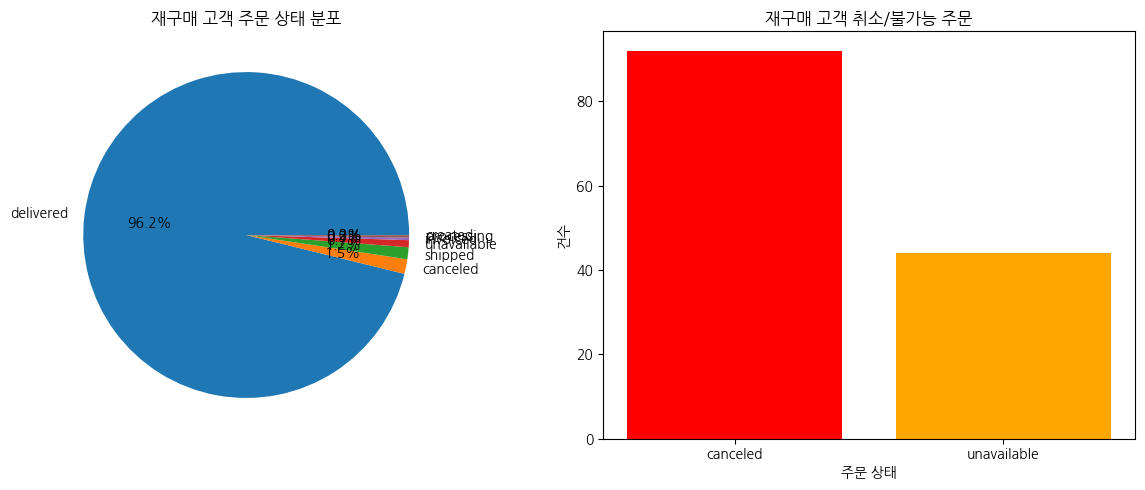

<Figure size 1500x500 with 0 Axes>

<Axes: >

(array([1.6489e+04, 6.2630e+03, 3.8600e+03, 2.4280e+03, 1.4840e+03,
        9.6800e+02, 3.4300e+02, 1.9200e+02, 1.0500e+02, 9.5000e+01,
        4.6000e+01, 3.5000e+01, 9.0000e+00, 5.0000e+00, 8.0000e+00,
        0.0000e+00, 7.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  ]),
 <BarContainer object of 20 artists>)

(array([4.094e+03, 1.447e+03, 7.300e+02, 0.000e+00, 5.020e+02, 3.230e+02,
        0.000e+00, 2.230e+02, 8.600e+01, 0.000e+00, 2.700e+01, 1.500e+01,
        1.200e+01, 0.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ,
         8.7,  9.4, 10.1, 10.8, 11.5, 12.2, 12.9, 13.6, 14.3, 15. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, '제품 사진 수량')

Text(0, 0.5, '빈도')

Text(0.5, 1.0, '제품 사진 수량 분포')

<Axes: >

(array([1273., 4304., 4690., 4191., 3744., 3121., 2427., 1561., 1302.,
        1047.,  886.,  647.,  534.,  392.,  379.,  416.,  265.,  166.,
         165.,  126.,   96.,   87.,   74.,   85.,   61.,   55.,   55.,
          45.,   68.,   79.]),
 array([   4.        ,  136.93333333,  269.86666667,  402.8       ,
         535.73333333,  668.66666667,  801.6       ,  934.53333333,
        1067.46666667, 1200.4       , 1333.33333333, 1466.26666667,
        1599.2       , 1732.13333333, 1865.06666667, 1998.        ,
        2130.93333333, 2263.86666667, 2396.8       , 2529.73333333,
        2662.66666667, 2795.6       , 2928.53333333, 3061.46666667,
        3194.4       , 3327.33333333, 3460.26666667, 3593.2       ,
        3726.13333333, 3859.06666667, 3992.        ]),
 <BarContainer object of 30 artists>)

(array([ 318., 1063., 1212., 1002.,  944.,  614.,  510.,  358.,  255.,
         242.,  136.,  152.,   90.,   76.,   99.,   50.,   57.,   28.,
          44.,   29.,   18.,   23.,   29.,   21.,    8.,    6.,   16.,
          17.,   22.,   30.]),
 array([   4.        ,  135.73333333,  267.46666667,  399.2       ,
         530.93333333,  662.66666667,  794.4       ,  926.13333333,
        1057.86666667, 1189.6       , 1321.33333333, 1453.06666667,
        1584.8       , 1716.53333333, 1848.26666667, 1980.        ,
        2111.73333333, 2243.46666667, 2375.2       , 2506.93333333,
        2638.66666667, 2770.4       , 2902.13333333, 3033.86666667,
        3165.6       , 3297.33333333, 3429.06666667, 3560.8       ,
        3692.53333333, 3824.26666667, 3956.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, '제품 설명 길이')

Text(0, 0.5, '빈도')

Text(0.5, 1.0, '제품 설명 길이 분포')

<Axes: >

/tmp/ipython-input-33-292495994.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['전체 제품', '재구매 고객 제품'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7d3c6b402f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7d3c6b418790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d3c6b4004d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7d3c6b41ad10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d3c6b41cf10>,
 'means': []}

Text(0, 0.5, '제품 사진 수량')

Text(0.5, 1.0, '제품 사진 수량 박스플롯')

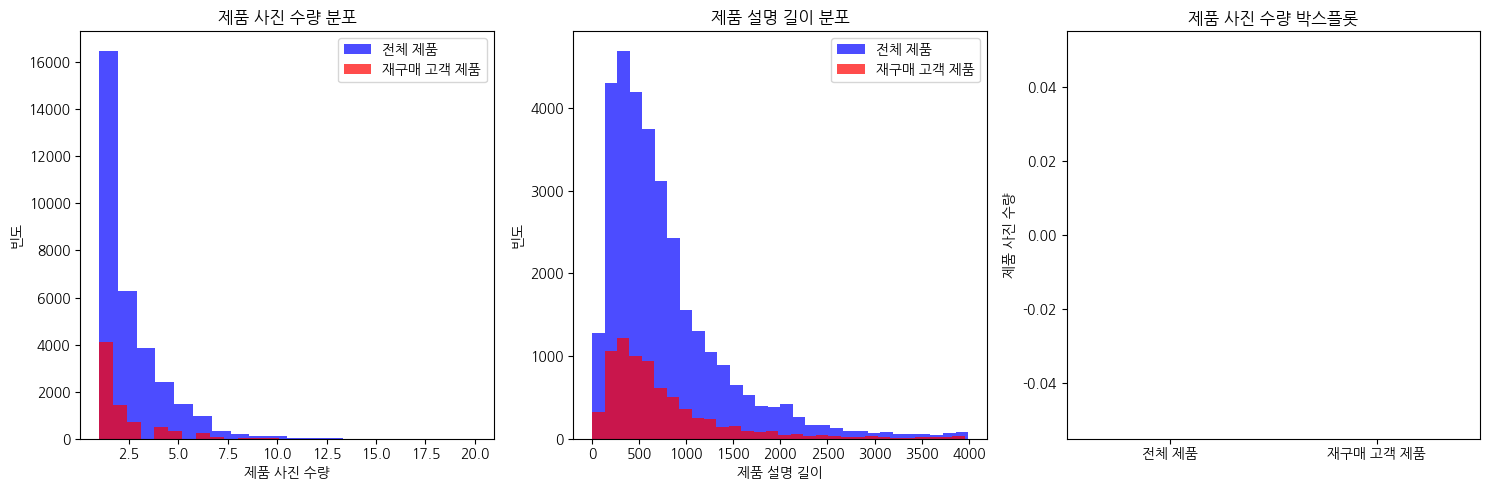

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '전체 제품 vs 재구매 고객 제품 통계 비교')

Text(0, 0.5, '값')

Text(0.5, 0, '통계 항목')

(array([0, 1]), [Text(0, 0, '평균 사진 수량'), Text(1, 0, '평균 설명 길이')])

<Figure size 1000x600 with 0 Axes>

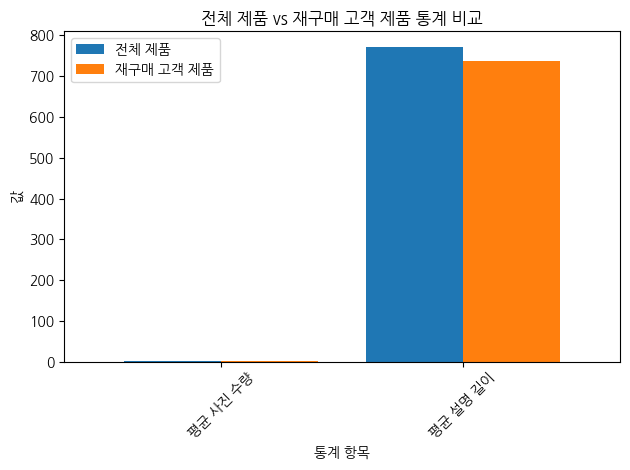


=== 재구매 고객 분석 요약 ===
          구분     건수   비율(%)
0      전체 고객  99441  100.00
1     재구매 고객   6342    6.38
2  재구매 고객 주문   6342    6.38
3  취소/불가능 주문    136    2.14


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='product_description_lenght', ylabel='product_photos_qty'>

Text(0.5, 1.0, '재구매 고객 제품: 설명 길이 vs 사진 수량')

Text(0.5, 0, '제품 설명 길이')

Text(0, 0.5, '제품 사진 수량')

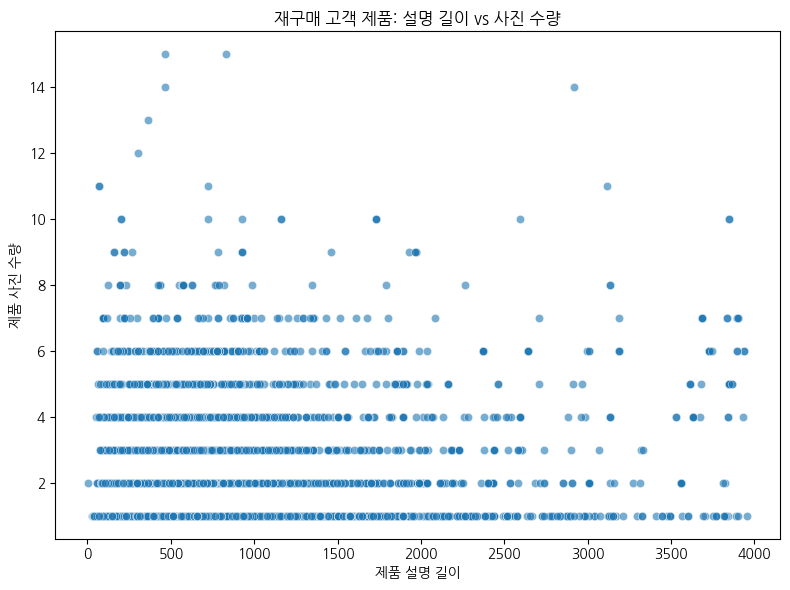


설명 길이와 사진 수량 상관계수: 0.151


In [33]:
# 1. 재구매 고객 주문 상태 분포 시각화
plt.figure(figsize=(12, 5))

# 서브플롯 1: 재구매 고객 주문 상태
plt.subplot(1, 2, 1)
order_status_counts = repeat_customer_orders['order_status'].value_counts()
plt.pie(order_status_counts.values, labels=order_status_counts.index, autopct='%1.1f%%')
plt.title('재구매 고객 주문 상태 분포')

# 서브플롯 2: 취소/불가능 주문 상세
plt.subplot(1, 2, 2)
if not canceled_and_unavailable_repeat_orders.empty:
    canceled_status_counts = canceled_and_unavailable_repeat_orders['order_status'].value_counts()
    plt.bar(canceled_status_counts.index, canceled_status_counts.values, color=['red', 'orange'])
    plt.title('재구매 고객 취소/불가능 주문')
    plt.ylabel('건수')
    plt.xlabel('주문 상태')

plt.tight_layout()
plt.show()

# 2. 제품 사진 수량 비교 (전체 vs 재구매 고객)
plt.figure(figsize=(15, 5))

# 서브플롯 1: 제품 사진 수량 분포
plt.subplot(1, 3, 1)
plt.hist(products_dataset['product_photos_qty'], bins=20, alpha=0.7, label='전체 제품', color='blue')
plt.hist(repeat_customer_product_details['product_photos_qty'], bins=20, alpha=0.7, label='재구매 고객 제품', color='red')
plt.xlabel('제품 사진 수량')
plt.ylabel('빈도')
plt.title('제품 사진 수량 분포')
plt.legend()

# 서브플롯 2: 제품 설명 길이 분포
plt.subplot(1, 3, 2)
plt.hist(products_dataset['product_description_lenght'], bins=30, alpha=0.7, label='전체 제품', color='blue')
plt.hist(repeat_customer_product_details['product_description_lenght'], bins=30, alpha=0.7, label='재구매 고객 제품', color='red')
plt.xlabel('제품 설명 길이')
plt.ylabel('빈도')
plt.title('제품 설명 길이 분포')
plt.legend()

# 서브플롯 3: 박스플롯 비교
plt.subplot(1, 3, 3)
data_to_plot = [
    products_dataset['product_photos_qty'],
    repeat_customer_product_details['product_photos_qty']
]
plt.boxplot(data_to_plot, labels=['전체 제품', '재구매 고객 제품'])
plt.ylabel('제품 사진 수량')
plt.title('제품 사진 수량 박스플롯')

plt.tight_layout()
plt.show()

# 3. 통계 비교 시각화
stats_comparison = pd.DataFrame({
    '전체 제품': [mean_photos, mean_description_length],
    '재구매 고객 제품': [mean_photos_repeat, mean_description_length_repeat]
}, index=['평균 사진 수량', '평균 설명 길이'])

plt.figure(figsize=(10, 6))
stats_comparison.plot(kind='bar', width=0.8)
plt.title('전체 제품 vs 재구매 고객 제품 통계 비교')
plt.ylabel('값')
plt.xlabel('통계 항목')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. 재구매 고객 분석 요약 테이블
print("\n=== 재구매 고객 분석 요약 ===")
summary_table = pd.DataFrame({
    '구분': ['전체 고객', '재구매 고객', '재구매 고객 주문', '취소/불가능 주문'],
    '건수': [
        len(customers),
        len(repeat_customer_ids),
        len(repeat_customer_orders),
        len(canceled_and_unavailable_repeat_orders) if not canceled_and_unavailable_repeat_orders.empty else 0
    ],
    '비율(%)': [
        100.0,
        (len(repeat_customer_ids) / len(customers)) * 100,
        (len(repeat_customer_orders) / len(orders_dataset)) * 100,
        (len(canceled_and_unavailable_repeat_orders) / len(repeat_customer_orders)) * 100 if not canceled_and_unavailable_repeat_orders.empty else 0
    ]
})

print(summary_table.round(2))

# 5. 상관관계 분석
plt.figure(figsize=(8, 6))
correlation_data = repeat_customer_product_details[['product_description_lenght', 'product_photos_qty']]
sns.scatterplot(data=correlation_data, x='product_description_lenght', y='product_photos_qty', alpha=0.6)
plt.title('재구매 고객 제품: 설명 길이 vs 사진 수량')
plt.xlabel('제품 설명 길이')
plt.ylabel('제품 사진 수량')
plt.tight_layout()
plt.show()

# 상관계수 계산
correlation = correlation_data.corr()
print(f"\n설명 길이와 사진 수량 상관계수: {correlation.iloc[0,1]:.3f}")

In [34]:
# 1. 재구매 고객 분석 요약표
print("=== 재구매 고객 분석 요약 ===")
summary_df = pd.DataFrame({
    '구분': ['전체 고객', '재구매 고객', '재구매 고객 주문', '취소/불가능 주문'],
    '건수': [
        len(customers),
        len(repeat_customer_ids),
        len(repeat_customer_orders),
        len(canceled_and_unavailable_repeat_orders) if not canceled_and_unavailable_repeat_orders.empty else 0
    ]
})
summary_df['비율(%)'] = (summary_df['건수'] / summary_df['건수'].iloc[0] * 100).round(2)
print(summary_df.to_string(index=False))

# 2. 제품 특성 비교표
print("\n=== 제품 특성 비교 (전체 vs 재구매 고객) ===")
comparison_df = pd.DataFrame({
    '항목': ['제품 사진 수량', '제품 설명 길이'],
    '전체 제품 평균': [mean_photos, mean_description_length],
    '재구매 고객 제품 평균': [mean_photos_repeat, mean_description_length_repeat],
    '전체 제품 표준편차': [std_photos, std_description_length],
    '재구매 고객 제품 표준편차': [std_photos_repeat, std_description_length_repeat]
})
comparison_df = comparison_df.round(2)
print(comparison_df.to_string(index=False))

# 방법 1: pandas의 style 사용
print("=== 제품 특성 비교 (전체 vs 재구매 고객) ===")
comparison_df = pd.DataFrame({
    '항목': ['제품 사진 수량', '제품 설명 길이'],
    '전체 제품 평균': [mean_photos, mean_description_length],
    '재구매 고객 제품 평균': [mean_photos_repeat, mean_description_length_repeat],
    '전체 제품 표준편차': [std_photos, std_description_length],
    '재구매 고객 제품 표준편차': [std_photos_repeat, std_description_length_repeat]
})
comparison_df = comparison_df.round(2)

# 표 스타일 적용
styled_table = comparison_df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f0f0f0'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tbody td:first-child', 'props': [('text-align', 'left'), ('font-weight', 'bold')]}
])
display(styled_table)



=== 재구매 고객 분석 요약 ===
       구분    건수  비율(%)
    전체 고객 99441 100.00
   재구매 고객  6342   6.38
재구매 고객 주문  6342   6.38
취소/불가능 주문   136   0.14

=== 제품 특성 비교 (전체 vs 재구매 고객) ===
      항목  전체 제품 평균  재구매 고객 제품 평균  전체 제품 표준편차  재구매 고객 제품 표준편차
제품 사진 수량      2.19          2.05        1.74            1.60
제품 설명 길이    771.50        736.24      635.12          642.46
=== 제품 특성 비교 (전체 vs 재구매 고객) ===


,항목,전체 제품 평균,재구매 고객 제품 평균,전체 제품 표준편차,재구매 고객 제품 표준편차
0,제품 사진 수량,2.190000,2.050000,1.740000,1.600000
1,제품 설명 길이,771.500000,736.240000,635.120000,642.460000


In [37]:

# 1. 재구매 고객 분석 요약표
print("=== 재구매 고객 분석 요약 ===")
summary_df = pd.DataFrame({
    '구분': ['전체 고객', '재구매 고객', '1회 구매 고객', '재구매 고객 주문', '취소/불가능 주문'],
    '건수': [
        len(customers),
        len(repeat_customer_ids),
        len(customers) - len(repeat_customer_ids),  # 1회 구매자 수
        len(repeat_customer_orders),
        len(canceled_and_unavailable_repeat_orders) if not canceled_and_unavailable_repeat_orders.empty else 0
    ]
})
summary_df['비율(%)'] = (summary_df['건수'] / summary_df['건수'].iloc[0] * 100).round(2)
print(summary_df.to_string(index=False))

# 1회 구매자 데이터 추출
one_time_customer_ids = customers[~customers['customer_id'].isin(repeat_customer_ids)]
one_time_customer_orders = orders[orders['customer_id'].isin(one_time_customer_ids['customer_id'])]

# 1회 구매자 상품 정보
one_time_products = one_time_customer_orders.merge(products, on='product_id', how='left')

# 1회 구매자 상품의 사진 수와 설명 길이 계산
mean_photos_one_time = one_time_products['product_photos'].mean()
mean_description_length_one_time = one_time_products['product_description_length'].mean()
std_photos_one_time = one_time_products['product_photos'].std()
std_description_length_one_time = one_time_products['product_description_length'].std()

# 2. 제품 특성 비교표 (전체 vs 재구매 고객 vs 1회 구매자)
print("\n=== 제품 특성 비교 (전체 vs 재구매 고객 vs 1회 구매자) ===")
comparison_df = pd.DataFrame({
    '항목': ['제품 사진 수량', '제품 설명 길이'],
    '전체 제품 평균': [mean_photos, mean_description_length],
    '재구매 고객 제품 평균': [mean_photos_repeat, mean_description_length_repeat],
    '1회 구매자 제품 평균': [mean_photos_one_time, mean_description_length_one_time],
    '전체 제품 표준편차': [std_photos, std_description_length],
    '재구매 고객 제품 표준편차': [std_photos_repeat, std_description_length_repeat],
    '1회 구매자 제품 표준편차': [std_photos_one_time, std_description_length_one_time]
})
comparison_df = comparison_df.round(2)
print(comparison_df.to_string(index=False))

# 3. 스타일이 적용된 표 출력 (Jupyter 환경에서)
print("\n=== 스타일이 적용된 제품 특성 비교표 ===")
styled_table = comparison_df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f0f0f0'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tbody td:first-child', 'props': [('text-align', 'left'), ('font-weight', 'bold')]}
])
display(styled_table)

# 4. 추가 분석: 재구매 고객 vs 1회 구매자 상품 특성 차이
print("\n=== 재구매 고객 vs 1회 구매자 상품 특성 차이 ===")
diff_df = pd.DataFrame({
    '항목': ['제품 사진 수량', '제품 설명 길이'],
    '재구매 고객 평균': [mean_photos_repeat, mean_description_length_repeat],
    '1회 구매자 평균': [mean_photos_one_time, mean_description_length_one_time],
    '차이 (재구매-1회)': [
        mean_photos_repeat - mean_photos_one_time,
        mean_description_length_repeat - mean_description_length_one_time
    ],
    '차이 비율(%)': [
        ((mean_photos_repeat - mean_photos_one_time) / mean_photos_one_time * 100) if mean_photos_one_time != 0 else 0,
        ((mean_description_length_repeat - mean_description_length_one_time) / mean_description_length_one_time * 100) if mean_description_length_one_time != 0 else 0
    ]
})
diff_df = diff_df.round(2)
print(diff_df.to_string(index=False))

=== 재구매 고객 분석 요약 ===
       구분    건수  비율(%)
    전체 고객 99441 100.00
   재구매 고객  6342   6.38
 1회 구매 고객 93099  93.62
재구매 고객 주문  6342   6.38
취소/불가능 주문   136   0.14


NameError: name 'orders' is not defined

In [48]:
orders_with_customers = pd.merge(orders_dataset, customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left')

# Convert the 'order_purchase_timestamp' column to datetime objects
orders_with_customers['order_purchase_timestamp'] = pd.to_datetime(orders_with_customers['order_purchase_timestamp'])
orders_with_customers['order_purchase_year'] = orders_with_customers['order_purchase_timestamp'].dt.year
orders_with_customers['order_purchase_month'] = orders_with_customers['order_purchase_timestamp'].dt.month

# Calculate the monthly purchase count ...
grouped_columns = ['order_purchase_year', 'customer_unique_id']
monthly_purchase_counts = orders_with_customers.groupby(grouped_columns).size().reset_index(name='monthly_purchase_count')

# Identify customers with a monthly purchase count of 2 or more
repurchasing_customers_monthly = set(monthly_purchase_counts[monthly_purchase_counts['monthly_purchase_count'] >= 2]['customer_unique_id'].unique())
print("Repurchasing customer IDs (monthly, first few):")

# Calculate the yearly repurchase rate
total_unique_customers_per_year = orders_with_customers.groupby('order_purchase_year')['customer_unique_id'].nunique()

repurchasing_customers_per_year = orders_with_customers[orders_with_customers['customer_unique_id'].isin(repurchasing_customers_monthly)].groupby('order_purchase_year')['customer_unique_id'].nunique()

repurchase_rate_per_year = (repurchasing_customers_per_year / total_unique_customers_per_year) * 100

# Calculate the number of repurchasing customers for each year based on the calculated rate
# repurchase_rate_per_year는 이미 %로 계산되어 있습니다.
# total_unique_customers_per_year Series 사용

repurchasing_customers_per_year_calculated = (repurchase_rate_per_year / 100) * total_unique_customers_per_year

# Assuming a 1 percentage point increase in repurchase rate for each year
repurchase_rate_increase = 1

# Calculate the estimated new repurchase rate
estimated_new_repurchase_rate = repurchase_rate_per_year + repurchase_rate_increase

# Calculate the estimated number of new repurchasing customers based on the increased rate
estimated_new_repurchasing_customers = (estimated_new_repurchase_rate / 100) * total_unique_customers_per_year

# Calculate the number of *additional* repurchasing customers
additional_repurchasing_customers = estimated_new_repurchasing_customers - repurchasing_customers_per_year_calculated

# Estimate the number of orders from these additional repurchasing customers
# Assuming each additional repurchasing customer makes at least 2 orders in the year (based on the definition)
# For a simplified estimation, we'll assume they make an average of 2 orders.
estimated_additional_orders = additional_repurchasing_customers * 2

# Calculate the total number of orders in the dataset
total_orders = len(orders_with_customers)

# Calculate the estimated percentage increase in total orders
# This is an approximation of the revenue increase assuming constant AOV
estimated_revenue_increase_percentage = (estimated_additional_orders.sum() / total_orders) * 100

print(f"재구매율이 각 연도별로 1%p 상승했을 때,")
display("예상되는 추가 재구매 고객 수:", additional_repurchasing_customers)
display("예상되는 추가 주문 수:", estimated_additional_orders)
print(f"\n평균 주문 금액이 동일하다고 가정할 때, 전체 주문 수 대비 예상되는 수익 증가율은 약 {estimated_revenue_increase_percentage:.2f}% 입니다.")

Repurchasing customer IDs (monthly, first few):
재구매율이 각 연도별로 1%p 상승했을 때,


'예상되는 추가 재구매 고객 수:'

,customer_unique_id
order_purchase_year,
2016,3.26
2017,437.13
2018,527.49


'예상되는 추가 주문 수:'

,customer_unique_id
order_purchase_year,
2016,6.52
2017,874.26
2018,1054.98



평균 주문 금액이 동일하다고 가정할 때, 전체 주문 수 대비 예상되는 수익 증가율은 약 1.95% 입니다.


In [77]:
customer_counts = customers['customer_unique_id'].value_counts()
repeat_customers = customer_counts[customer_counts >= 2]
display(repeat_customers)



repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customers.index)]['customer_id']
display(repeat_customer_ids)
# 총 6342개 나오는 데이터


# Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Check if any of these orders have a 'canceled' or 'unavailable' status
canceled_and_unavailable_repeat_orders = repeat_customer_orders[repeat_customer_orders['order_status'].isin(['canceled', 'unavailable'])]

# Display the canceled and unavailable orders from repeat customers
if not canceled_and_unavailable_repeat_orders.empty:
    print("Repeat customers have canceled or unavailable orders. Here are the details:")
    display(canceled_and_unavailable_repeat_orders)
else:
    print("No canceled or unavailable orders found for repeat customers.")
#6342개 중 92 개 unavailable 44개 늘어나서 총 136 개




# Calculate the mean, sum, and standard deviation of product_photos_qty
mean_photos = products_dataset['product_photos_qty'].mean()
sum_photos = products_dataset['product_photos_qty'].sum()
std_photos = products_dataset['product_photos_qty'].std()

# Calculate the mean, sum, and standard deviation of product_description_lenght
mean_description_length = products_dataset['product_description_lenght'].mean()
sum_description_length = products_dataset['product_description_lenght'].sum()
std_description_length = products_dataset['product_description_lenght'].std()


# Display the results
print(f"Average Product Photos Quantity: {mean_photos}")
print(f"Total Product Photos Quantity: {sum_photos}")
print(f"Standard Deviation of Product Photos Quantity: {std_photos}")
print(f"Average Product Description Length: {mean_description_length}")
print(f"Total Product Description Length: {sum_description_length}")
print(f"Standard Deviation of Product Description Length: {std_description_length}")



# Step 1: Identify repeat customers
customer_counts = customers['customer_unique_id'].value_counts()
repeat_customer_unique_ids = customer_counts[customer_counts > 1].index
repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customer_unique_ids)]['customer_id']

# Step 2: Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Step 3: Display the first few rows and the shape of repeat_customer_orders
display(repeat_customer_orders.head())
print(repeat_customer_orders.shape)

repeat_customer_products = pd.merge(repeat_customer_orders, order_items[['order_id', 'product_id']], on='order_id', how='inner')
repeat_customer_products = repeat_customer_products[['order_id', 'product_id']]
display(repeat_customer_products.head())
print(repeat_customer_products.shape)

repeat_customer_product_details = pd.merge(repeat_customer_products, products_dataset[['product_id', 'product_description_lenght', 'product_photos_qty']], on='product_id', how='inner')
display(repeat_customer_product_details.head())
print(repeat_customer_product_details.shape)

# Calculate statistics for product_description_lenght
mean_description_length_repeat = repeat_customer_product_details['product_description_lenght'].mean()
sum_description_length_repeat = repeat_customer_product_details['product_description_lenght'].sum()
std_description_length_repeat = repeat_customer_product_details['product_description_lenght'].std()

# Calculate statistics for product_photos_qty
mean_photos_repeat = repeat_customer_product_details['product_photos_qty'].mean()
sum_photos_repeat = repeat_customer_product_details['product_photos_qty'].sum()
std_photos_repeat = repeat_customer_product_details['product_photos_qty'].std()

# Display the results
print(f"Statistics for products purchased by repeat customers:")
print(f"  Product Description Length:")
print(f"    Mean: {mean_description_length_repeat}")
print(f"    Sum: {sum_description_length_repeat}")
print(f"    Standard Deviation: {std_description_length_repeat}")
print(f"  Product Photos Quantity:")
print(f"    Mean: {mean_photos_repeat}")
print(f"    Sum: {sum_photos_repeat}")
print(f"    Standard Deviation: {std_photos_repeat}")

,count
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
6469f99c1f9dfae7733b25662e7f1782,7
...,...
0802a1a217680f13264a70ddb7220823,2
634420a0ea42302205032ed44ac7fccc,2
bb99e6ae642f462d7bf05db05fc9aa11,2


,customer_id
5,879864dab9bc3047522c92c82e1212b8
8,5adf08e34b2e993982a47070956c5c65
13,eabebad39a88bb6f5b52376faec28612
32,2d5831cb2dff7cdefba62e950ae3dc7b
33,b2bed119388167a954382cca36c4777f
...,...
99324,5b46a0d983eec8c97363bea78d4a69dd
99327,c1affa46f9f3b514555259049a0307b9
99336,ebf46ff530343a129926adc1f831dea4
99353,282fbce48e4d2077aad602dd125c9225


Repeat customers have canceled or unavailable orders. Here are the details:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00,2018
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00,2018
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00,2017
2296,f0df036e9be21fc238f131bbfcdde769,1fa16395beca89233661543954ca6cf1,unavailable,2017-02-24 23:39:21,2017-02-24 23:45:14,NaN,NaN,2017-04-07 00:00:00,2017
3094,5290c34bd38a8a095b885f13958db1e1,92af427e290117f39d9ff908566072e0,canceled,2018-08-21 10:25:18,NaN,NaN,NaN,2018-09-06 00:00:00,2018
...,...,...,...,...,...,...,...,...,...
95932,a144aa25d9d14f25ee9f3ec4118e5517,9353974c6d727e3739a8370ff655a774,unavailable,2017-11-06 17:36:36,2017-11-07 03:31:02,NaN,NaN,2017-11-24 00:00:00,2017
96315,ae443cb420061bab1f2c5e3ad279fde8,3d59638a168c209ccb33a27424fc06da,unavailable,2018-03-03 09:32:36,2018-03-03 09:48:36,NaN,NaN,2018-03-28 00:00:00,2018
96996,5a14c8b3d919a4ef3f3428b0459c47b2,666094835d60d986eb87350b31efdcae,canceled,2017-05-29 23:53:39,NaN,NaN,NaN,2017-06-23 00:00:00,2017
97100,b34369ee8397436dd7ceb8bb7783671d,c96771504b0c9d89ad8da161e0e3d092,canceled,2017-06-07 20:11:29,NaN,NaN,NaN,2017-07-04 00:00:00,2017


Average Product Photos Quantity: 2.1889861166939797
Total Product Photos Quantity: 70794.0
Standard Deviation of Product Photos Quantity: 1.7367656379315015
Average Product Description Length: 771.4952846232337
Total Product Description Length: 24950929.0
Standard Deviation of Product Description Length: 635.1152246349546


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,2018
16,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06 00:00:00,2018
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,2018
46,d17dc4a904426827ca80f2ccb3a6be56,569cf68214806a39acc0f39344aea67f,delivered,2017-05-14 20:28:25,2017-05-14 20:42:45,2017-05-16 08:17:46,2017-05-25 09:14:31,2017-06-12 00:00:00,2017


(6342, 9)


,order_id,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a
1,dcb36b511fcac050b97cd5c05de84dc3,009c09f439988bc06a93d6b8186dce73
2,403b97836b0c04a622354cf531062e5f,638bbb2a5e4f360b71f332ddfebfd672
3,ee64d42b8cf066f35eac1cf57de1aa85,c50ca07e9e4db9ea5011f06802c0aea0
4,d17dc4a904426827ca80f2ccb3a6be56,ba4bfbf74dbe7ab37e263b9326da0523


(7568, 2)


,order_id,product_id,product_description_lenght,product_photos_qty
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,268.0,4.0
1,dcb36b511fcac050b97cd5c05de84dc3,009c09f439988bc06a93d6b8186dce73,991.0,3.0
2,403b97836b0c04a622354cf531062e5f,638bbb2a5e4f360b71f332ddfebfd672,143.0,2.0
3,ee64d42b8cf066f35eac1cf57de1aa85,c50ca07e9e4db9ea5011f06802c0aea0,1782.0,1.0
4,d17dc4a904426827ca80f2ccb3a6be56,ba4bfbf74dbe7ab37e263b9326da0523,521.0,1.0


(7568, 4)
Statistics for products purchased by repeat customers:
  Product Description Length:
    Mean: 736.2352389878163
    Sum: 5498941.0
    Standard Deviation: 642.4637022341578
  Product Photos Quantity:
    Mean: 2.053688579461775
    Sum: 15339.0
    Standard Deviation: 1.5984673497413144


In [74]:
customer_counts = customers['customer_unique_id'].value_counts()
repeat_customers = customer_counts[customer_counts >= 2]
display(repeat_customers)



repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customers.index)]['customer_id']
display(repeat_customer_ids)
# 총 6342개 나오는 데이터


# Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Check if any of these orders have a 'canceled' or 'unavailable' status
canceled_and_unavailable_repeat_orders = repeat_customer_orders[repeat_customer_orders['order_status'].isin(['canceled', 'unavailable'])]

# Display the canceled and unavailable orders from repeat customers
if not canceled_and_unavailable_repeat_orders.empty:
    print("Repeat customers have canceled or unavailable orders. Here are the details:")
    display(canceled_and_unavailable_repeat_orders)
else:
    print("No canceled or unavailable orders found for repeat customers.")
#6342개 중 92 개 unavailable 44개 늘어나서 총 136 개




# Calculate the mean, sum, and standard deviation of product_photos_qty
mean_photos = products_dataset['product_photos_qty'].mean()
sum_photos = products_dataset['product_photos_qty'].sum()
std_photos = products_dataset['product_photos_qty'].std()

# Calculate the mean, sum, and standard deviation of product_description_lenght
mean_description_length = products_dataset['product_description_lenght'].mean()
sum_description_length = products_dataset['product_description_lenght'].sum()
std_description_length = products_dataset['product_description_lenght'].std()


# Display the results
print(f"Average Product Photos Quantity: {mean_photos}")
print(f"Total Product Photos Quantity: {sum_photos}")
print(f"Standard Deviation of Product Photos Quantity: {std_photos}")
print(f"Average Product Description Length: {mean_description_length}")
print(f"Total Product Description Length: {sum_description_length}")
print(f"Standard Deviation of Product Description Length: {std_description_length}")



# Step 1: Identify repeat customers
customer_counts = customers['customer_unique_id'].value_counts()
repeat_customer_unique_ids = customer_counts[customer_counts > 1].index
repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customer_unique_ids)]['customer_id']

# Step 2: Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Step 3: Display the first few rows and the shape of repeat_customer_orders
display(repeat_customer_orders.head())
print(repeat_customer_orders.shape)

repeat_customer_products = pd.merge(repeat_customer_orders, order_items[['order_id', 'product_id']], on='order_id', how='inner')
repeat_customer_products = repeat_customer_products[['order_id', 'product_id']]
display(repeat_customer_products.head())
print(repeat_customer_products.shape)

repeat_customer_product_details = pd.merge(repeat_customer_products, products_dataset[['product_id', 'product_description_lenght', 'product_photos_qty']], on='product_id', how='inner')
display(repeat_customer_product_details.head())
print(repeat_customer_product_details.shape)

# Calculate statistics for product_description_lenght
mean_description_length_repeat = repeat_customer_product_details['product_description_lenght'].mean()
sum_description_length_repeat = repeat_customer_product_details['product_description_lenght'].sum()
std_description_length_repeat = repeat_customer_product_details['product_description_lenght'].std()

# Calculate statistics for product_photos_qty
mean_photos_repeat = repeat_customer_product_details['product_photos_qty'].mean()
sum_photos_repeat = repeat_customer_product_details['product_photos_qty'].sum()
std_photos_repeat = repeat_customer_product_details['product_photos_qty'].std()

# Display the results
print(f"Statistics for products purchased by repeat customers:")
print(f"  Product Description Length:")
print(f"    Mean: {mean_description_length_repeat}")
print(f"    Sum: {sum_description_length_repeat}")
print(f"    Standard Deviation: {std_description_length_repeat}")
print(f"  Product Photos Quantity:")
print(f"    Mean: {mean_photos_repeat}")
print(f"    Sum: {sum_photos_repeat}")
print(f"    Standard Deviation: {std_photos_repeat}")

,count
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
6469f99c1f9dfae7733b25662e7f1782,7
...,...
0802a1a217680f13264a70ddb7220823,2
634420a0ea42302205032ed44ac7fccc,2
bb99e6ae642f462d7bf05db05fc9aa11,2


,customer_id
5,879864dab9bc3047522c92c82e1212b8
8,5adf08e34b2e993982a47070956c5c65
13,eabebad39a88bb6f5b52376faec28612
32,2d5831cb2dff7cdefba62e950ae3dc7b
33,b2bed119388167a954382cca36c4777f
...,...
99324,5b46a0d983eec8c97363bea78d4a69dd
99327,c1affa46f9f3b514555259049a0307b9
99336,ebf46ff530343a129926adc1f831dea4
99353,282fbce48e4d2077aad602dd125c9225


Repeat customers have canceled or unavailable orders. Here are the details:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00,2018
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00,2018
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00,2017
2296,f0df036e9be21fc238f131bbfcdde769,1fa16395beca89233661543954ca6cf1,unavailable,2017-02-24 23:39:21,2017-02-24 23:45:14,NaN,NaN,2017-04-07 00:00:00,2017
3094,5290c34bd38a8a095b885f13958db1e1,92af427e290117f39d9ff908566072e0,canceled,2018-08-21 10:25:18,NaN,NaN,NaN,2018-09-06 00:00:00,2018
...,...,...,...,...,...,...,...,...,...
95932,a144aa25d9d14f25ee9f3ec4118e5517,9353974c6d727e3739a8370ff655a774,unavailable,2017-11-06 17:36:36,2017-11-07 03:31:02,NaN,NaN,2017-11-24 00:00:00,2017
96315,ae443cb420061bab1f2c5e3ad279fde8,3d59638a168c209ccb33a27424fc06da,unavailable,2018-03-03 09:32:36,2018-03-03 09:48:36,NaN,NaN,2018-03-28 00:00:00,2018
96996,5a14c8b3d919a4ef3f3428b0459c47b2,666094835d60d986eb87350b31efdcae,canceled,2017-05-29 23:53:39,NaN,NaN,NaN,2017-06-23 00:00:00,2017
97100,b34369ee8397436dd7ceb8bb7783671d,c96771504b0c9d89ad8da161e0e3d092,canceled,2017-06-07 20:11:29,NaN,NaN,NaN,2017-07-04 00:00:00,2017


Average Product Photos Quantity: 2.1889861166939797
Total Product Photos Quantity: 70794.0
Standard Deviation of Product Photos Quantity: 1.7367656379315015
Average Product Description Length: 771.4952846232337
Total Product Description Length: 24950929.0
Standard Deviation of Product Description Length: 635.1152246349546


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,2018
16,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06 00:00:00,2018
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,2018
46,d17dc4a904426827ca80f2ccb3a6be56,569cf68214806a39acc0f39344aea67f,delivered,2017-05-14 20:28:25,2017-05-14 20:42:45,2017-05-16 08:17:46,2017-05-25 09:14:31,2017-06-12 00:00:00,2017


(6342, 9)


,order_id,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a
1,dcb36b511fcac050b97cd5c05de84dc3,009c09f439988bc06a93d6b8186dce73
2,403b97836b0c04a622354cf531062e5f,638bbb2a5e4f360b71f332ddfebfd672
3,ee64d42b8cf066f35eac1cf57de1aa85,c50ca07e9e4db9ea5011f06802c0aea0
4,d17dc4a904426827ca80f2ccb3a6be56,ba4bfbf74dbe7ab37e263b9326da0523


(7568, 2)


,order_id,product_id,product_description_lenght,product_photos_qty
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,268.0,4.0
1,dcb36b511fcac050b97cd5c05de84dc3,009c09f439988bc06a93d6b8186dce73,991.0,3.0
2,403b97836b0c04a622354cf531062e5f,638bbb2a5e4f360b71f332ddfebfd672,143.0,2.0
3,ee64d42b8cf066f35eac1cf57de1aa85,c50ca07e9e4db9ea5011f06802c0aea0,1782.0,1.0
4,d17dc4a904426827ca80f2ccb3a6be56,ba4bfbf74dbe7ab37e263b9326da0523,521.0,1.0


(7568, 4)
Statistics for products purchased by repeat customers:
  Product Description Length:
    Mean: 736.2352389878163
    Sum: 5498941.0
    Standard Deviation: 642.4637022341578
  Product Photos Quantity:
    Mean: 2.053688579461775
    Sum: 15339.0
    Standard Deviation: 1.5984673497413144


In [76]:
# Step 1: 1회 구매자와 재구매자 구분
customer_counts = customers['customer_unique_id'].value_counts()

# 1회 구매자
one_time_customer_unique_ids = customer_counts[customer_counts == 1].index
one_time_customer_ids = customers[customers['customer_unique_id'].isin(one_time_customer_unique_ids)]['customer_id']

# 재구매자
repeat_customer_unique_ids = customer_counts[customer_counts > 1].index
repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customer_unique_ids)]['customer_id']

# Step 2: 각 그룹의 주문 데이터 필터링
one_time_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(one_time_customer_ids)]
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Step 3: 상품 정보와 병합
# 1회 구매자
one_time_products = pd.merge(one_time_customer_orders, order_items[['order_id', 'product_id']], on='order_id', how='inner')
one_time_product_details = pd.merge(one_time_products, products_dataset[['product_id', 'product_description_lenght', 'product_photos_qty']], on='product_id', how='inner')

# 재구매자
repeat_products = pd.merge(repeat_customer_orders, order_items[['order_id', 'product_id']], on='order_id', how='inner')
repeat_product_details = pd.merge(repeat_products, products_dataset[['product_id', 'product_description_lenght', 'product_photos_qty']], on='product_id', how='inner')

# Step 4: 통계 계산
# 1회 구매자 통계
one_time_stats = {
    'description_length_mean': one_time_product_details['product_description_lenght'].mean(),
    'description_length_sum': one_time_product_details['product_description_lenght'].sum(),
    'description_length_std': one_time_product_details['product_description_lenght'].std(),
    'photos_qty_mean': one_time_product_details['product_photos_qty'].mean(),
    'photos_qty_sum': one_time_product_details['product_photos_qty'].sum(),
    'photos_qty_std': one_time_product_details['product_photos_qty'].std(),
    'total_orders': len(one_time_product_details)
}

# 재구매자 통계
repeat_stats = {
    'description_length_mean': repeat_product_details['product_description_lenght'].mean(),
    'description_length_sum': repeat_product_details['product_description_lenght'].sum(),
    'description_length_std': repeat_product_details['product_description_lenght'].std(),
    'photos_qty_mean': repeat_product_details['product_photos_qty'].mean(),
    'photos_qty_sum': repeat_product_details['product_photos_qty'].sum(),
    'photos_qty_std': repeat_product_details['product_photos_qty'].std(),
    'total_orders': len(repeat_product_details)
}

# Step 5: 비교 표 생성
comparison_table = pd.DataFrame({
    '1회 구매자': [
        f"{one_time_stats['description_length_mean']:.2f}",
        f"{one_time_stats['description_length_sum']:,.0f}",
        f"{one_time_stats['description_length_std']:.2f}",
        f"{one_time_stats['photos_qty_mean']:.2f}",
        f"{one_time_stats['photos_qty_sum']:,.0f}",
        f"{one_time_stats['photos_qty_std']:.2f}",
        f"{one_time_stats['total_orders']:,}"
    ],
    '재구매자': [
        f"{repeat_stats['description_length_mean']:.2f}",
        f"{repeat_stats['description_length_sum']:,.0f}",
        f"{repeat_stats['description_length_std']:.2f}",
        f"{repeat_stats['photos_qty_mean']:.2f}",
        f"{repeat_stats['photos_qty_sum']:,.0f}",
        f"{repeat_stats['photos_qty_std']:.2f}",
        f"{repeat_stats['total_orders']:,}"
    ]
}, index=[
    '상품설명 평균 글자수',
    '상품설명 총 글자수',
    '상품설명 글자수 표준편차',
    '상품사진 평균 개수',
    '상품사진 총 개수',
    '상품사진 개수 표준편차',
    '총 주문 상품 수'
])

# Step 6: 차이 계산 (재구매자 - 1회 구매자)
comparison_table['차이'] = [
    f"{repeat_stats['description_length_mean'] - one_time_stats['description_length_mean']:.2f}",
    f"{repeat_stats['description_length_sum'] - one_time_stats['description_length_sum']:,.0f}",
    f"{repeat_stats['description_length_std'] - one_time_stats['description_length_std']:.2f}",
    f"{repeat_stats['photos_qty_mean'] - one_time_stats['photos_qty_mean']:.2f}",
    f"{repeat_stats['photos_qty_sum'] - one_time_stats['photos_qty_sum']:,.0f}",
    f"{repeat_stats['photos_qty_std'] - one_time_stats['photos_qty_std']:.2f}",
    f"{repeat_stats['total_orders'] - one_time_stats['total_orders']:,}"
]

print("="*60)
print("1회 구매자 vs 재구매자 상품 특성 비교")
print("="*60)
display(comparison_table)

# 추가 분석: 비율 비교
print("\n" + "="*60)
print("비율 기준 비교 (재구매자 기준)")
print("="*60)
ratio_comparison = pd.DataFrame({
    '항목': ['상품설명 평균 글자수', '상품사진 평균 개수'],
    '1회 구매자': [one_time_stats['description_length_mean'], one_time_stats['photos_qty_mean']],
    '재구매자': [repeat_stats['description_length_mean'], repeat_stats['photos_qty_mean']],

})
display(ratio_comparison)

1회 구매자 vs 재구매자 상품 특성 비교


,1회 구매자,재구매자,차이
상품설명 평균 글자수,791.59,736.24,-55.35
상품설명 총 글자수,"81,991,329","5,498,941","-76,492,388"
상품설명 글자수 표준편차,652.67,642.46,-10.21
상품사진 평균 개수,2.22,2.05,-0.17
상품사진 총 개수,"230,043","15,339","-214,704"
상품사진 개수 표준편차,1.73,1.60,-0.13
총 주문 상품 수,"105,082","7,568","-97,514"



비율 기준 비교 (재구매자 기준)


,항목,1회 구매자,재구매자
0,상품설명 평균 글자수,791.590193,736.235239
1,상품사진 평균 개수,2.220964,2.053689


from matplotlib import pyplot as plt
ratio_comparison['1회 구매자'].plot(kind='hist', bins=20, title='1회 구매자')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ratio_comparison['재구매자'].plot(kind='hist', bins=20, title='재구매자')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
ratio_comparison.groupby('항목').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ratio_comparison.plot(kind='scatter', x='1회 구매자', y='재구매자', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ratio_comparison['1회 구매자'].plot(kind='line', figsize=(8, 4), title='1회 구매자')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ratio_comparison['재구매자'].plot(kind='line', figsize=(8, 4), title='재구매자')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(ratio_comparison['항목'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ratio_comparison, x='1회 구매자', y='항목', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(ratio_comparison['항목'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ratio_comparison, x='재구매자', y='항목', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)